## IE 7300 Statistical Learning
## Aditi Chadha
## Part 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
from scipy.stats import chi2_contingency
from IPython.display import display, HTML

In [2]:
!pip install seaborn --upgrade

Defaulting to user installation because normal site-packages is not writeable


In [3]:
data_raw = pd.read_csv("OnlineNewsPopularity.csv")
data_raw

url   timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1      http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2      http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3      http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4       http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   
...                                                  ...         ...   
39639  http://mashable.com/2014/12/27/samsung-app-aut...         8.0   
39640  http://mashable.com/2014/12/27/seth-rogen-jame...         8.0   
39641  http://mashable.com/2014/12/27/son-pays-off-mo...         8.0   
39642     http://mashable.com/2014/12/27/ukraine-blasts/         8.0   
39643  http://mashable.com/2014/12/27/youtube-channel...         8.0   

        n_tokens_title   n_tokens_content   n_unique_tokens  \
0                 12.0              219.0          0.663594   
1                  9.0              255.0          0.604743   
2                  9.0              211.0          0.575130   
3                  9.0              531.0          0.503788   
4                 13.0             1072.0          0.415646   
...                ...                ...               ...   
39639             11.0              346.0          0.529052   
39640             12.0              328.0          0.696296   
39641             10.0              442.0          0.516355   
39642              6.0              682.0          0.539493   
39643             10.0              157.0          0.701987   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.815385         4.0   
1                    1.0                   0.791946         3.0   
2                    1.0                   0.663866         3.0   
3                    1.0                   0.665635         9.0   
4                    1.0                   0.540890        19.0   
...                  ...                        ...         ...   
39639                1.0                   0.684783         9.0   
39640                1.0                   0.885057         9.0   
39641                1.0                   0.644128        24.0   
39642                1.0                   0.692661        10.0   
39643                1.0                   0.846154         1.0   

        num_self_hrefs   num_imgs  ...   min_positive_polarity  \
0                  2.0        1.0  ...                0.100000   
1                  1.0        1.0  ...                0.033333   
2                  1.0        1.0  ...                0.100000   
3                  0.0        1.0  ...                0.136364   
4                 19.0       20.0  ...                0.033333   
...                ...        ...  ...                     ...   
39639              7.0        1.0  ...                0.100000   
39640              7.0        3.0  ...                0.136364   
39641              1.0       12.0  ...                0.136364   
39642              1.0        1.0  ...                0.062500   
39643              1.0        0.0  ...                0.100000   

        max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
0                        0.70               -0.350000                  -0.600   
1                        0.70               -0.118750                  -0.125   
2                        1.00               -0.466667                  -0.800   
3                        0.80               -0.369697                  -0.600   
4                        1.00               -0.220192                  -0.500   
...                       ...                     ...                     ...   
39639                    0.75               -0.260000                  -0.500   
39640                    0.70               -0.211111                  -0.400   
39641                    0.50               -0.356439                  -0.800   
39642                  

In [4]:
data_raw.columns = data_raw.columns.str.strip()
data_raw.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

**Dropping 'url' & 'timedelta' columns as they are not relevant features for our problem statement.**

In [5]:
# dropping the features
data = data_raw.drop(columns=['url','timedelta'])
data

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0                12.0             219.0         0.663594               1.0   
1                 9.0             255.0         0.604743               1.0   
2                 9.0             211.0         0.575130               1.0   
3                 9.0             531.0         0.503788               1.0   
4                13.0            1072.0         0.415646               1.0   
...               ...               ...              ...               ...   
39639            11.0             346.0         0.529052               1.0   
39640            12.0             328.0         0.696296               1.0   
39641            10.0             442.0         0.516355               1.0   
39642             6.0             682.0         0.539493               1.0   
39643            10.0             157.0         0.701987               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
0                      0.815385        4.0             2.0       1.0   
1                      0.791946        3.0             1.0       1.0   
2                      0.663866        3.0             1.0       1.0   
3                      0.665635        9.0             0.0       1.0   
4                      0.540890       19.0            19.0      20.0   
...                         ...        ...             ...       ...   
39639                  0.684783        9.0             7.0       1.0   
39640                  0.885057        9.0             7.0       3.0   
39641                  0.644128       24.0             1.0      12.0   
39642                  0.692661       10.0             1.0       1.0   
39643                  0.846154        1.0             1.0       0.0   

       num_videos  average_token_length  ...  min_positive_polarity  \
0             0.0              4.680365  ...               0.100000   
1             0.0              4.913725  ...               0.033333   
2             0.0              4.393365  ...               0.100000   
3             0.0              4.404896  ...               0.136364   
4             0.0              4.682836  ...               0.033333   
...           ...                   ...  ...                    ...   
39639         1.0              4.523121  ...               0.100000   
39640        48.0              4.405488  ...               0.136364   
39641         1.0              5.076923  ...               0.136364   
39642         0.0              4.975073  ...               0.062500   
39643         2.0              4.471338  ...               0.100000   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
0                       0.70              -0.350000                 -0.600   
1                       0.70              -0.118750                 -0.125   
2                       1.00              -0.466667                 -0.800   
3                       0.80              -0.369697                 -0.600   
4                       1.00              -0.220192                 -0.500   
...                      ...                    ...                    ...   
39639                   0.75              -0.260000                 -0.500   
39640                   0.70              -0.211111                 -0.400   
39641                   0.50              -0.356439                 -0.800   
39642                   0.50              -0.205246                 -0.500   
39643                   0.50              -0.200000                 -0.200   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
0                  -0.200000            0.500000                 -0.187500   
1                  -0.100000            0.000000                  0.000000   
2                  -0.133333            0.000000                  0.000000   
3                  -0.166667            0.000000                  0.000000   
4                  -0.050

**We're working with a dataset that comprises 59 features. Handling such a substantial number of features poses challenges in interpreting the data and determining which columns are essential and which ones can be discarded. To address this, we'll organize the dataset into distinct categories. This structured approach will enable us to analyze the features more effectively based on these grouped categories.**

1. **WORDS**
     1. **n_tokens_title:**                Number of words in the title
     2. **n_tokens_content:**              Number of words in the content
     3. **n_unique_tokens:**               Rate of unique words in the content
     4. **n_non_stop_words:**              Rate of non-stop words in the content
     5. **n_non_stop_unique_tokens:**      Rate of unique non-stop words in the content
     6. **average_token_length:**          Average length of the words in the content
     
2. **LINKS**
     1. **num_hrefs:**                     Number of links
     2. **num_self_hrefs:**                Number of links to other articles published by Mashable
     3. **self_reference_min_shares:**     Min. shares of referenced articles in Mashable
     4. **self_reference_max_shares:**     Max. shares of referenced articles in Mashable
     5. **self_reference_avg_sharess:**    Avg. shares of referenced articles in Mashable
     
3. **DIGITAL MEDIA**
     1. **num_imgs:**                      Number of images
     2. **num_videos:**                    Number of videos

4. **KEYWORDS**
     1. **num_keywords:**                  Number of keywords in the metadata
     2. **kw_min_min:**                    Worst keyword (min. shares)
     2. **kw_max_min:**                    Worst keyword (max. shares)
     3. **kw_avg_min:**                    Worst keyword (avg. shares)
     4. **kw_min_max:**                    Best keyword (min. shares)
     5. **kw_max_max:**                    Best keyword (max. shares)
     6. **kw_avg_max:**                    Best keyword (avg. shares)
     7. **kw_min_avg:**                    Avg. keyword (min. shares)
     8. **kw_max_avg:**                    Avg. keyword (max. shares)
     9. **kw_avg_avg:**                    Avg. keyword (avg. shares)
     
     
5. **CHANNELS**
    1. **data_channel_is_lifestyle:**     Is data channel 'Lifestyle'?
    2. **data_channel_is_entertainment:** Is data channel 'Entertainment'?
    3. **data_channel_is_bus:**           Is data channel 'Business'?
    4. **data_channel_is_socmed:**        Is data channel 'Social Media'?
    5. **data_channel_is_tech:**          Is data channel 'Tech'?
    6. **data_channel_is_world:**         Is data channel 'World'?

6. **PUBLICATION DAY**
    1. **weekday_is_monday:**             Was the article published on a Monday?
    2. **weekday_is_tuesday:**            Was the article published on a Tuesday?
    3. **weekday_is_wednesday:**          Was the article published on a Wednesday?
    4. **weekday_is_thursday:**           Was the article published on a Thursday?
    5. **weekday_is_friday:**             Was the article published on a Friday?
    6. **weekday_is_saturday:**           Was the article published on a Saturday?
    7. **weekday_is_sunday:**             Was the article published on a Sunday?
    8. **is_weekend:**                    Was the article published on the weekend?
    
7. **NLP**
    * **LDA**
        1. **LDA_00:**                        Closeness to LDA topic 0
        2. **LDA_01:**                        Closeness to LDA topic 1
        3. **LDA_02:**                        Closeness to LDA topic 2
        4. **LDA_03:**                        Closeness to LDA topic 3
        5. **LDA_04:**                        Closeness to LDA topic 4

    * **Subjectivity & Polarity**
        1. **global_subjectivity:**           Text subjectivity
        2. **global_sentiment_polarity:**     Text sentiment polarity
        3. **title_subjectivity:**            Title subjectivity
        4. **title_sentiment_polarity:**      Title polarity
        5. **abs_title_subjectivity:**        Absolute subjectivity level
        6. **abs_title_sentiment_polarity:**  Absolute polarity level
  
    * **Positive & Negative**
        1. **global_rate_positive_words:**    Rate of positive words in the content
        2. **global_rate_negative_words:**    Rate of negative words in the content
        3. **rate_positive_words:**           Rate of positive words among non-neutral tokens
        4. **rate_negative_words:**           Rate of negative words among non-neutral tokens
        5. **avg_positive_polarity:**         Avg. polarity of positive words
        6. **min_positive_polarity:**         Min. polarity of positive words
        7. **max_positive_polarity:**         Max. polarity of positive words
        8. **avg_negative_polarity:**         Avg. polarity of negative  words
        9. **min_negative_polarity:**         Min. polarity of negative  words
        10. **max_negative_polarity:**         Max. polarity of negative  words
        
8. **TARGET**
    1. **shares:**             Number of shares (target)

**Now, we will make a list for each category so that we can filter out the data of respecive categories and peform EDA accordingly.**

In [6]:
# making list for each categories

words = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 
 'n_non_stop_words', 'n_non_stop_unique_tokens', 'average_token_length']


links = ['num_hrefs', 'num_self_hrefs', 'self_reference_min_shares', 
         'self_reference_max_shares', 'self_reference_avg_sharess']

media = ['num_imgs', 'num_videos']


keywords = ['num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 
            'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 
            'kw_max_avg', 'kw_avg_avg']

channels = ['data_channel_is_lifestyle', 'data_channel_is_entertainment', 
            'data_channel_is_bus', 'data_channel_is_socmed', 
            'data_channel_is_tech', 'data_channel_is_world']

day = ['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 
       'weekday_is_sunday', 'is_weekend']

nlp_lda = ['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']
nlp_sbpl = ['global_subjectivity', 'global_sentiment_polarity', 'title_subjectivity', 
            'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity']
nlp_posneg = ['global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 
            'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 
            'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity']

target = ['shares']

**Basic data exploration for datatype and null value checks.**

### Making new target column as categorical: 'Popular' and 'Unpopular'.

**We will use median value of shares as the threshold for the category.**
* **0.0: 'Unpopular'** - less than median
* **1.0: 'Popular'**   - graeter than equal to median

In [7]:
# cheking median value
median_shares = data['shares'].median()
median_shares

1400.0

In [8]:
# creating a new column 'shares_c' based on the condition
data['shares_c'] = np.where(data['shares'] < median_shares, 0.0, 1.0)

In [9]:
data.head()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.815385        4.0             2.0       1.0         0.0   
1                  0.791946        3.0             1.0       1.0         0.0   
2                  0.663866        3.0             1.0       1.0         0.0   
3                  0.665635        9.0             0.0       1.0         0.0   
4                  0.540890       19.0            19.0      20.0         0.0   

   average_token_length  ...  max_positive_polarity  avg_negative_polarity  \
0              4.680365  ...                    0.7              -0.350000   
1              4.913725  ...                    0.7              -0.118750   
2              4.393365  ...                    1.0              -0.466667   
3              4.404896  ...                    0.8              -0.369697   
4              4.682836  ...                    1.0              -0.220192   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                 -0.600              -0.200000            0.500000   
1                 -0.125              -0.100000            0.000000   
2                 -0.800              -0.133333            0.000000   
3                 -0.600              -0.166667            0.000000   
4                 -0.500              -0.050000            0.454545   

   title_sentiment_polarity  abs_title_subjectivity  \
0                 -0.187500                0.000000   
1                  0.000000                0.500000   
2                  0.000000                0.500000   
3                  0.000000                0.500000   
4                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  shares_c  
0                      0.187500     593       0.0  
1                      0.000000     711       0.0  
2                      0.000000    1500       1.0  
3                      0.000000    1200       0.0  
4                      0.136364     505       0.0  

[5 rows x 60 columns]

# Exploratory data analysis

**1. Funtion to plot histogram and box-plot for continous features.**

In [10]:
def plot_histogram_boxplot(df):
    # Set up plot layout for 3 columns per row
    num_plots = len(df.columns)
    num_rows = (num_plots + 2) // 3  # Calculate number of rows needed

    for i in range(0, num_plots, 3):
        cols_subset = df.columns[i:i + 3]  # Subset of 3 columns for each row
        plt.figure(figsize=(18, 8))

        if len(cols_subset) < 3:  # Check if it's the last row
            last_row_cols = len(cols_subset)
            for j, col in enumerate(cols_subset, 1):
                # Histogram
                plt.subplot(2, 3, j)
                sns.histplot(df[col], kde=True)
                plt.title(col, fontsize=16)

                # Box Plot
                plt.subplot(2, 3, j + 3)
                sns.boxplot(df[col])
                plt.title(col, fontsize=16)

            # Fill empty spaces with blank subplots
            for k in range(last_row_cols + 1, 4):
                plt.subplot(2, 3, k)
                plt.axis('off')  # Hide empty subplots

        else:
            for j, col in enumerate(cols_subset, 1):
                # Histogram
                plt.subplot(2, 3, j)
                sns.histplot(df[col], kde=True)
                plt.title(col, fontsize=16)

                # Box Plot
                plt.subplot(2, 3, j + 3)
                sns.boxplot(df[col])
                plt.title(col, fontsize=16)

        plt.tight_layout()
        plt.show()

**2. Funtion to plot box-plot for target class for continous features.**

In [11]:
def boxplot_by_class(df):
    # Set up plot layout for 3 columns per row
    num_plots = len(df.columns)-1
    num_rows = (num_plots + 2) // 3  # Calculate number of rows needed

    df_temp = df.drop('shares_c',axis=1)
    for i in range(0, num_plots, 3):
        cols_subset = df_temp.columns[i:i + 3]  # Subset of 3 columns for each row
        #print(cols_subset)
        plt.figure(figsize=(18, 8))

        if len(cols_subset) < 3:  # Check if it's the last row
            last_row_cols = len(cols_subset)
            for j, col in enumerate(cols_subset, 1):
                # Box Plot
                plt.subplot(2, 3, j)
                ax = sns.boxplot(x='shares_c', y=col, data=df, hue='shares_c', 
                            palette={0.0: 'lightcoral', 1.0: 'lightgreen'}, legend=False)
                plt.title(col, fontsize=16)
                plt.xlabel('Classes')
                plt.ylabel('Values')
                
                # Set custom x-labels for 0.0 and 1.0
                ax.set_xticks([0, 1])
                ax.set_xticklabels(['Unpopular: 0.0', 'Popular: 1.0'])

            # Fill empty spaces with blank subplots
            for k in range(last_row_cols + 1, 4):
                plt.subplot(2, 3, k)
                plt.axis('off')  # Hide empty subplots

        else:
            for j, col in enumerate(cols_subset, 1):
                # Box Plot
                plt.subplot(2, 3, j)
                ax = sns.boxplot(x='shares_c', y=col, data=df, hue='shares_c', 
                            palette={0.0: 'lightcoral', 1.0: 'lightgreen'}, legend=False)
                plt.title(col, fontsize=16)
                plt.xlabel('Classes')
                plt.ylabel('Values')
                
                # Set custom x-labels for 0.0 and 1.0
                ax.set_xticks([0, 1])
                ax.set_xticklabels(['Unpopular: 0.0', 'Popular: 1.0'])

        plt.tight_layout()
        plt.show()

**3. Funtion for outlier treatment.**

In [12]:
# Outlier treatment
data_treated = pd.DataFrame()

def treat_outliers_knn(data, outlier_cols, data_treated):
    for col in outlier_cols:
        # Identify outliers using IQR method
        data_temp = data.drop(['shares','shares_c'],axis=1).copy()
        q1 = data_temp[col].quantile(0.25)
        q3 = data_temp[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Treat outliers by replacing them with NaN
        data_temp[col] = data[col].apply(lambda x: x if (lower_bound <= x <= upper_bound) else float('NaN'))

        # Initialize the KNN Imputer
        knn_imputer = KNNImputer(n_neighbors=10) 

        # Perform the imputation
        imputed_data = knn_imputer.fit_transform(data_temp)

        # The imputed data is in the form of a numpy array, so we want to convert it back to a DataFrame
        imputed_data_df = pd.DataFrame(imputed_data, columns=data_temp.columns)

        # Append treated column to 'data_treated' DataFrame
        data_treated = pd.concat([data_treated, imputed_data_df[col]], axis=1)

    return data_treated

**4. Function to plot the discrete data and visualize their distribution.**

In [13]:
def discrete_data_plot(dataframe, sel_cols, x_axis, y_axis):
    for col in sel_cols:
        col_name = col

        # Create a crosstab with normalized values
        crosstab = pd.crosstab(dataframe[col_name], dataframe['shares_c'], normalize='index')

        # Calculate the category-wise contribution to the column
        category_contrib = (crosstab * 100).round(0).astype(int).astype(str) + '%'
        category_contrib.index = category_contrib.index.astype(str) + \
            '\n(' + (dataframe[col_name].value_counts().sort_index() * 100 / len(dataframe)).round(0).astype(str) + '%)'

        # Set colors for the bars
        colors = {0.0: 'lightcoral', 1.0: 'lightgreen'}
        
        # Plot the stacked bar chart with specified colors
        ax = crosstab.plot(kind='bar', stacked=True, color=[colors[c] for c in crosstab.columns])
        
        # Set the y-axis label
        ax.set_ylabel('Proportion')

        # Add percentage values to the bars
        for container in ax.containers:
            ax.bar_label(container, label_type='center', labels=[f'{val:.1%}' for val in container.datavalues])

        # Set the x-axis label
        ax.set_xlabel(str(col_name) + ' - (% Contribution to data)')

        # Set the x-tick labels
        ax.set_xticklabels(category_contrib.index, rotation=45)
        plt.gcf().set_size_inches(x_axis, y_axis)

        # Create custom legend labels
        handles, labels = ax.get_legend_handles_labels()
        labels = ['Unpopular: 0.0', 'Popular: 1.0']
        ax.legend(handles, labels, title='Class', loc='upper right', bbox_to_anchor=(1.4, 1))

        plt.title(col_name)
        plt.subplots_adjust(right=0.7)
        # Show the plot
        plt.show()


**5. Correlation heatmap plot for continous features.**

In [14]:
def plot_corr_heatmap(dataframe):
    # Select subset of dataframe with specified columns
    subset = dataframe
    
    # Calculate correlation matrix
    corr_matrix = subset.corr()
    
    # Set up the matplotlib figure
    plt.figure(figsize=(6, 4))

    # Plot heatmap
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})

    # Set plot title
    plt.title('Correlation Heatmap')

    # Show plot
    plt.show()

**6. Function to assess the relationship between a binary/categorical feature and a target class using chi squared hypothesis test**

The Chi-squared test assesses the independence between two categorical variables.

**Interpretation:**

- **Chi-squared value:** Measures the strength of association between the variables. Higher values indicate stronger association.
- **P-value:** Indicates the significance of the association. If the p-value is below a chosen significance level (commonly 0.05), it suggests a significant association.
- **Degrees of Freedom (dof):** Represents the number of independent values that can vary in a statistical calculation.

**Interpretation guidelines for the Chi-squared test:**

- **P-value < 0.05:** Evidence to reject the null hypothesis of independence. Indicates a significant association between 'Feature' and 'Target'.
- **P-value > 0.05:** Fails to reject the null hypothesis, suggesting no significant association between the variables.

In [15]:
def chi_squared_hypothesis_test(dataframe, columns, target_column):
    for col in columns:
        # Hypotheses
        display(HTML(f"<strong>HYPOTHESES</strong> for <strong>{col}</strong> and <strong>{target_column}</strong>:"))
        display(HTML(f"<li><em>Null Hypothesis (H0):</em> There is no association between {col} and {target_column}."))
        display(HTML(f"<li><em>Alternative Hypothesis (H1):</em> There is an association between {col} and {target_column}.<br>"))

        # Create a contingency table
        contingency_table = pd.crosstab(dataframe[col], dataframe[target_column])

        # Perform Chi-squared test
        chi2, p, dof, _ = chi2_contingency(contingency_table)

        # Print test statistics and hypothesis test report
        display(HTML(f"<br><strong>STATISTICS:</strong>"))
        display(HTML(f"<li><strong>Chi-squared for {col}:</strong>{chi2}"))
        display(HTML(f"<li><strong>P-value for {col}:</strong> {p}"))
        display(HTML(f"<li><strong>Degrees of Freedom for {col}:</strong> {dof}<br>"))

        # Hypothesis testing report
        display(HTML(f"<br><strong>Hypothesis Test Report for {col} and {target_column}:</strong>"))
        if p < 0.05:
            display(HTML(f"<li><em>Result:</em> <strong>Reject</strong> the null hypothesis"))
            display(HTML(f"<li><em>Conclusion:</em> <strong>Significant association</strong> between {col} and {target_column}."))
        else:
            display(HTML(f"<li><em>Result:</em> <strong>Fail</strong> to reject the null hypothesis"))
            display(HTML(f"<li><em>Conclusion:</em> <strong>No significant</strong> association between {col} and {target_column}.<br>"))
        display(HTML("<hr>"))


**In the following steps we will explore the dofferent categories of features separately** 

Separating features into categories for exploratory data analysis allows focused examination of similar traits, enabling tailored analysis techniques for each category, clearer comparisons between feature groups and the class, and the identification of unique patterns within specific feature types helping us to determine which features should be removed.

## 1. WORDS

In [16]:
#Looking at the basic statistics 
data[words].describe(percentiles=[0.1,0.25,0.5,0.75,0.9]).transpose()

count        mean         std  min         10%  \
n_tokens_title            39644.0   10.398749    2.114037  2.0    8.000000   
n_tokens_content          39644.0  546.514731  471.107508  0.0  152.000000   
n_unique_tokens           39644.0    0.548216    3.520708  0.0    0.406378   
n_non_stop_words          39644.0    0.996469    5.231231  0.0    1.000000   
n_non_stop_unique_tokens  39644.0    0.689175    3.264816  0.0    0.553379   
average_token_length      39644.0    4.548239    0.844406  0.0    4.302621   

                                 25%         50%         75%          90%  \
n_tokens_title              9.000000   10.000000   12.000000    13.000000   
n_tokens_content          246.000000  409.000000  716.000000  1090.000000   
n_unique_tokens             0.470870    0.539226    0.608696     0.676714   
n_non_stop_words            1.000000    1.000000    1.000000     1.000000   
n_non_stop_unique_tokens    0.625739    0.690476    0.754630     0.818841   
average_token_length        4.478404    4.664082    4.854839     5.036971   

                                  max  
n_tokens_title              23.000000  
n_tokens_content          8474.000000  
n_unique_tokens            701.000000  
n_non_stop_words          1042.000000  
n_non_stop_unique_tokens   650.000000  
average_token_length         8.041534

**Some observations:**
* Metrics such as 'n_unique_tokens,' 'n_non_stop_words,' and 'n_non_stop_unique_tokens' are ratio-based, typically constrained within a range of 0 to 1. However, it's observed that the maximum value reaches around 1000, prompting a need for further investigation into potential anomalies or outliers within these metrics.
* The distribution of 'n_non_stop_words' is notable, with a predominant occurrence of values as 1, evident from both the 10th and 90th percentiles.
* Across various features, the presence of outliers is evident, highlighting instances where data points significantly deviate from the norm. These outliers warrant closer scrutiny and potential corrective measures to ensure their minimal impact on our analysis.

In [17]:
# checking for reason behind values graeter than 1 for 'n_unique_tokens', 'n_non_stop_words' and 'n_non_stop_unique_tokens'

data[
    (data['n_unique_tokens'] >= 1) |
    (data['n_non_stop_words'] >= 1) |
    (data['n_non_stop_unique_tokens'] >= 1)
]

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
31037             9.0            1570.0            701.0            1042.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
31037                     650.0       11.0            10.0      51.0   

       num_videos  average_token_length  ...  max_positive_polarity  \
31037         0.0              4.696178  ...                    0.0   

       avg_negative_polarity  min_negative_polarity  max_negative_polarity  \
31037                    0.0                    0.0                    0.0   

       title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
31037                 0.0                       0.0                     0.0   

       abs_title_sentiment_polarity  shares  shares_c  
31037                           0.0    5900       1.0  

[1 rows x 60 columns]

**We just have 1 such row, we can drop it from the dataset.**

In [18]:
# Filter rows where specified columns have values less than or equal to 1
data = data[
    (data['n_unique_tokens'] <= 1) &
    (data['n_non_stop_words'] <= 1) &
    (data['n_non_stop_unique_tokens'] <= 1)
].reset_index(drop=True)

data.shape

(39643, 60)

**Checking on 'n_non_stop_words' feature**

In [19]:
np.round(data['n_non_stop_words'],5).value_counts()

1.0    38462
0.0     1181
Name: n_non_stop_words, dtype: int64

**It seems to have bollean values, 0 and 1. So we need to treat them as discrete values.**

In [20]:
data['n_non_stop_words'] = data['n_non_stop_words'].round(5)

In [21]:
# seperating out discrete and continous features
words_dis = ['n_non_stop_words']
words_con = list(set(words) - set(words_dis))
print("Discrete features: ",words_dis)
print("Continous features: ",words_con)

Discrete features:  ['n_non_stop_words']
Continous features:  ['n_tokens_content', 'n_tokens_title', 'average_token_length', 'n_unique_tokens', 'n_non_stop_unique_tokens']


### 1.1 Continous features

**Checking distribution and outliers**

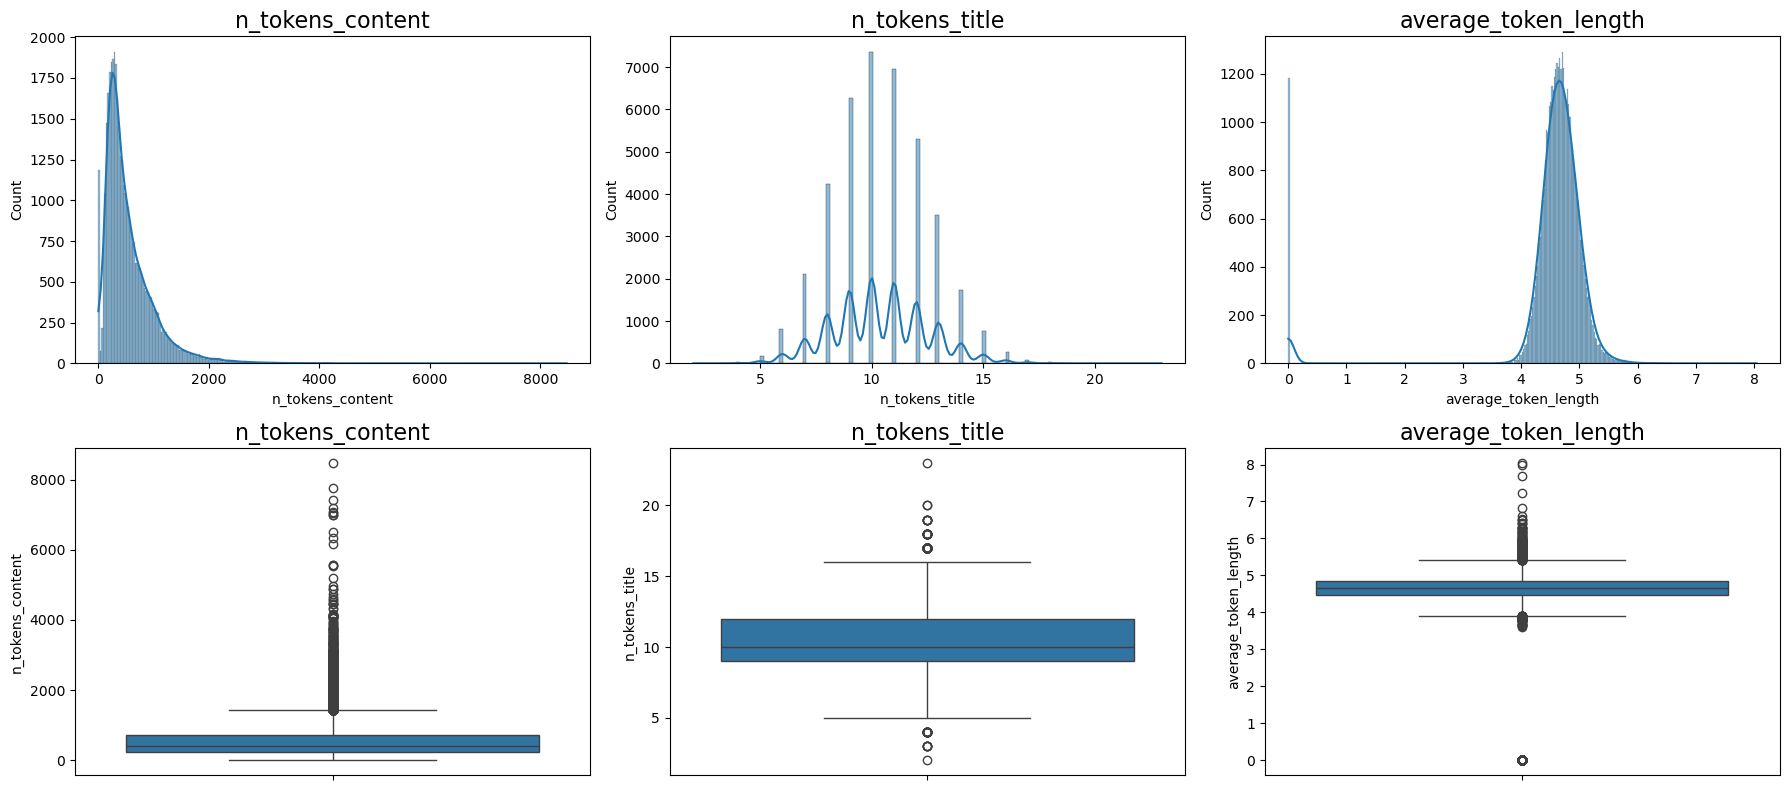

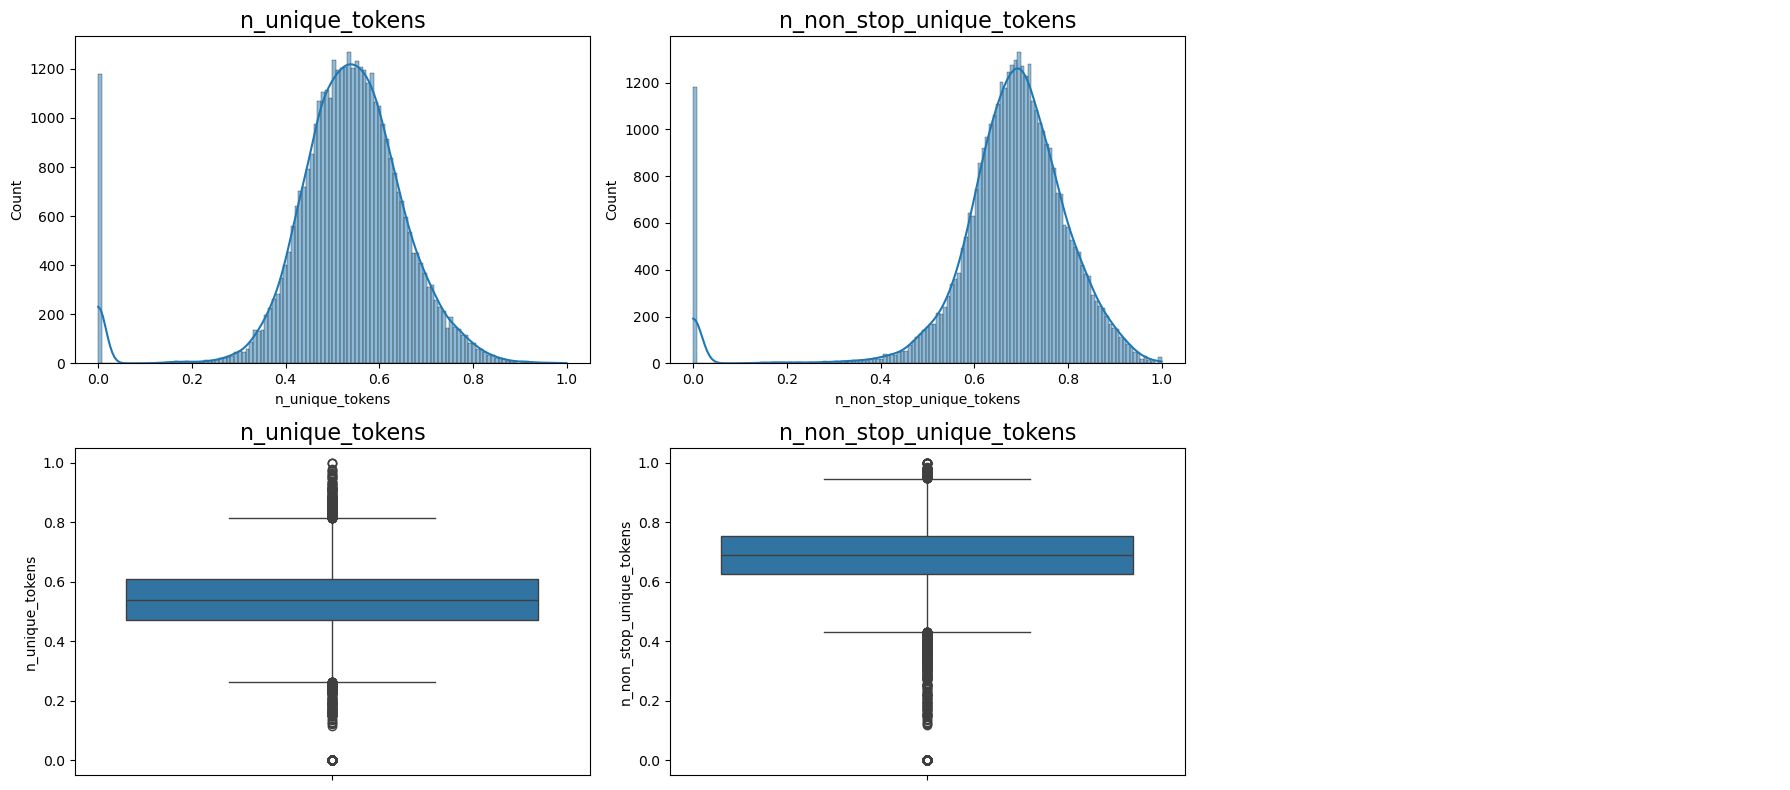

In [22]:
plot_histogram_boxplot(data[words_con])

**Distribution of continuous variables for each class**

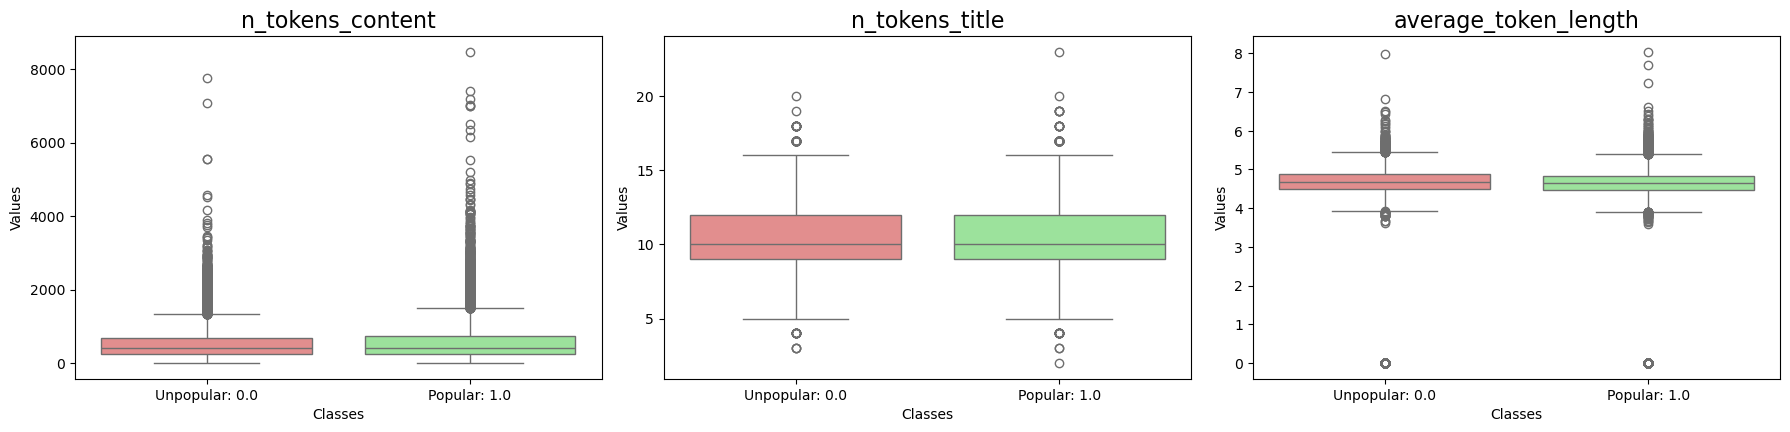

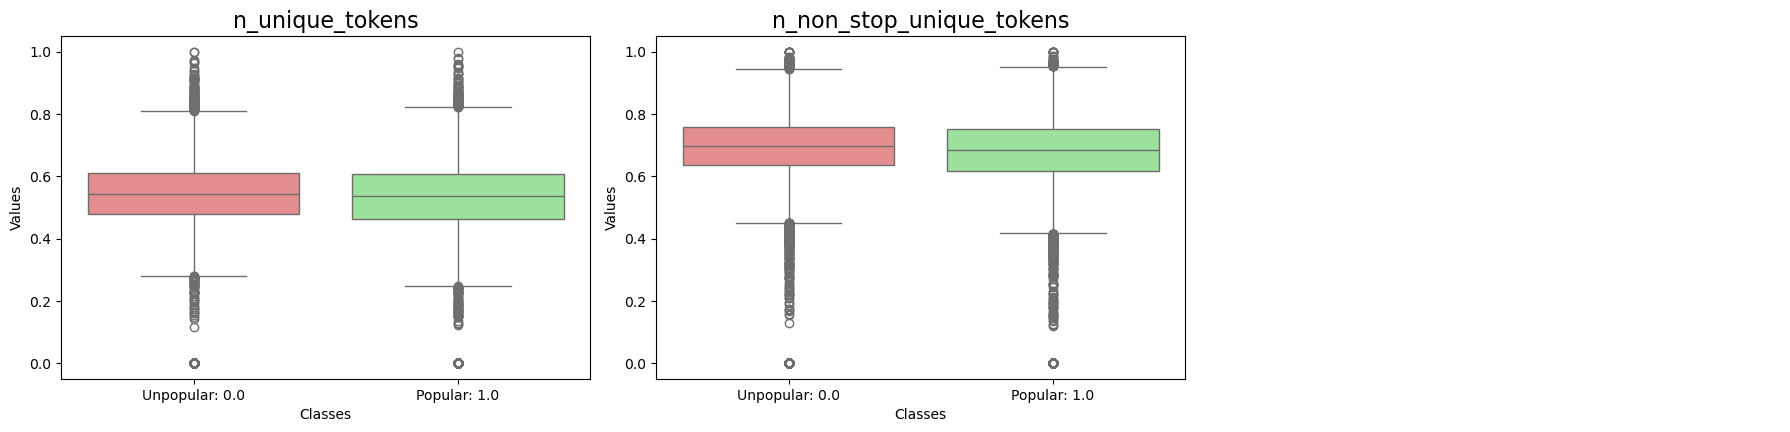

In [23]:
boxplot_by_class(data[words_con+['shares_c']])

### After Outlier treatment

In [24]:
data_treated = treat_outliers_knn(data, words_con, data_treated)

**Checking distribution and outliers after outlier treatment**

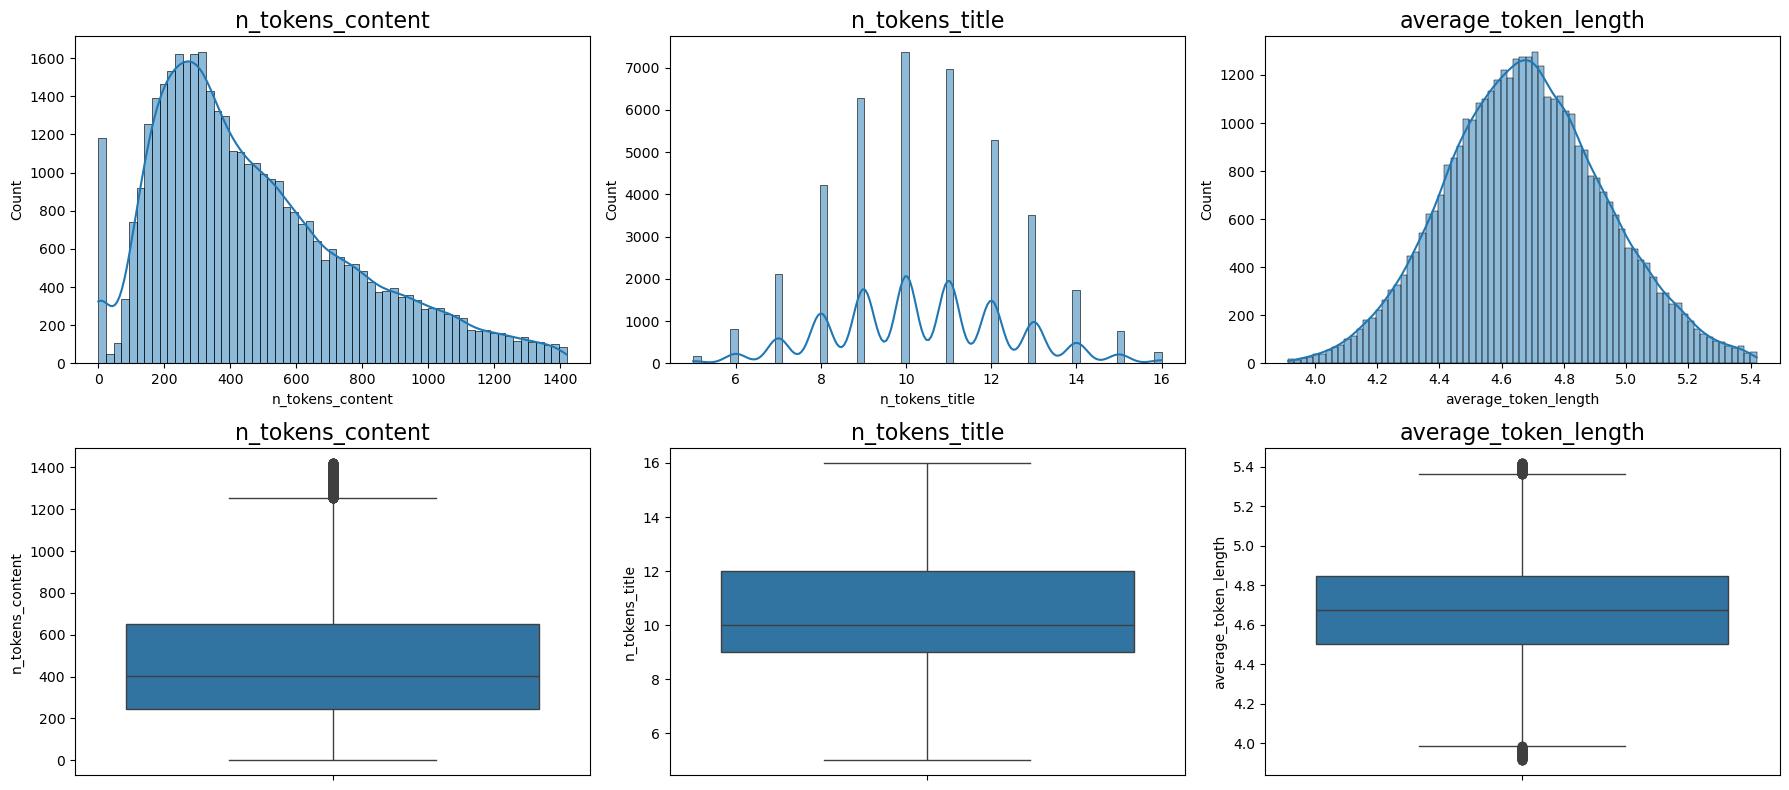

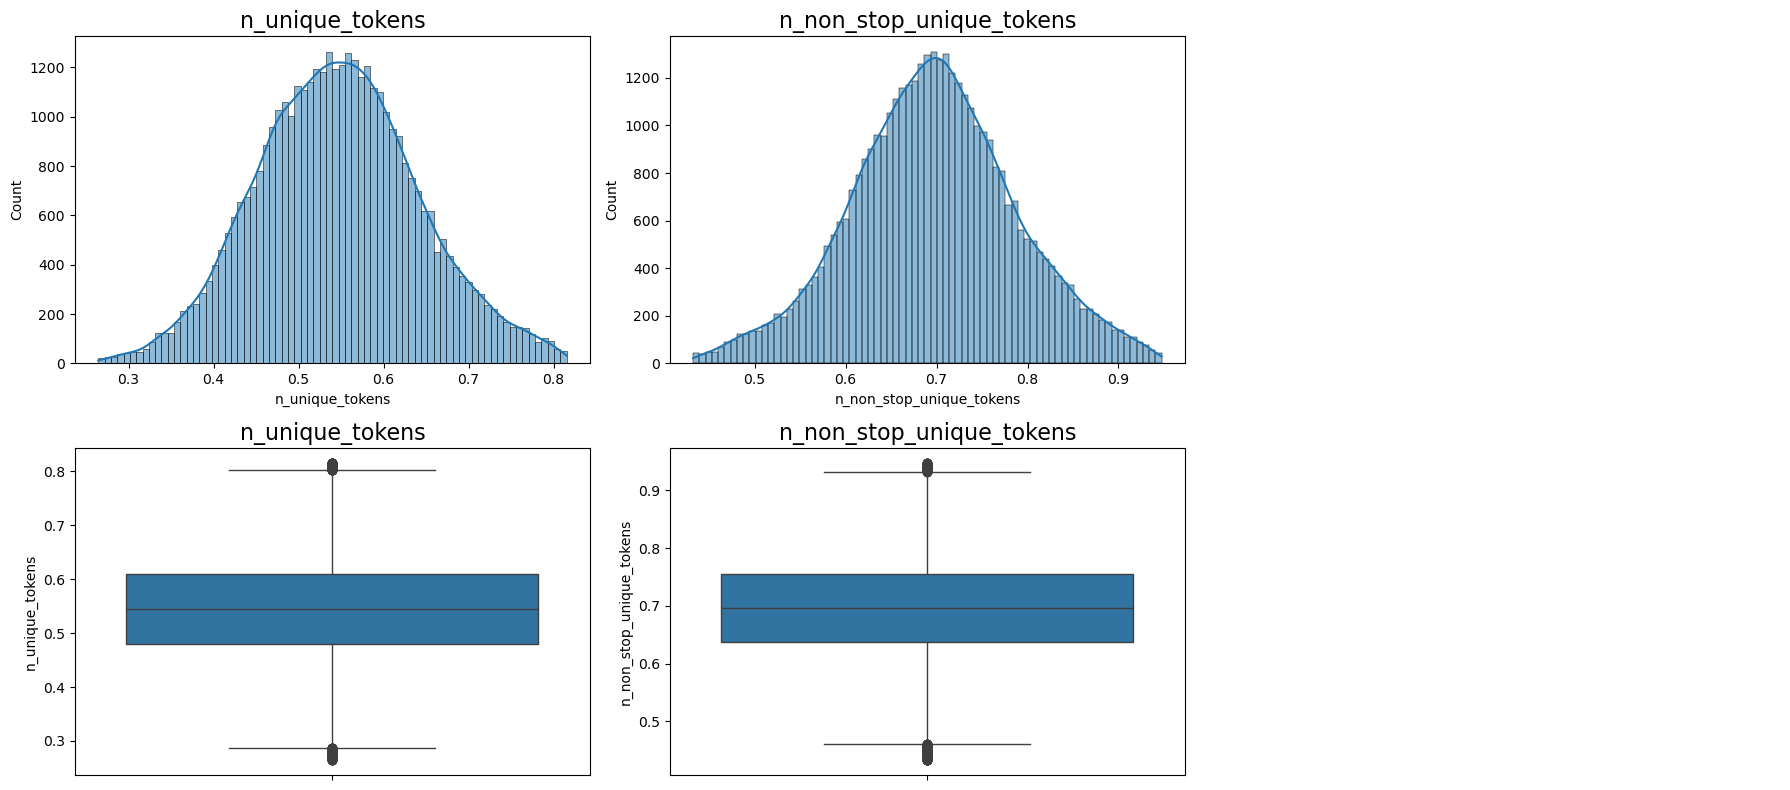

In [25]:
plot_histogram_boxplot(data_treated[words_con])

**Distribution of continuous variables for each class**

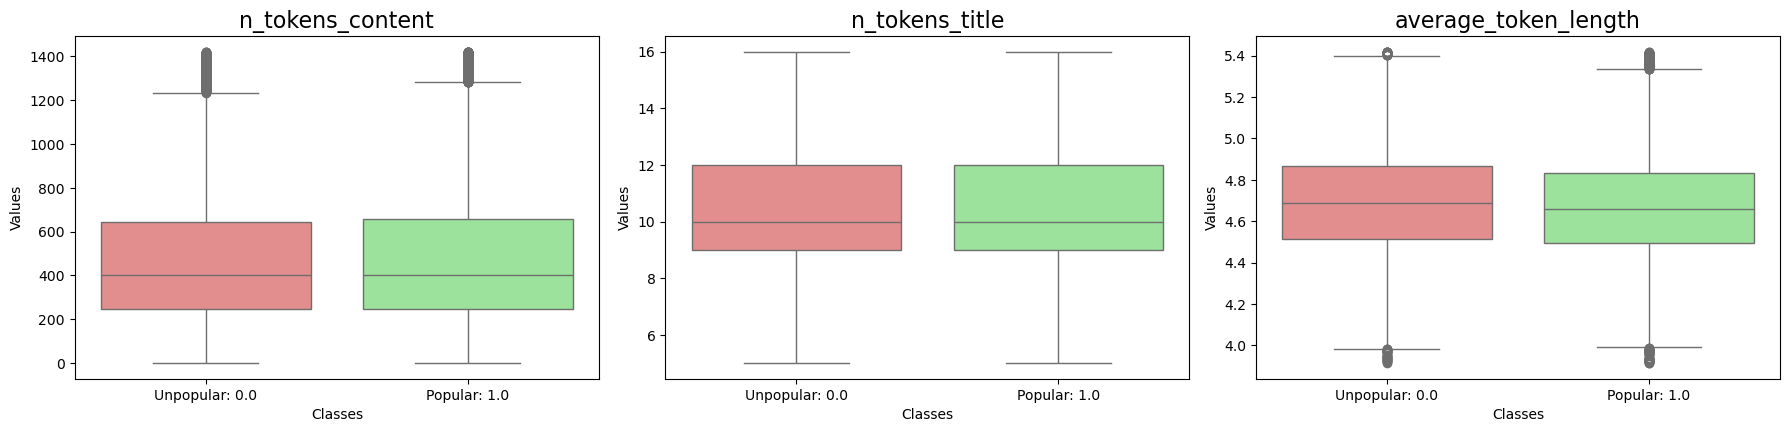

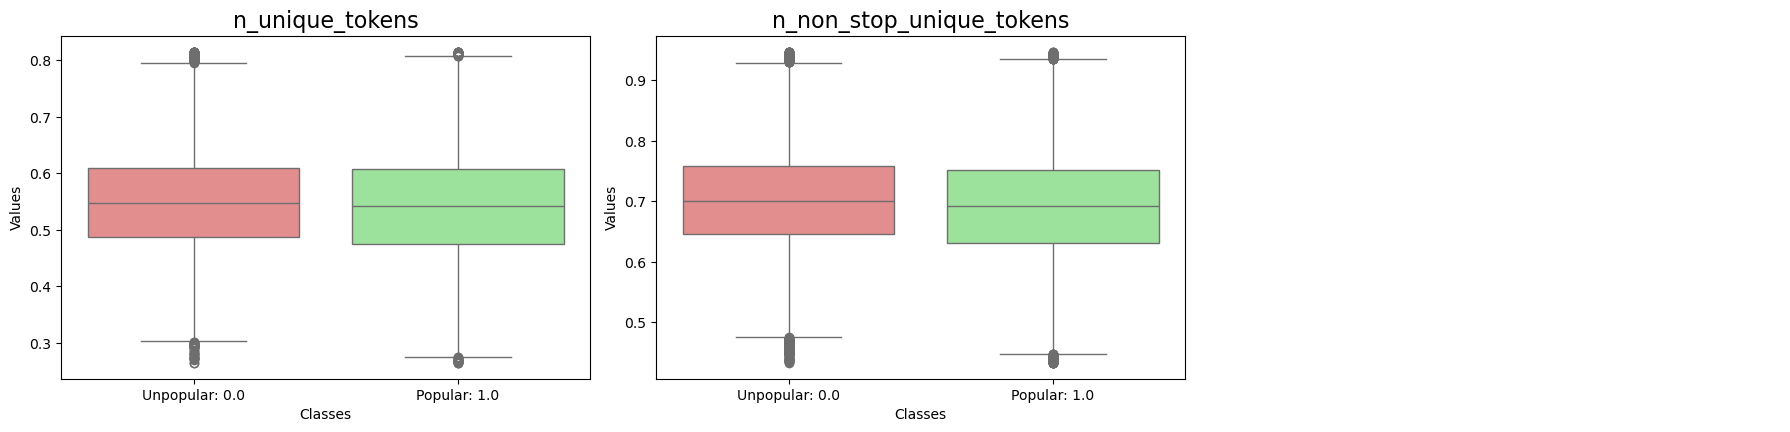

In [26]:
boxplot_by_class(pd.concat([data_treated[words_con], data['shares_c']], axis=1))

**Above analysis suggests Lack of Discriminatory Power. If the box plots overlap significantly, it suggests that the feature represented by the box plot doesn't offer clear separation or discriminatory power between the classes.**

**Checking for correlation and multicolinearity.**

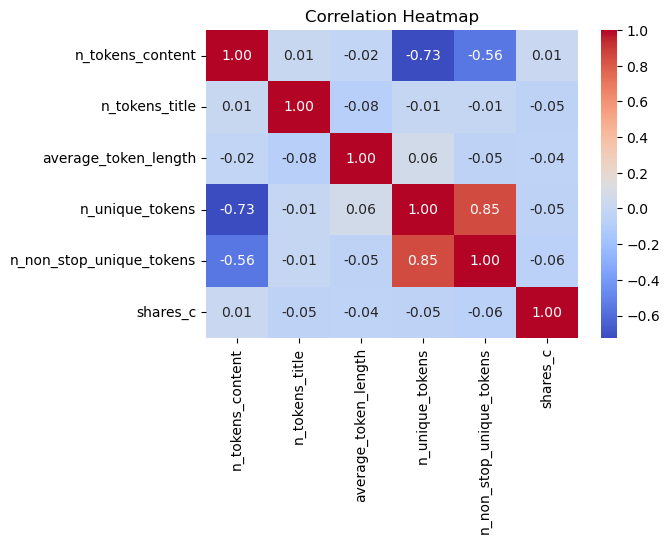

In [27]:
plot_corr_heatmap(pd.concat([data_treated[words_con], data[['shares_c']]], axis=1))

**'n_unique_tokens' is highly correlated with other features, we will drop this feature.**

In [28]:
# Making a list of columns to drop
cols_to_drop = []

cols_to_drop.append('n_unique_tokens')

### 1.2 Discrete features

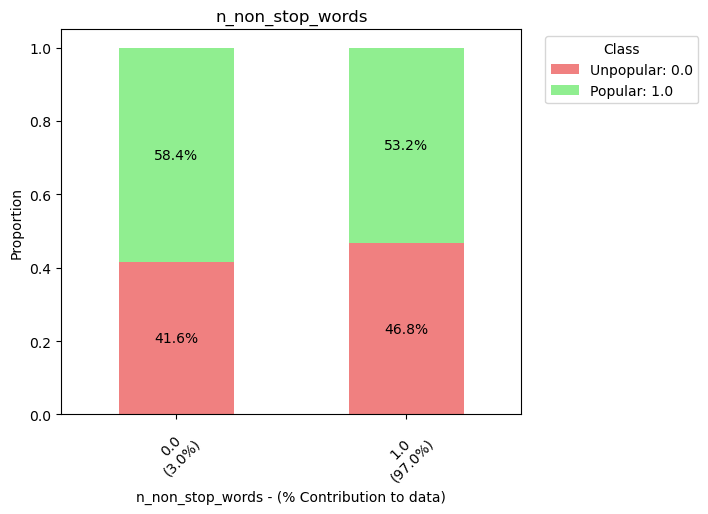

In [29]:
discrete_data_plot(data,words_dis, 8, 5)

In [30]:
# checking for association between categorical variables
chi_squared_hypothesis_test(data, words_dis, 'shares_c')

## 2. LINKS

In [31]:
#Looking at the basic statistics 
data[links].describe(percentiles=[0.1,0.25,0.5,0.75,0.9]).transpose()

count          mean           std  min  10%  \
num_hrefs                   39643.0     10.883687     11.332160  0.0  2.0   
num_self_hrefs              39643.0      3.293469      3.855043  0.0  0.0   
self_reference_min_shares   39643.0   3998.836211  19738.912918  0.0  0.0   
self_reference_max_shares   39643.0  10329.473218  41028.061285  0.0  0.0   
self_reference_avg_sharess  39643.0   6401.684395  24211.637462  0.0  0.0   

                                 25%     50%     75%      90%       max  
num_hrefs                      4.000     8.0    14.0     23.0     304.0  
num_self_hrefs                 1.000     3.0     4.0      6.0     116.0  
self_reference_min_shares    639.000  1200.0  2600.0   7000.0  843300.0  
self_reference_max_shares   1100.000  2800.0  8000.0  19300.0  843300.0  
self_reference_avg_sharess   981.125  2200.0  5200.0  12000.0  843300.0

**Here all features looks continous.**

### 2.1 Continous features

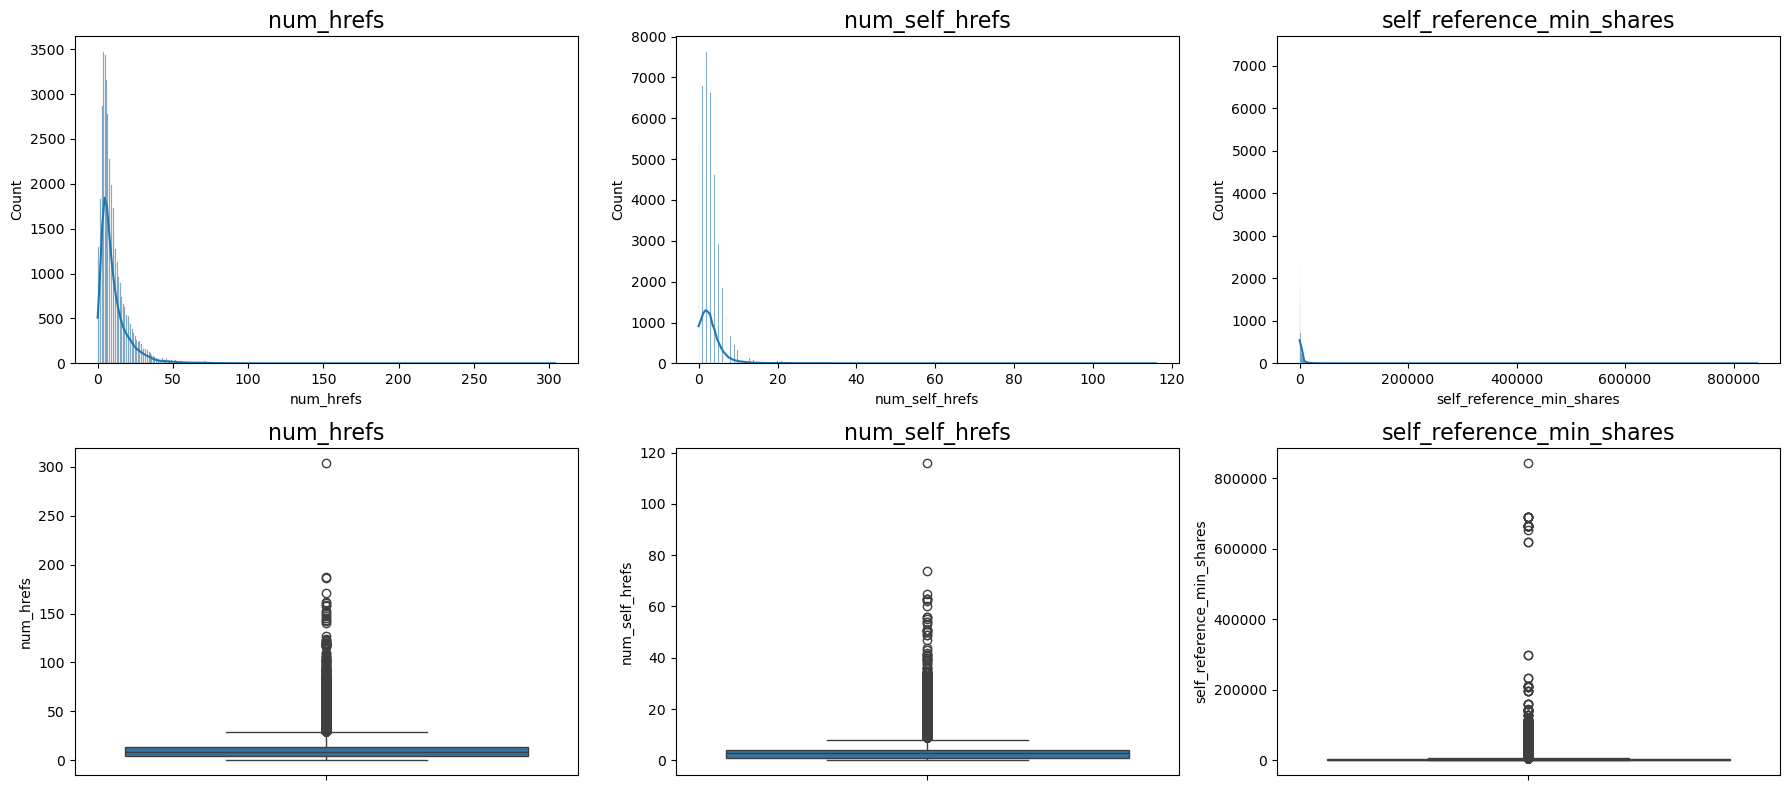

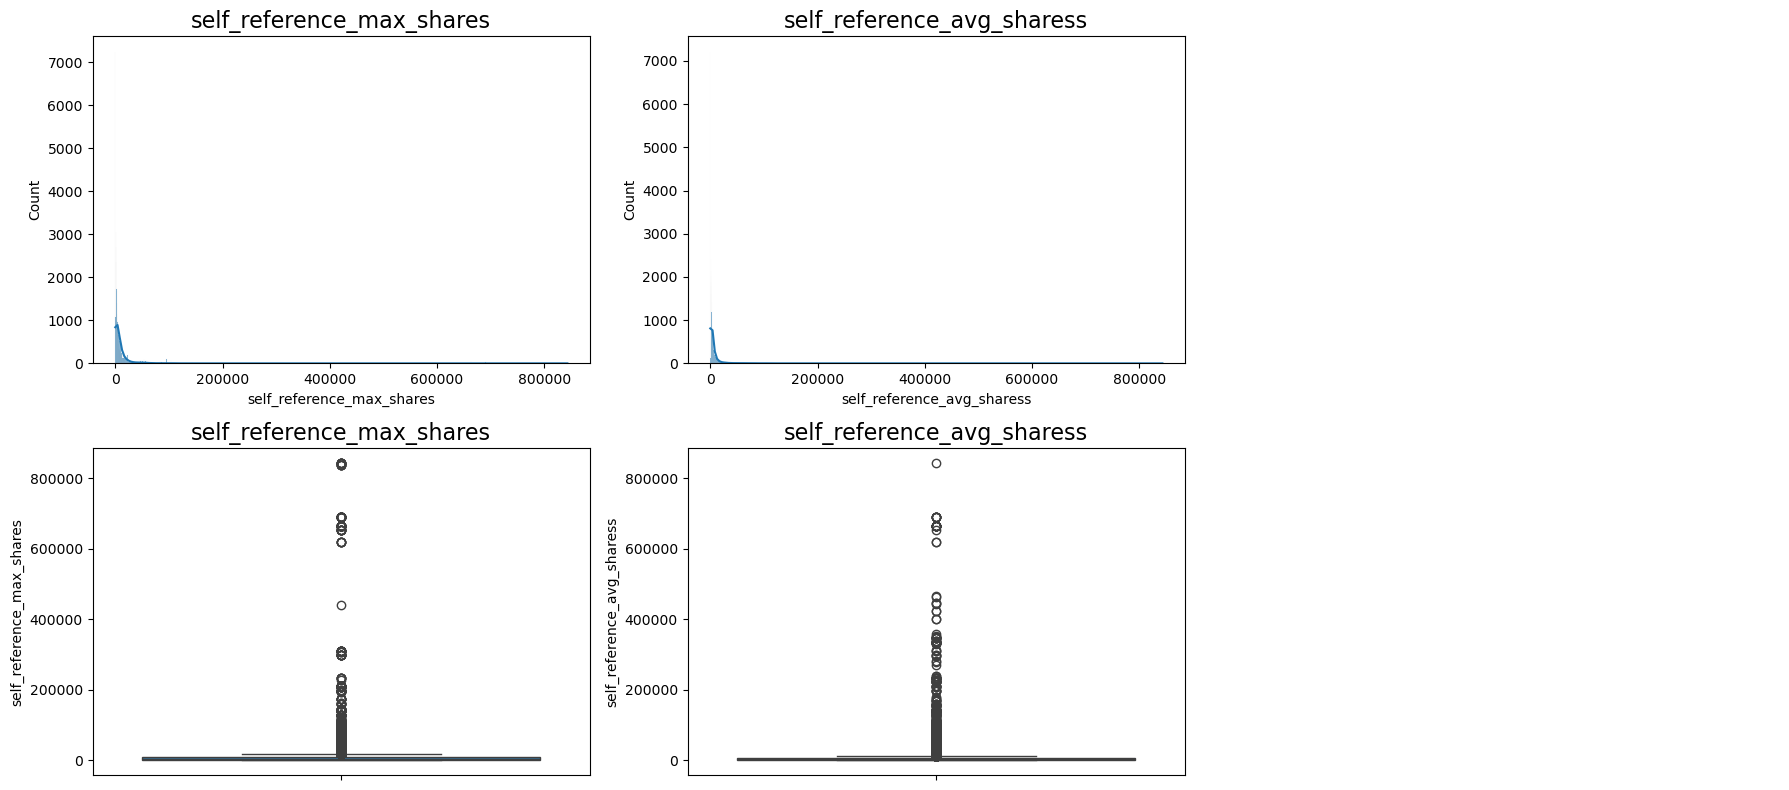

In [32]:
plot_histogram_boxplot(data[links])

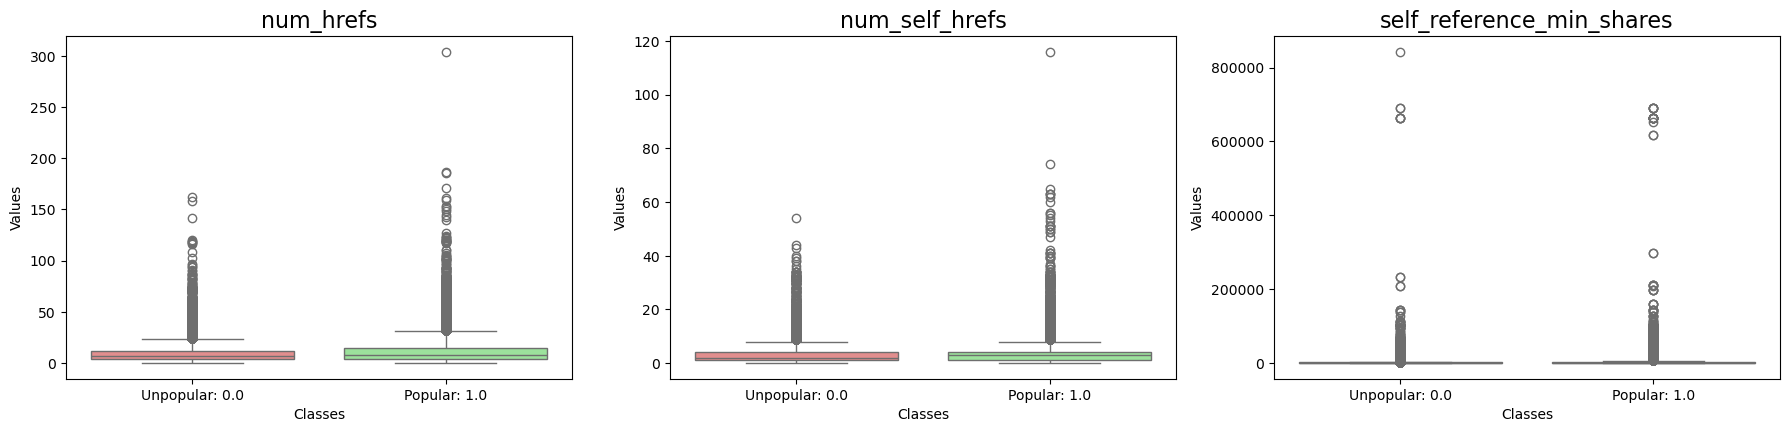

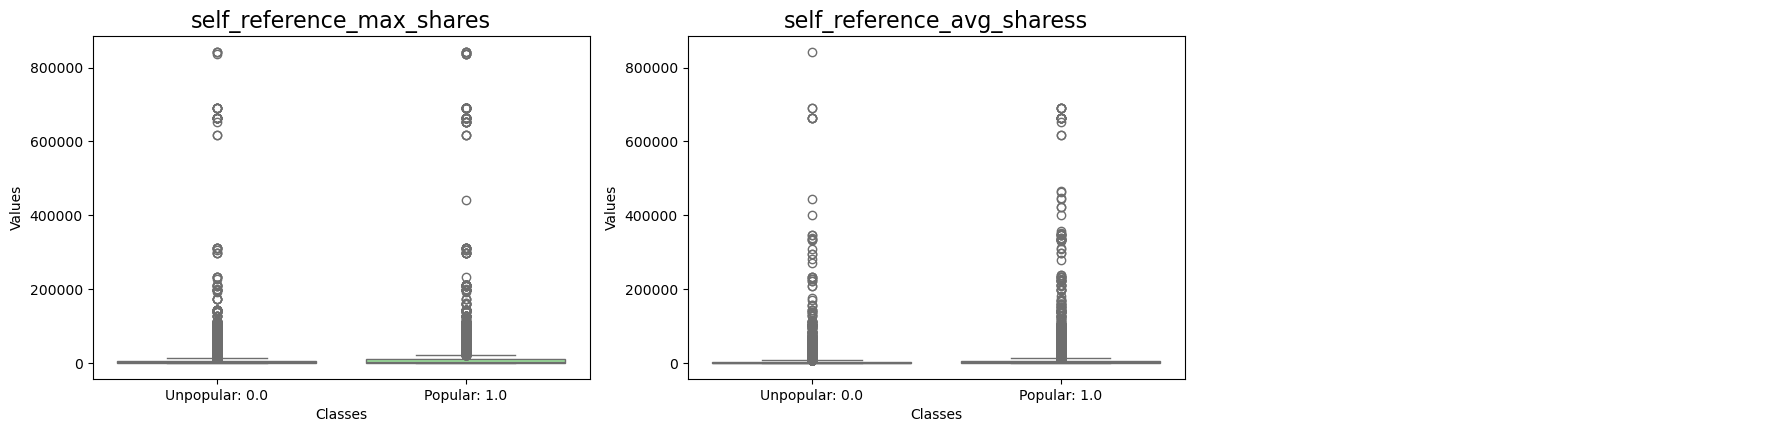

In [33]:
boxplot_by_class(data[links+['shares_c']])

**All the features seems to have outliers, we will impute the outliers in next step.**

### After Outlier treatment

In [34]:
data_treated = treat_outliers_knn(data, links, data_treated)

In [35]:
data_treated

n_tokens_content  n_tokens_title  average_token_length  \
0                 219.0            12.0              4.680365   
1                 255.0             9.0              4.913725   
2                 211.0             9.0              4.393365   
3                 531.0             9.0              4.404896   
4                1072.0            13.0              4.682836   
...                 ...             ...                   ...   
39638             346.0            11.0              4.523121   
39639             328.0            12.0              4.405488   
39640             442.0            10.0              5.076923   
39641             682.0             6.0              4.975073   
39642             157.0            10.0              4.471338   

       n_unique_tokens  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  \
0             0.663594                  0.815385        4.0             2.0   
1             0.604743                  0.791946        3.0             1.0   
2             0.575130                  0.663866        3.0             1.0   
3             0.503788                  0.665635        9.0             0.0   
4             0.415646                  0.540890       19.0             3.1   
...                ...                       ...        ...             ...   
39638         0.529052                  0.684783        9.0             7.0   
39639         0.696296                  0.885057        9.0             7.0   
39640         0.516355                  0.644128       24.0             1.0   
39641         0.539493                  0.692661       10.0             1.0   
39642         0.701987                  0.846154        1.0             1.0   

       self_reference_min_shares  self_reference_max_shares  \
0                          496.0                      496.0   
1                            0.0                        0.0   
2                          918.0                      918.0   
3                            0.0                        0.0   
4                          545.0                    16000.0   
...                          ...                        ...   
39638                     1818.4                    14630.0   
39639                     2100.0                     2100.0   
39640                     1400.0                     1400.0   
39641                      452.0                      452.0   
39642                     2100.0                     2100.0   

       self_reference_avg_sharess  
0                      496.000000  
1                        0.000000  
2                      918.000000  
3                        0.000000  
4                     3151.157895  
...                           ...  
39638                 5642.712472  
39639                 2100.000000  
39640                 1400.000000  
39641                  452.000000  
39642                 2100.000000  

[39643 rows x 10 columns]

**Checking distribution and outliers after outlier treatment**

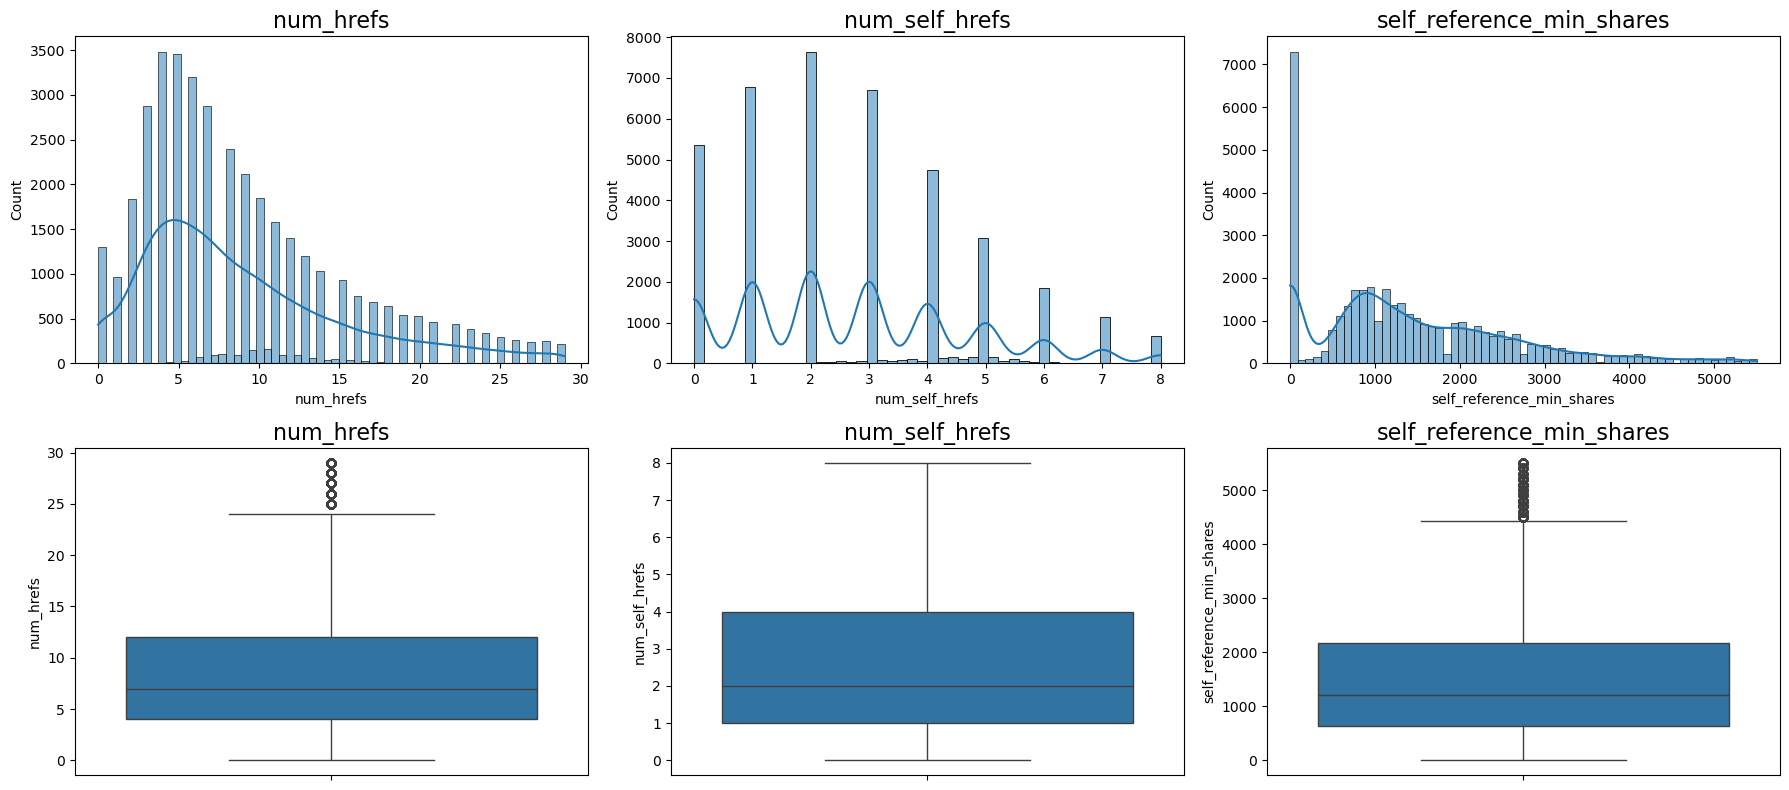

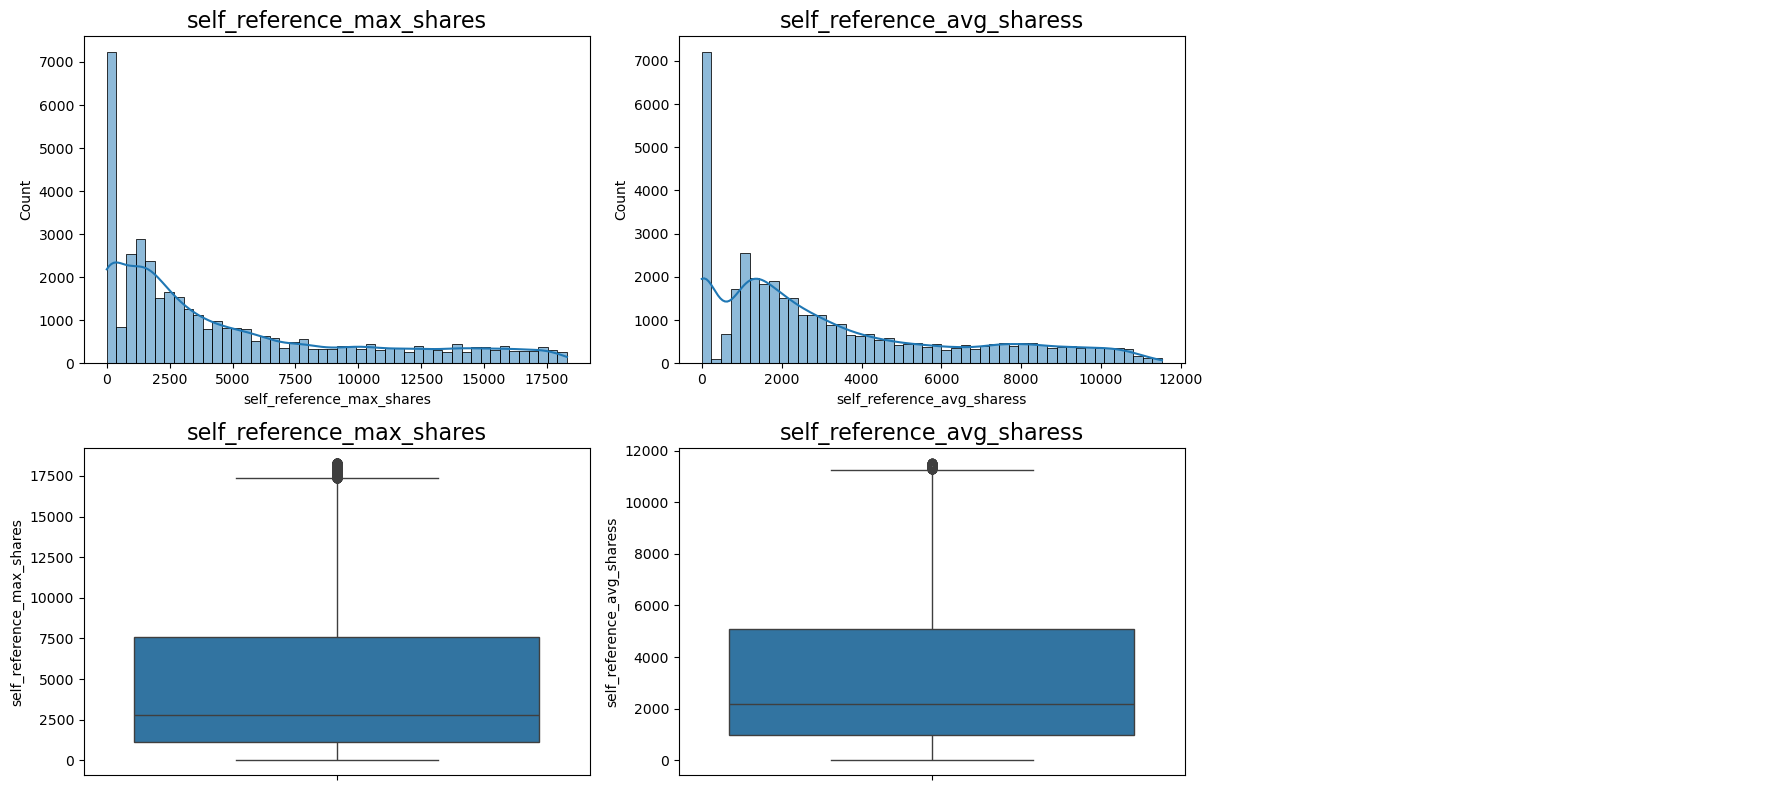

In [36]:
plot_histogram_boxplot(data_treated[links])

**Distribution of continuous variables for each class**

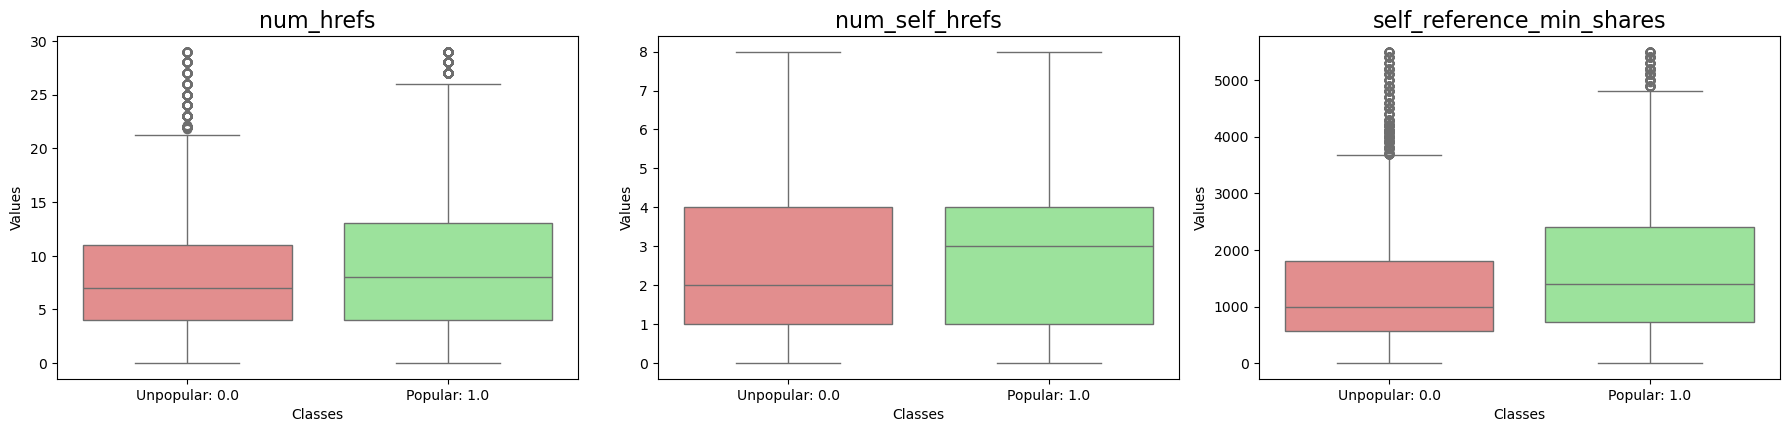

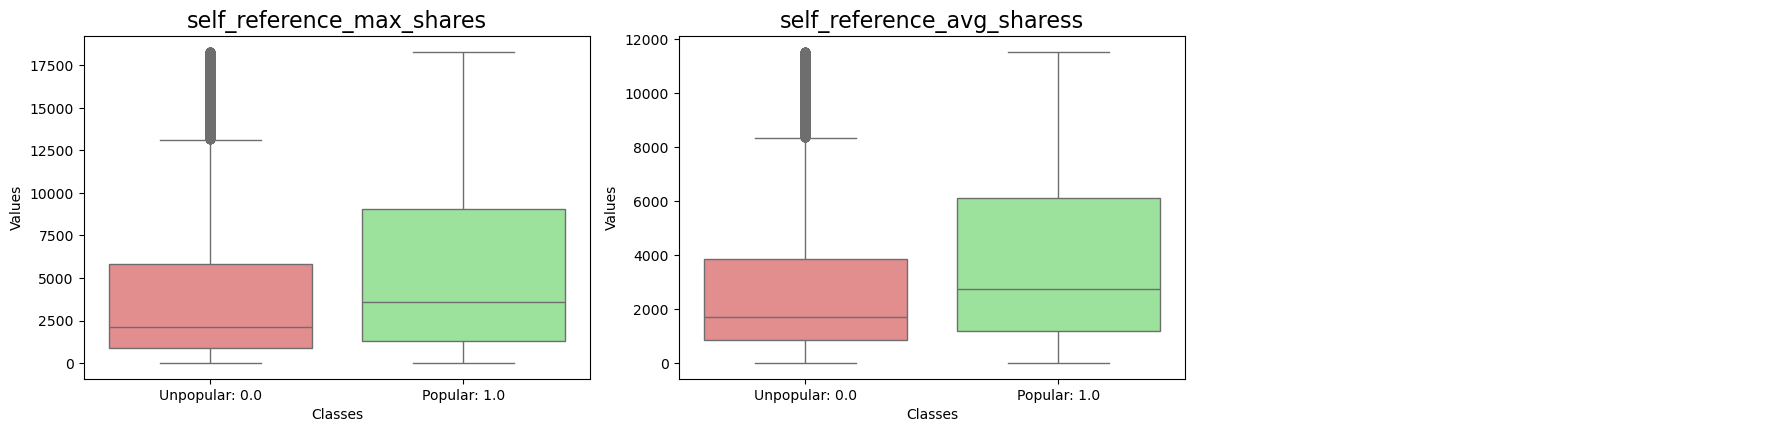

In [37]:
boxplot_by_class(pd.concat([data_treated[links], data['shares_c']], axis=1))

**Checking for correlation and multicolinearity.**

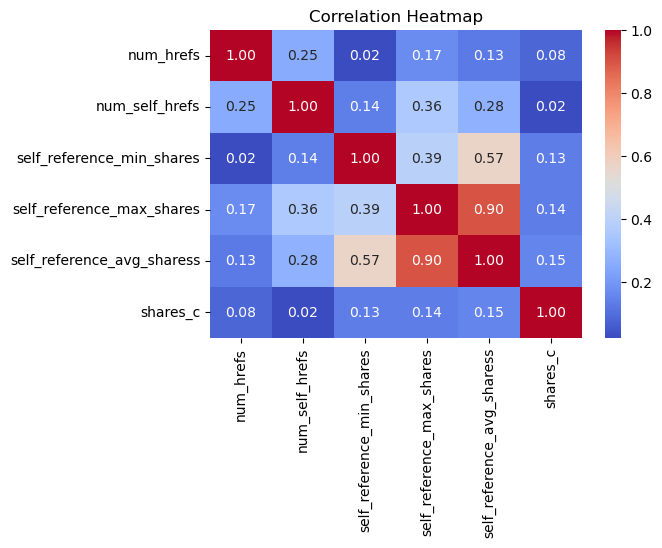

In [38]:
plot_corr_heatmap(pd.concat([data_treated[links], data[['shares_c']]], axis=1))

**'self_reference_avg_sharess' is highly correlated with 'self_reference_min_shares', 'self_reference_max_shares', we will drop this feature.**

In [39]:
cols_to_drop.append('self_reference_avg_sharess')

## 3. DIGITAL MEDIA

In [40]:
#Looking at the basic statistics 
data[media].describe(percentiles=[0.1,0.25,0.5,0.75,0.9]).transpose()

count      mean       std  min  10%  25%  50%  75%   90%    max
num_imgs    39643.0  4.542971  8.306262  0.0  0.0  1.0  1.0  4.0  14.0  128.0
num_videos  39643.0  1.249905  4.107902  0.0  0.0  0.0  0.0  1.0   2.0   91.0

**Some observations:**
* Both 'num_imgs' and 'num_videos' display discrete values within a specific range
* 'num_imgs' exhibits a mean of approximately 4.54, with values ranging from 0 to 128. Notably, the data is concentrated within lower values, as indicated by the 25th, 50th (median), and 75th percentiles, suggesting a discrete and limited distribution
* Similarly, 'num_videos' showcases a mean around 1.25, ranging from 0 to 91. The data is skewed towards lower values, corroborated by the prevalence of zeros and minimal values in the 25th, 50th, and 75th percentiles, highlighting its discrete nature.

**Feature engineering for 'num_imgs' feature**

In [41]:
# Custom binning based on domain knowledge or analysis insights
bins_num_imgs = [0, 5, np.inf]  # Define custom bin edges (adjust as needed)
labels_num_imgs = ['Less_than_5', 'Greater_than_5']  # Define bin labels

# Create a new column with bins based on 'num_imgs'
data_treated['num_imgs'] = pd.cut(data['num_imgs'], bins=bins_num_imgs, labels=labels_num_imgs, right=False)

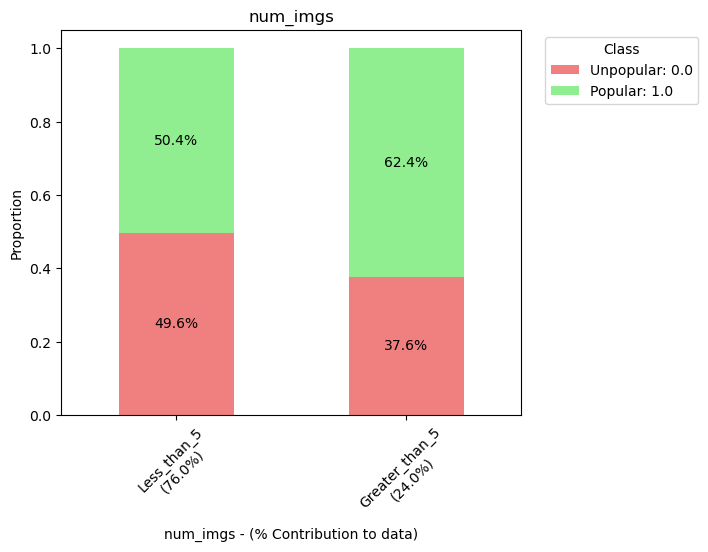

In [42]:
# Analysis
discrete_data_plot(pd.concat([data_treated['num_imgs'], data['shares_c']], axis=1),['num_imgs'], 8, 5)

# checking for association between categorical variables
chi_squared_hypothesis_test(pd.concat([data_treated['num_imgs'], data['shares_c']], axis=1),['num_imgs'], 'shares_c')

**After exploring different binning strategies for 'num_imgs,' we concluded that binning it into two categories, namely 'Less_than_5' and 'Greater_than_5,' serves our analysis best. The decision was influenced by the notable distribution disparity observed within these two categories. This transformation not only simplifies the feature but also highlights a substantial divergence in the data distribution, indicating the potential usefulness of this newly engineered feature.**

**Feature engineering for 'num_videos' feature**

In [43]:
# Custom binning based on domain knowledge or analysis insights
bins_num_videos = [0, 1, np.inf]  # Define custom bin edges (adjust as needed)
labels_num_videos = ['No_Videos', 'Has_Videos']  # Define bin labels

# Create a new column with bins based on 'num_imgs'
data_treated['num_videos'] = pd.cut(data['num_videos'], bins=bins_num_videos, labels=labels_num_videos, right=False)

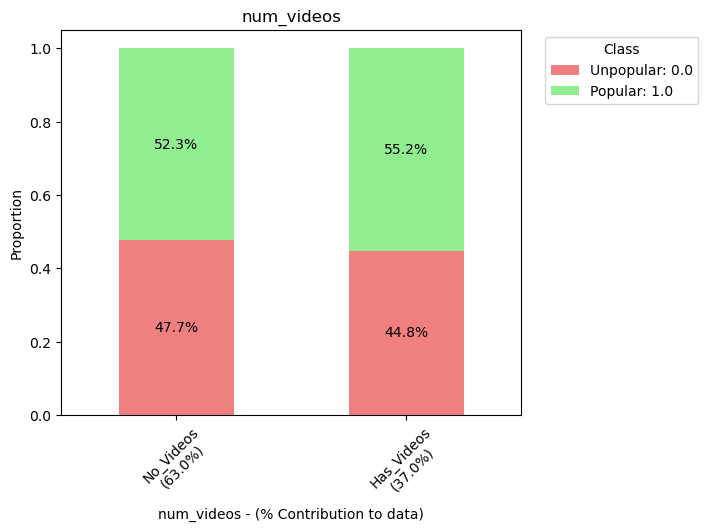

In [44]:
# Analysis
discrete_data_plot(pd.concat([data_treated['num_videos'], data['shares_c']], axis=1),['num_videos'], 8, 5)

# checking for association between categorical variables
chi_squared_hypothesis_test(pd.concat([data_treated['num_videos'], data['shares_c']], axis=1),['num_videos'], 'shares_c')

**Likewise, 'num_videos' underwent categorization into two groups: 'No_Videos' and 'Has_Videos.' This classification was chosen to effectively distinguish between instances devoid of videos ('No_Videos') and those containing videos ('Has_Videos'). Such categorization simplifies the feature while encapsulating the presence or absence of videos, enabling clearer insights into their impact on the dataset**

## 4. KEYWORDS

In [45]:
#Looking at the basic statistics 
data[keywords].describe(percentiles=[0.1,0.25,0.5,0.75,0.9]).transpose()

count           mean            std  min            10%  \
num_keywords  39643.0       7.223772       1.909154  1.0       5.000000   
kw_min_min    39643.0      26.107484      69.633960 -1.0      -1.000000   
kw_max_min    39643.0    1153.961166    3858.039075  0.0     224.000000   
kw_avg_min    39643.0     312.371221     620.791139 -1.0      76.500000   
kw_min_max    39643.0   13612.114774   57986.741144  0.0       0.000000   
kw_max_max    39643.0  752321.771813  214504.348368  0.0  617900.000000   
kw_avg_max    39643.0  259280.143039  135103.478543  0.0  107650.000000   
kw_min_avg    39643.0    1117.113731    1137.452458 -1.0       0.000000   
kw_max_avg    39643.0    5657.265804    6098.939173  0.0    3323.770732   
kw_avg_avg    39643.0    3135.864283    1318.166544  0.0    2008.222376   

                        25%            50%            75%            90%  \
num_keywords       6.000000       7.000000       9.000000      10.000000   
kw_min_min        -1.000000      -1.000000       4.000000     217.000000   
kw_max_min       445.000000     660.000000    1000.000000    1700.000000   
kw_avg_min       141.750000     235.500000     357.000000     515.816667   
kw_min_max         0.000000    1400.000000    7900.000000   26800.000000   
kw_max_max    843300.000000  843300.000000  843300.000000  843300.000000   
kw_avg_max    172843.750000  244566.666667  330980.000000  437252.000000   
kw_min_avg         0.000000    1023.619048    2056.713333    2798.185806   
kw_max_avg      3562.101631    4355.694105    6019.957738    8428.320000   
kw_avg_avg      2382.443334    2870.047184    3600.311954    4567.780675   

                        max  
num_keywords      10.000000  
kw_min_min       377.000000  
kw_max_min    298400.000000  
kw_avg_min     42827.857143  
kw_min_max    843300.000000  
kw_max_max    843300.000000  
kw_avg_max    843300.000000  
kw_min_avg      3613.039819  
kw_max_avg    298400.000000  
kw_avg_avg     43567.659946

**num_keywords Analysis**

**The 'num_keywords' feature ranges from 1 to 10. To enhance its interpretability and aid model performance, we'll conduct feature engineering by creating bins. This transformation simplifies the feature representation, potentially revealing clearer relationships with the target variable and aiding in noise reduction.**

In [46]:
# Custom binning based on domain knowledge or analysis insights
bins_num_keywords = [1, 5, 7, np.inf]  # Define custom bin edges (adjust as needed)
labels_num_keywords = ['Less_than_5', '5_to_6', 'Greater_than_6']  # Define bin labels

# Create a new column with bins based on 'num_imgs'
data_treated['num_keywords'] = pd.cut(data['num_keywords'], bins=bins_num_keywords, labels=labels_num_keywords, right=False)

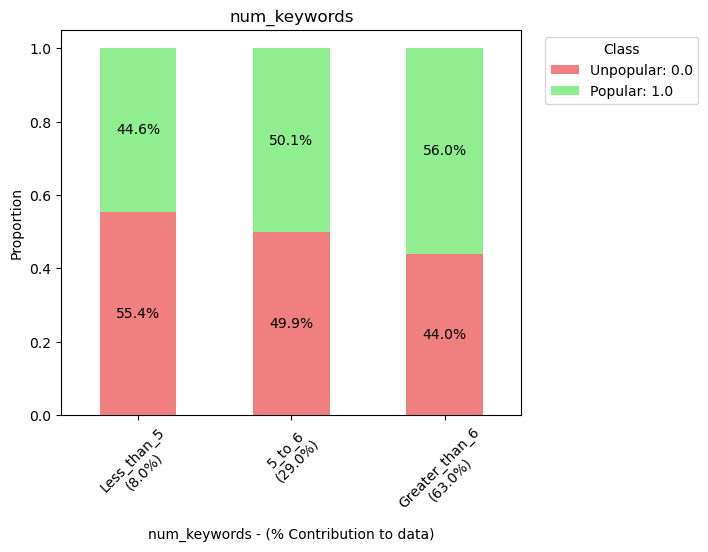

In [47]:
# Analysis
discrete_data_plot(pd.concat([data_treated['num_keywords'], data['shares_c']], axis=1),['num_keywords'], 8, 5)

# checking for association between categorical variables
chi_squared_hypothesis_test(pd.concat([data_treated['num_keywords'], data['shares_c']], axis=1),['num_keywords'], 'shares_c')

**The 'num_keywords' feature was discretized using custom bin edges: [1, 5, 7, ∞], leading to three distinct categories: 'Less_than_5', '5_to_6', and 'Greater_than_6'. This transformation aimed to categorize the number of keywords into concise groups to better capture potential nonlinear relationships with the target variable**

**'kw_min_min', 'kw_max_min', and 'kw_avg_min' Analysis**

**All other features seems to have a continous nature.**

### 4.1 Continous features

In [48]:
keywords_con = list(set(keywords) - set(['num_keywords']))
keywords_con

['kw_avg_avg',
 'kw_min_min',
 'kw_min_avg',
 'kw_max_min',
 'kw_min_max',
 'kw_avg_min',
 'kw_max_avg',
 'kw_max_max',
 'kw_avg_max']

**Checking distribution and outliers**

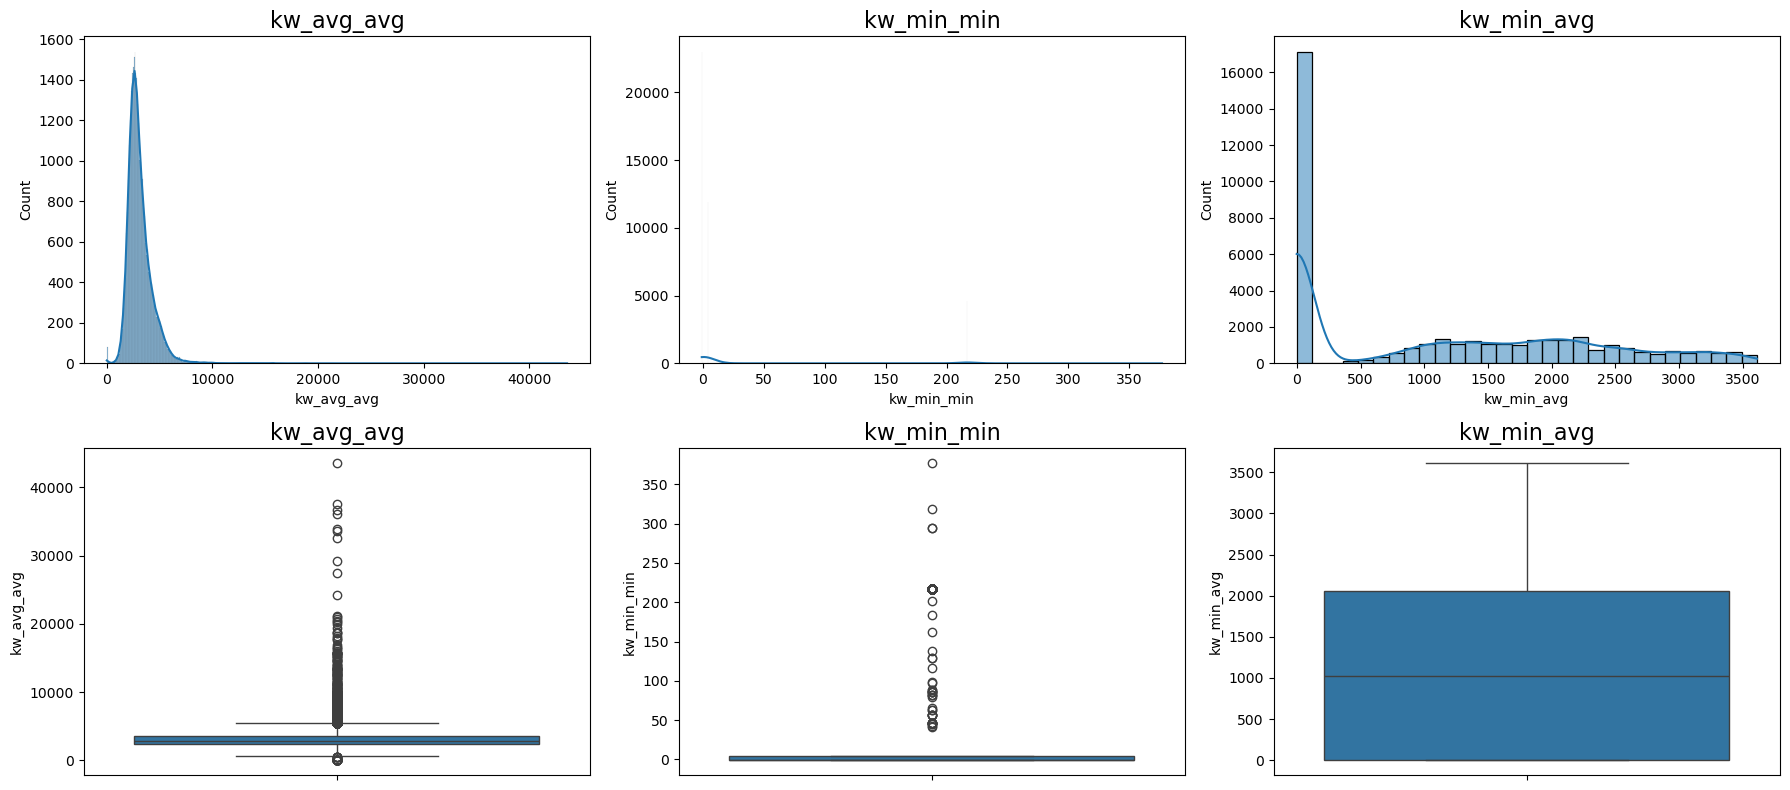

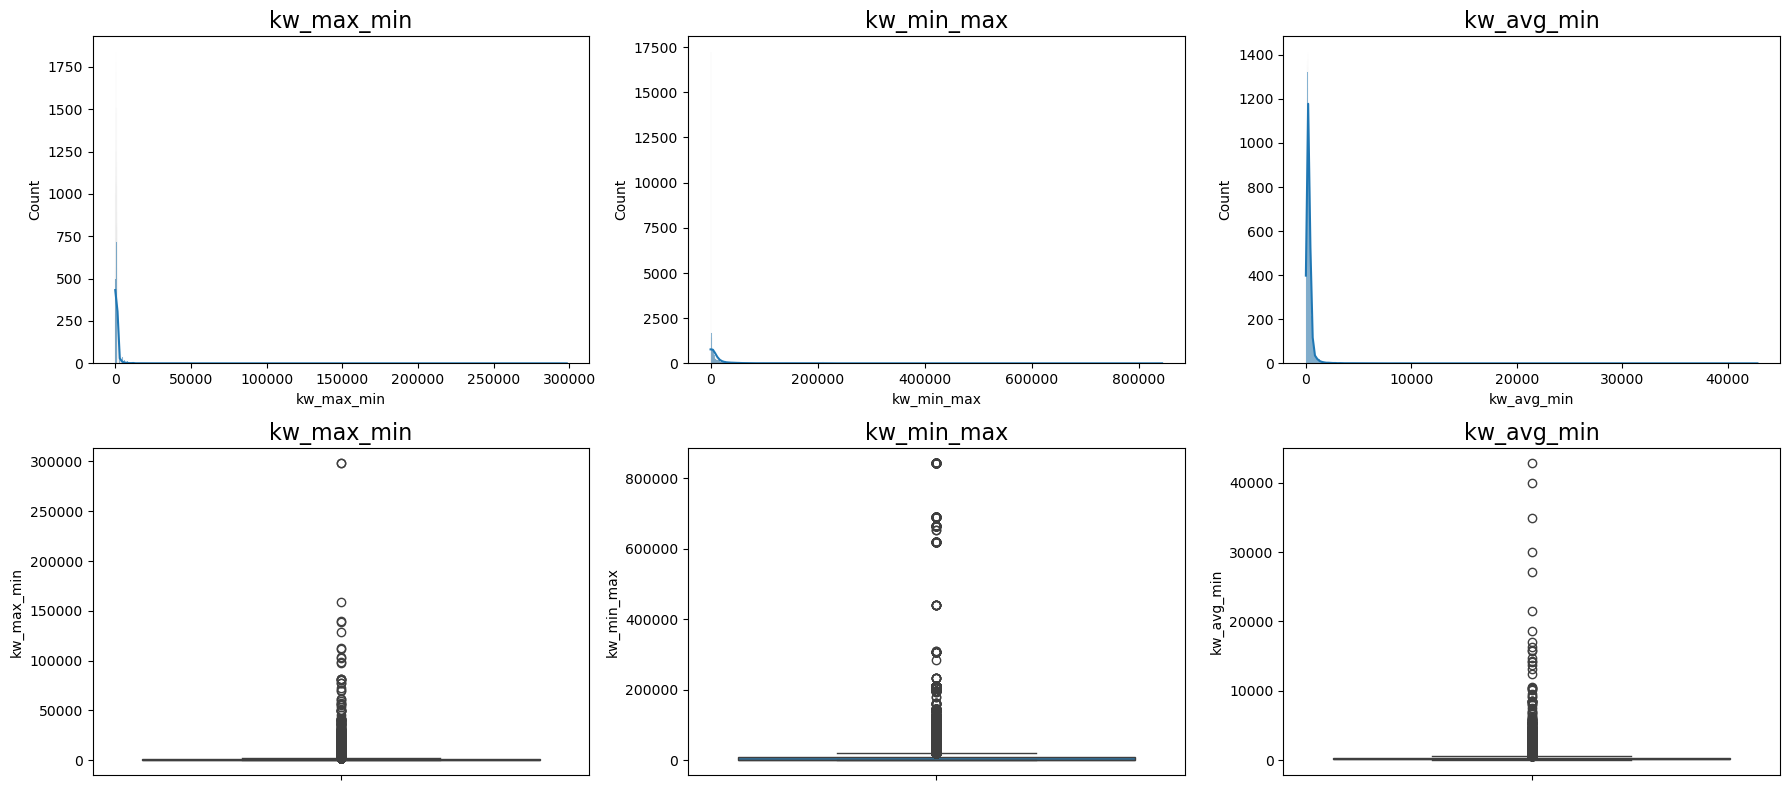

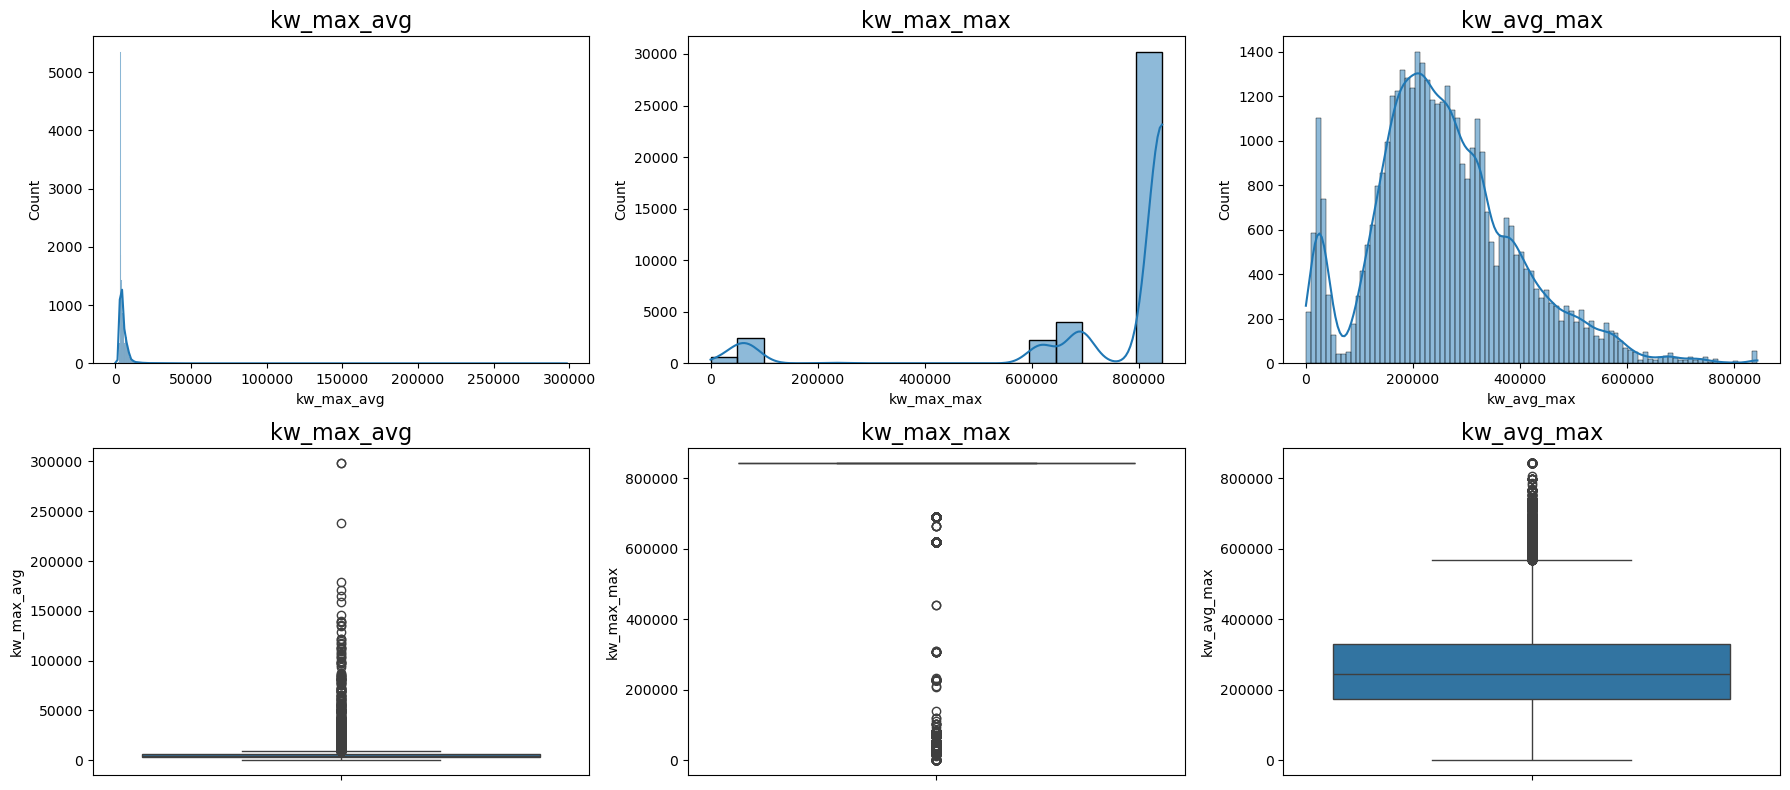

In [49]:
plot_histogram_boxplot(data[keywords_con])

**Distribution of continuous variables for each class**

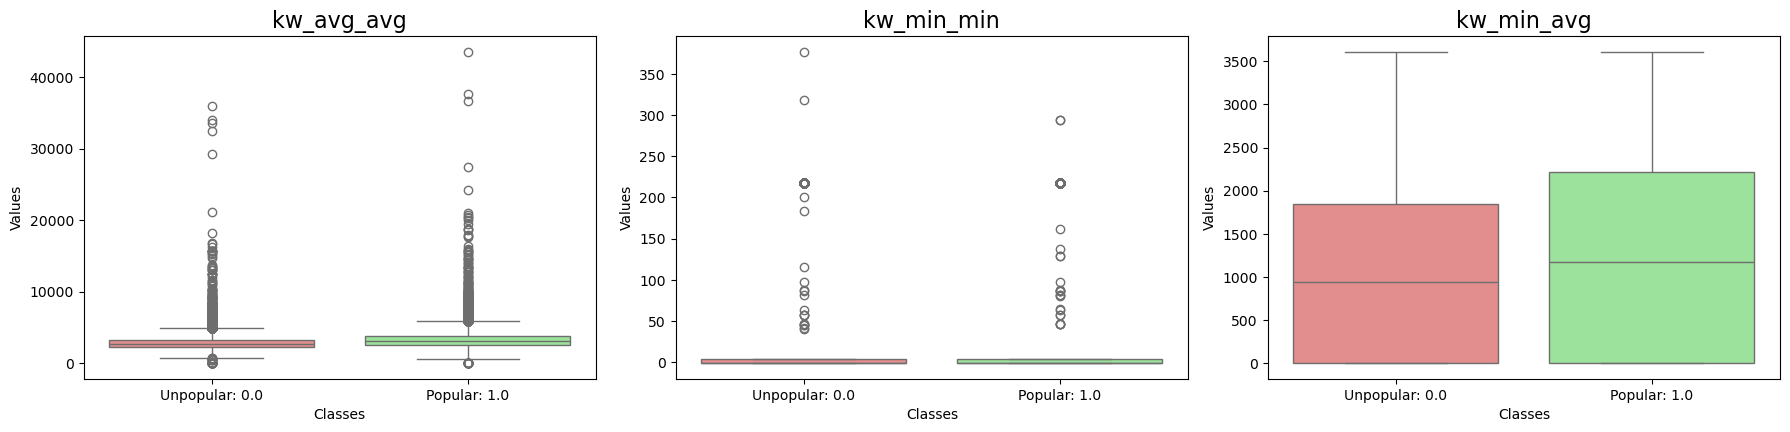

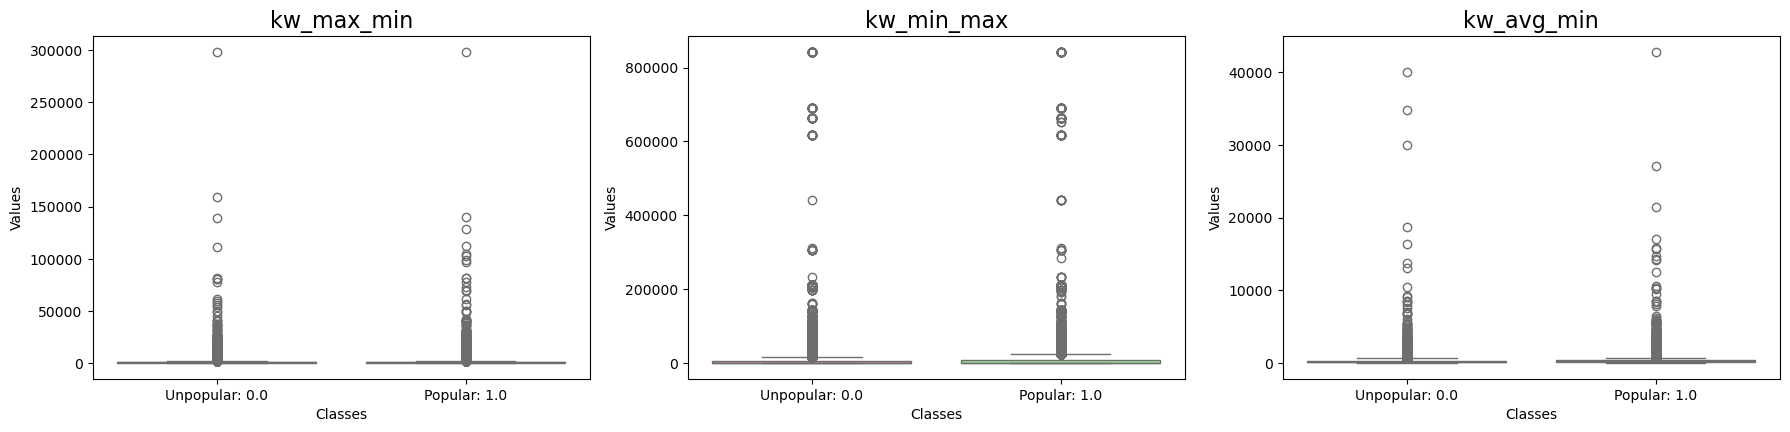

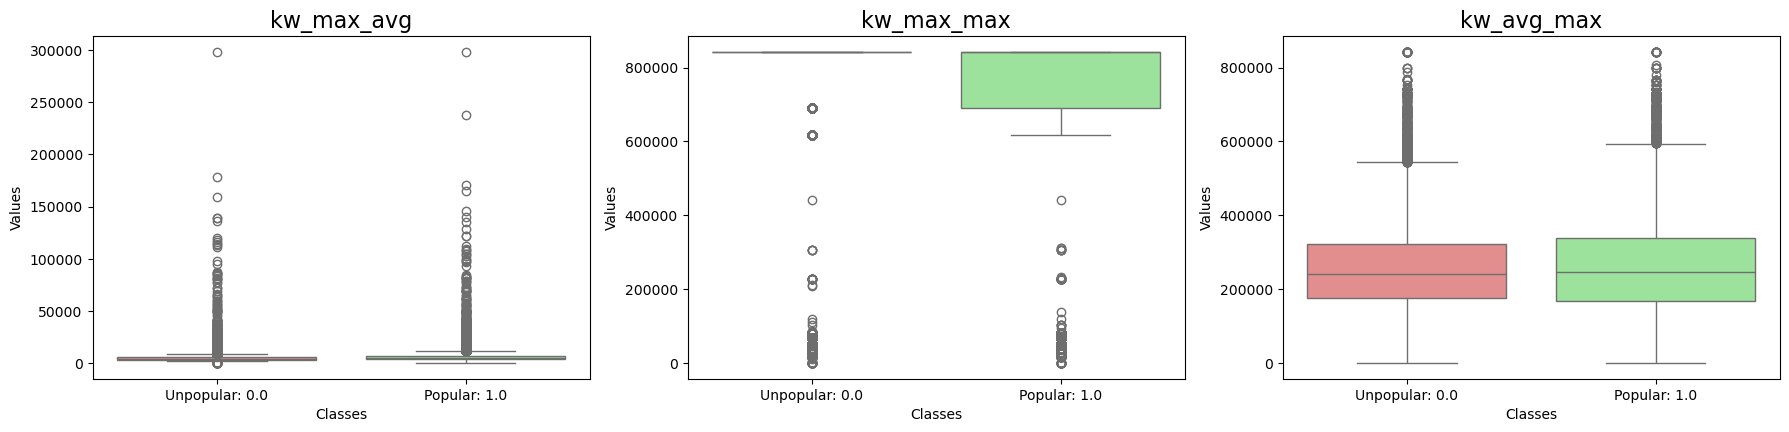

In [50]:
boxplot_by_class(data[keywords_con+['shares_c']])

### After Outlier treatment

In [51]:
data_treated = treat_outliers_knn(data, keywords_con, data_treated)

**Checking distribution and outliers after outlier treatment**

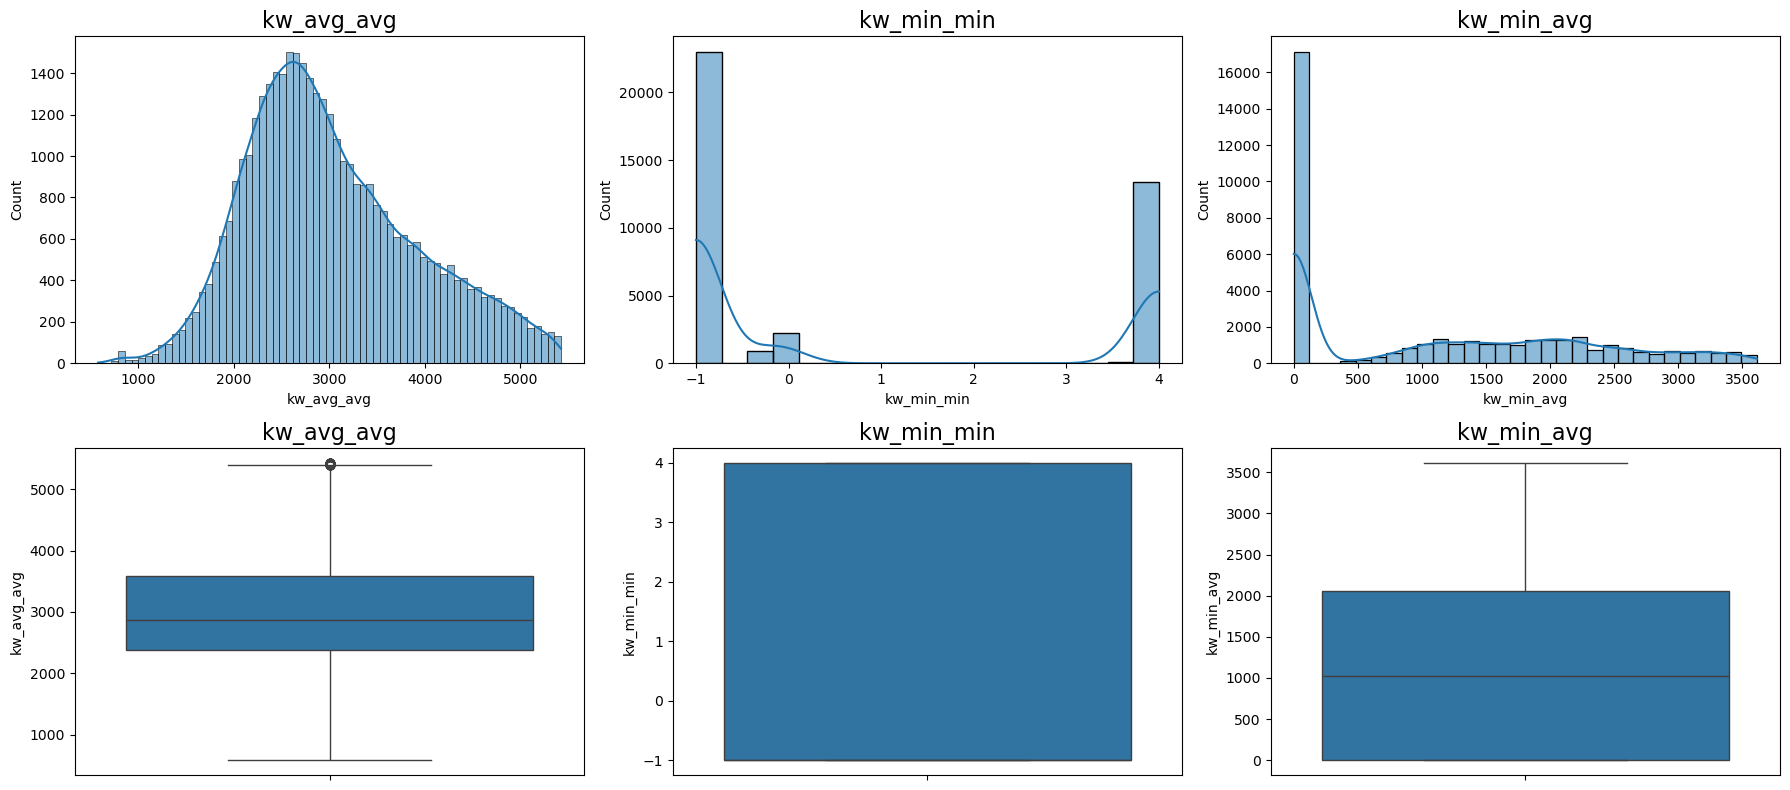

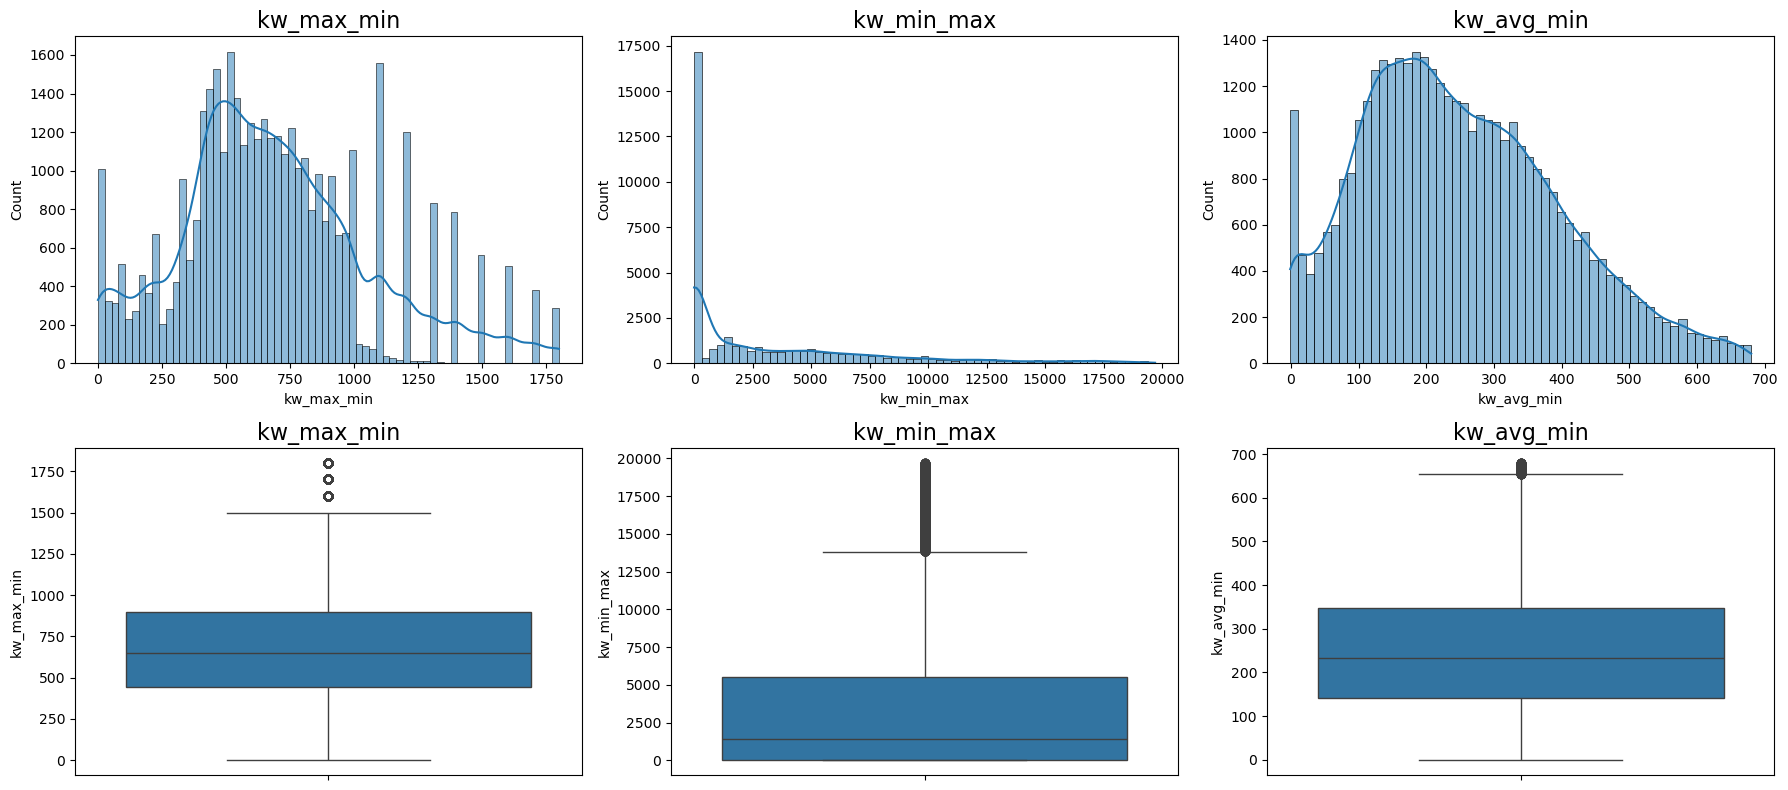

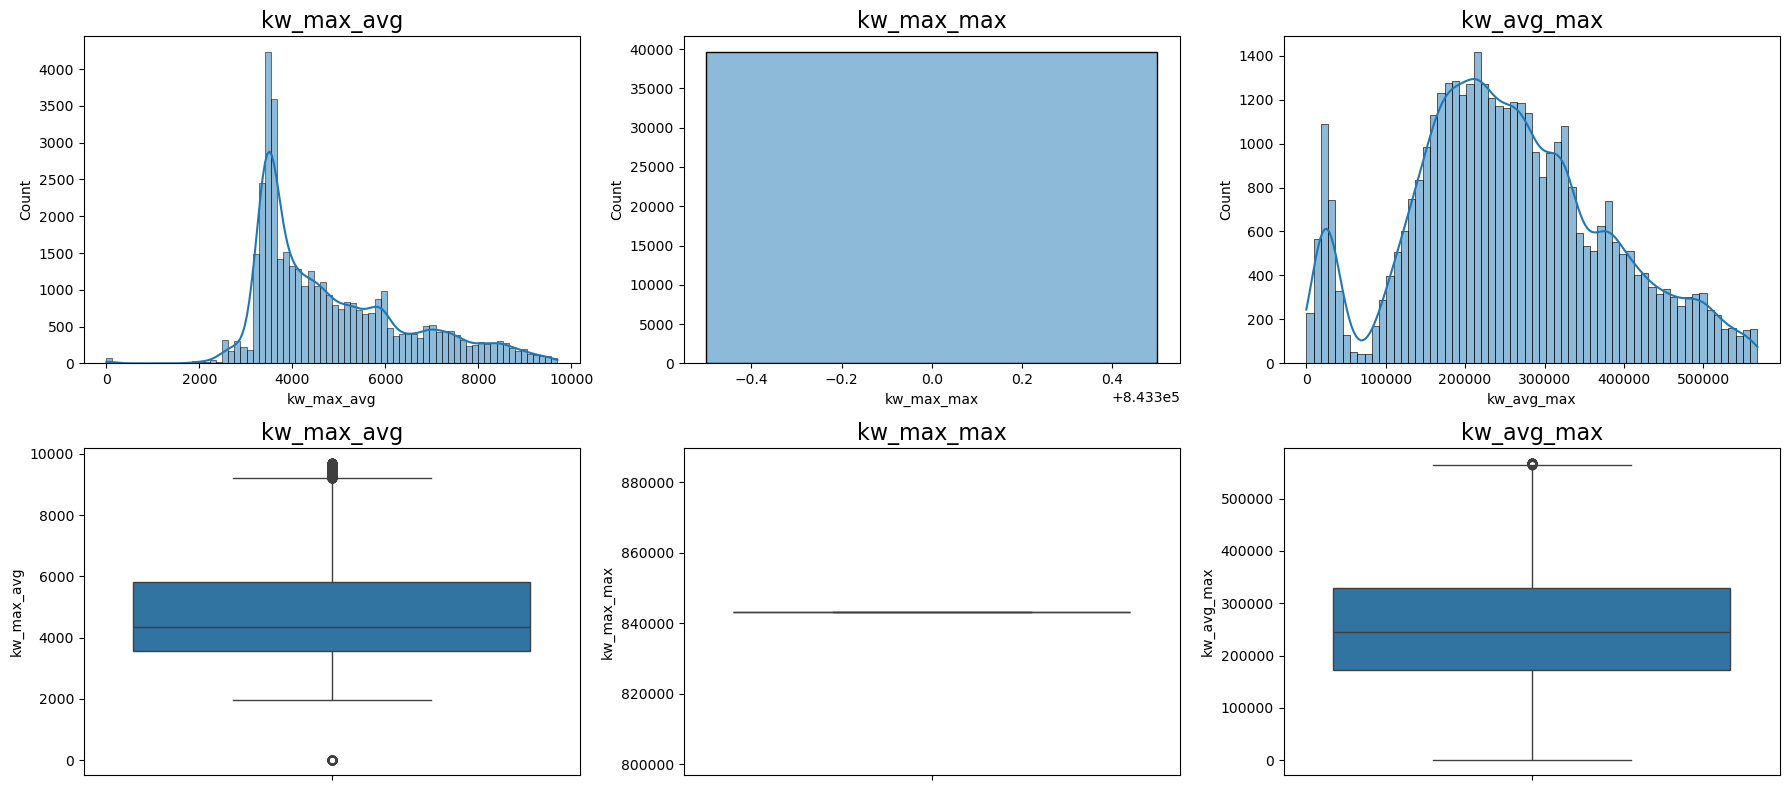

In [52]:
plot_histogram_boxplot(data_treated[keywords_con])

**Distribution of continuous variables for each class**

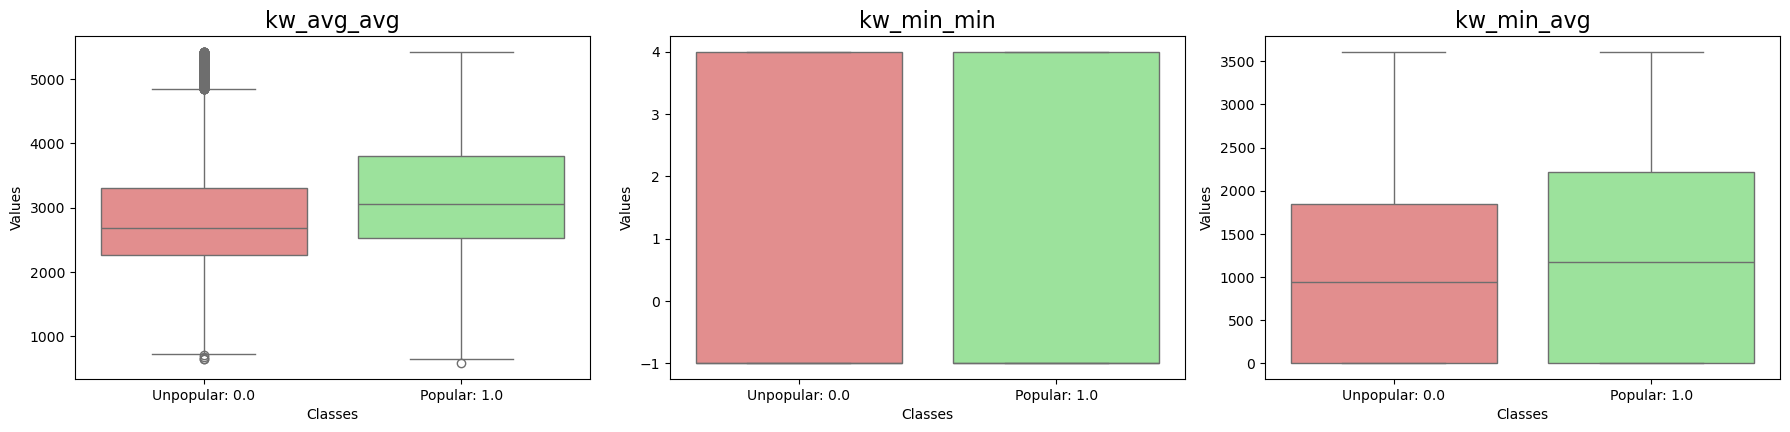

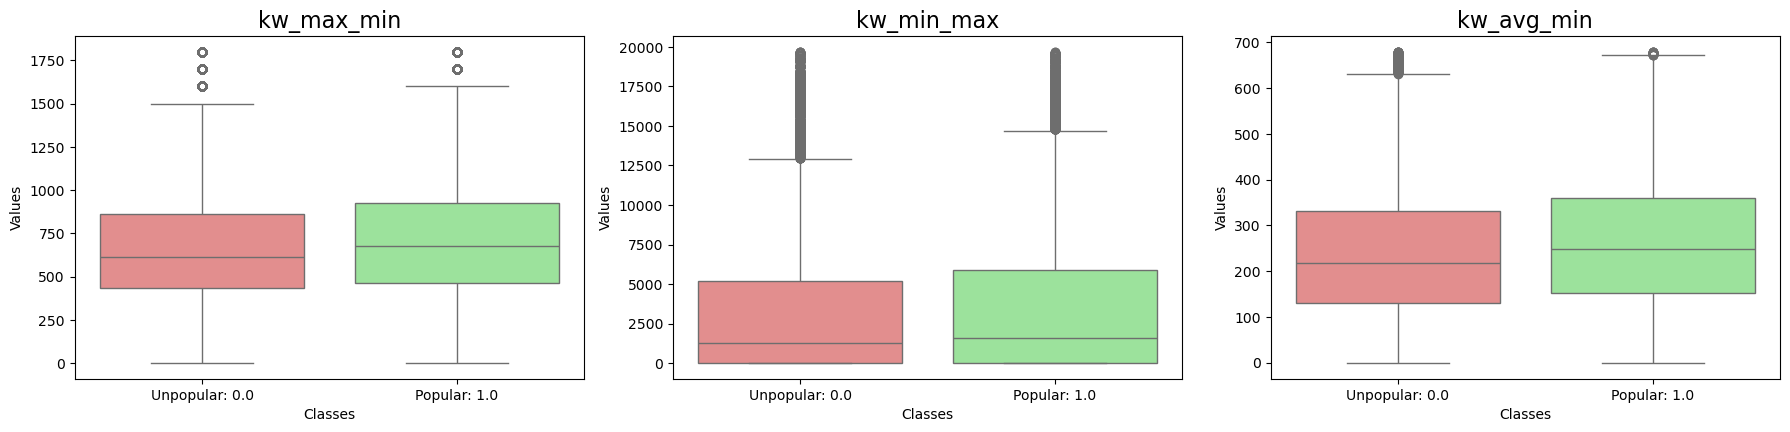

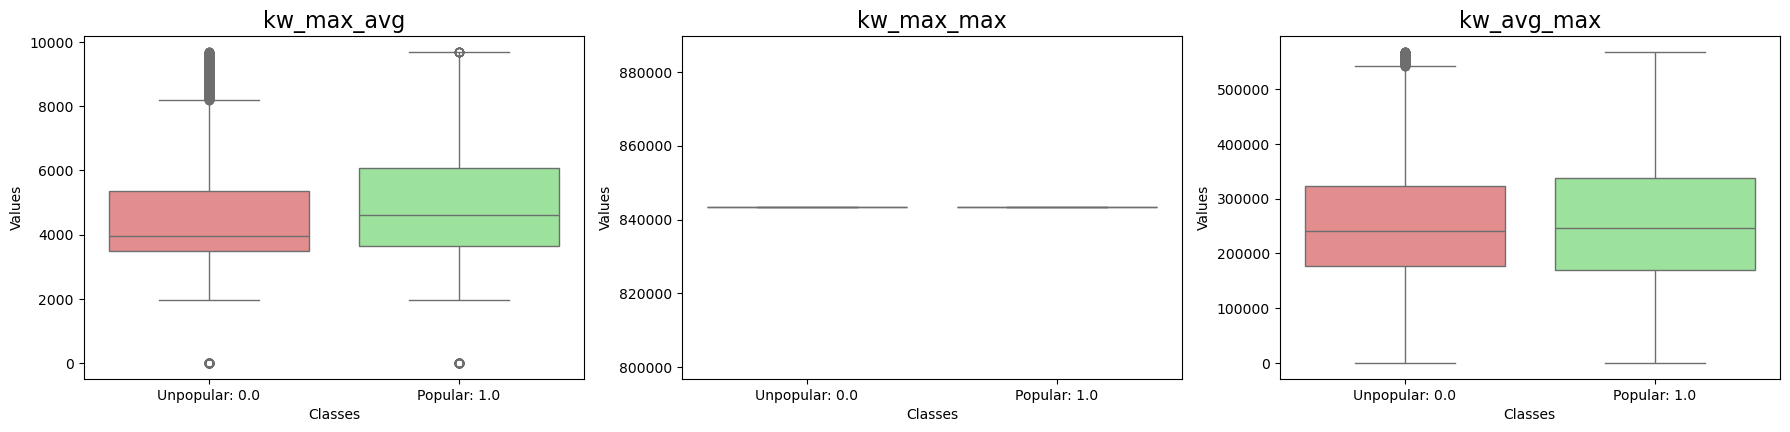

In [53]:
boxplot_by_class(pd.concat([data_treated[keywords_con], data['shares_c']], axis=1))

**Upon analysis, it's evident that both 'kw_min_min' and 'kw_max_max' features do not significantly contribute to our predictive model. Hence, we've made the decision to drop these features from our dataset.**

In [54]:
## updating columns to drop

cols_to_drop.append('kw_min_min')
cols_to_drop.append('kw_max_max')

**Checking for correlation and multicolinearity.**

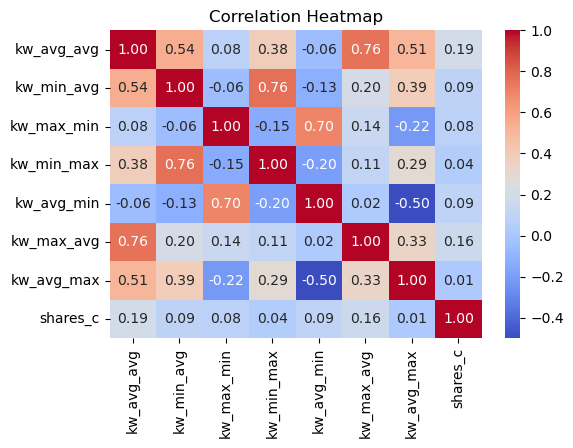

In [55]:
plot_corr_heatmap(pd.concat([data_treated[[elem for elem in keywords_con if elem not in ['kw_min_min','kw_max_max']]], 
                             data[['shares_c']]], axis=1))

**Examining the correlations, 'kw_avg_avg' demonstrates substantial associations, notably with 'kw_avg_max', 'kw_max_avg', and 'kw_min_avg', all displaying correlations above 0.5. After careful assessment, we've chosen to retain 'kw_avg_avg' due to its discerning capabilities in classifying the target variable. Additionally, recognizing the correlation between 'kw_max_min' and 'kw_avg_min', we've decided to remove 'kw_max_min' from the feature set.**

In [56]:
## updating columns to drop

cols_to_drop.append('kw_avg_max')
cols_to_drop.append('kw_max_avg')
cols_to_drop.append('kw_min_avg')
cols_to_drop.append('kw_max_min')

## 5. CHANNELS

In [57]:
#Looking at the basic statistics 
data[channels].describe(percentiles=[0.1,0.25,0.5,0.75,0.9]).transpose()

count      mean       std  min  10%  25%  \
data_channel_is_lifestyle      39643.0  0.052948  0.223932  0.0  0.0  0.0   
data_channel_is_entertainment  39643.0  0.177989  0.382508  0.0  0.0  0.0   
data_channel_is_bus            39643.0  0.157859  0.364613  0.0  0.0  0.0   
data_channel_is_socmed         39643.0  0.058598  0.234874  0.0  0.0  0.0   
data_channel_is_tech           39643.0  0.185304  0.388549  0.0  0.0  0.0   
data_channel_is_world          39643.0  0.212572  0.409133  0.0  0.0  0.0   

                               50%  75%  90%  max  
data_channel_is_lifestyle      0.0  0.0  0.0  1.0  
data_channel_is_entertainment  0.0  0.0  1.0  1.0  
data_channel_is_bus            0.0  0.0  1.0  1.0  
data_channel_is_socmed         0.0  0.0  0.0  1.0  
data_channel_is_tech           0.0  0.0  1.0  1.0  
data_channel_is_world          0.0  0.0  1.0  1.0

**These binary features consist of values exclusively set as 0 or 1. To gain insights, we'll assess their distribution concerning different classes and proceed with conducting a Chi-squared test to examine potential associations between these binary features and the respective classes.**

### 5.1 Discrete features

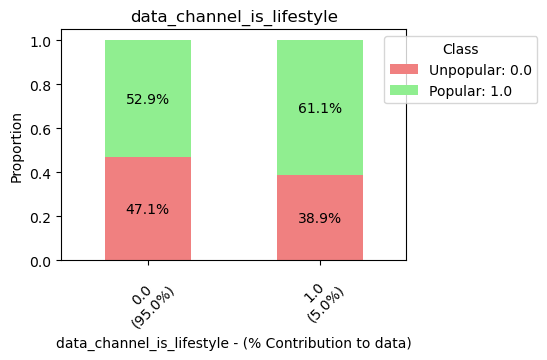

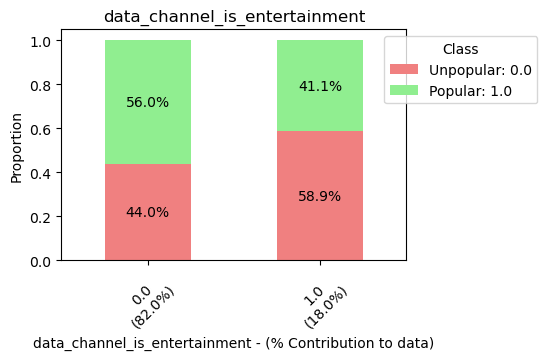

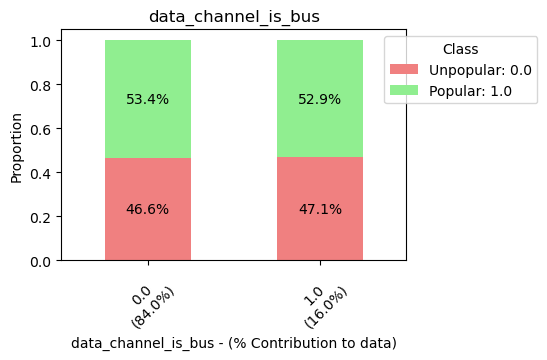

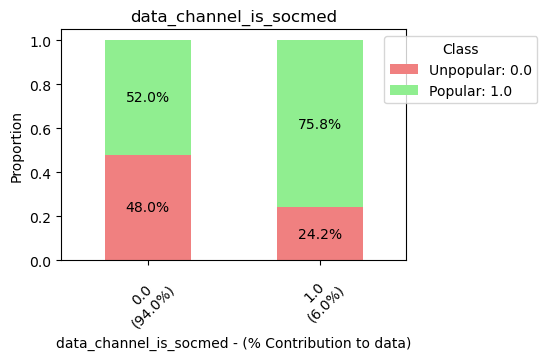

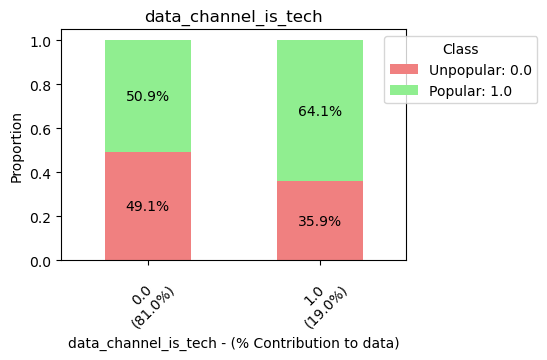

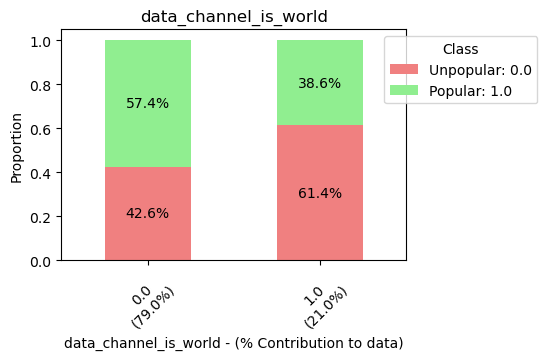

In [58]:
discrete_data_plot(data,channels, 6, 3)

**The features 'data_channel_is_entertainment,' 'data_channel_is_socmed,' 'data_channel_is_tech,' and 'data_channel_is_world' display noticeable variations in their distribution among different classes, implying potential relevance. Conversely, 'data_channel_is_bus' exhibits an almost identical distribution across classes, suggesting limited discriminatory power. To confirm its dispensability, we'll perform a chi-squared test to determine whether it's feasible to drop 'data_channel_is_bus' from our analysis.**

In [59]:
# checking for association between categorical variables
chi_squared_hypothesis_test(data, channels, 'shares_c')

**Upon conducting chi-squared tests, all features except 'data_channel_is_bus' exhibited a significant association with the target class, rejecting the Null Hypothesis. Consequently, we've decided to proceed by dropping the 'data_channel_is_bus' feature due to its lack of significant association with the target variable.**

In [60]:
# dropping data_channel_is_bus

cols_to_drop.append('data_channel_is_bus')

In [61]:
# making sure that there is no multi-colinearity due to all values being 1 
data[[elem for elem in channels if elem not in ['data_channel_is_bus']]].sum(axis=1).value_counts()

1.0    27251
0.0    12392
dtype: int64

## 6. PUBLICATION DAY

In [62]:
#Looking at the basic statistics 
data[day].describe(percentiles=[0.1,0.25,0.5,0.75,0.9]).transpose()

count      mean       std  min  10%  25%  50%  75%  \
weekday_is_monday     39643.0  0.168025  0.373893  0.0  0.0  0.0  0.0  0.0   
weekday_is_tuesday    39643.0  0.186389  0.389425  0.0  0.0  0.0  0.0  0.0   
weekday_is_wednesday  39643.0  0.187549  0.390356  0.0  0.0  0.0  0.0  0.0   
weekday_is_thursday   39643.0  0.183311  0.386926  0.0  0.0  0.0  0.0  0.0   
weekday_is_friday     39643.0  0.143808  0.350900  0.0  0.0  0.0  0.0  0.0   
weekday_is_saturday   39643.0  0.061877  0.240936  0.0  0.0  0.0  0.0  0.0   
weekday_is_sunday     39643.0  0.069041  0.253527  0.0  0.0  0.0  0.0  0.0   
is_weekend            39643.0  0.130918  0.337315  0.0  0.0  0.0  0.0  0.0   

                      90%  max  
weekday_is_monday     1.0  1.0  
weekday_is_tuesday    1.0  1.0  
weekday_is_wednesday  1.0  1.0  
weekday_is_thursday   1.0  1.0  
weekday_is_friday     1.0  1.0  
weekday_is_saturday   0.0  1.0  
weekday_is_sunday     0.0  1.0  
is_weekend            1.0  1.0

**Cognizant that all these features are binary, we aim to assess their distributions. Additionally, there's a possibility of redundancy among the features, such as 'weekday_is_saturday' and 'weekday_is_sunday', which could display high correlation with the 'is_weekend' feature. Our initial step involves creating a heatmap to visualize the correlation between these binary features, enabling us to identify potential redundancies and understand their interrelationships more comprehensively.**

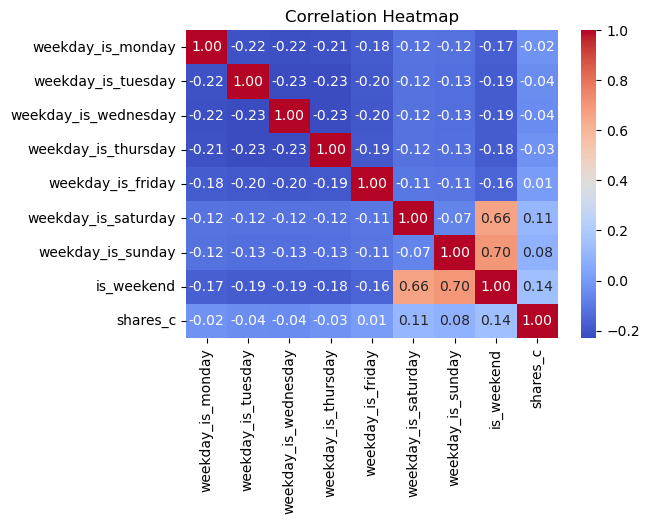

In [63]:
plot_corr_heatmap(pd.concat([data[day], data[['shares_c']]], axis=1))

**As anticipated, the analysis reveals the presence of multicollinearity among the features. In addressing this, we opt to remove 'weekday_is_saturday' and 'weekday_is_sunday' from our dataset, given their redundancy in relation to 'is_weekend'. We prioritize retaining 'is_weekend' due to its stronger correlation with the target variable 'shares_c'. This strategic decision aims to streamline our feature set and preserve the more influential variable for our analysis.**

In [64]:
cols_to_drop.append('weekday_is_saturday')
cols_to_drop.append('weekday_is_sunday')

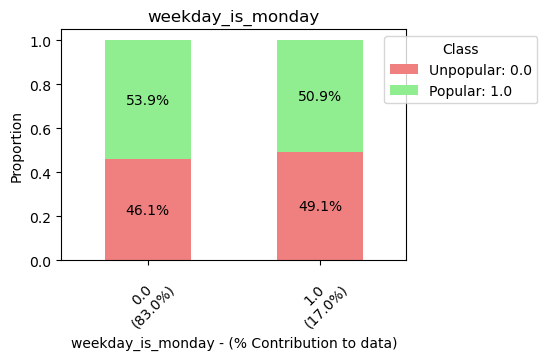

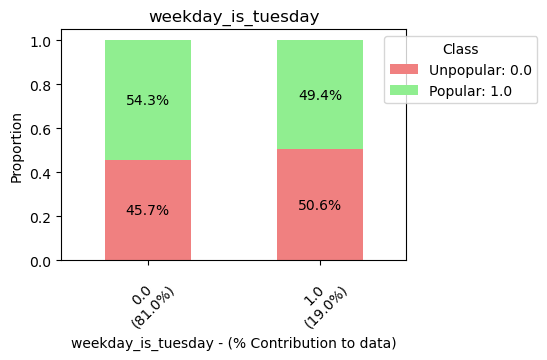

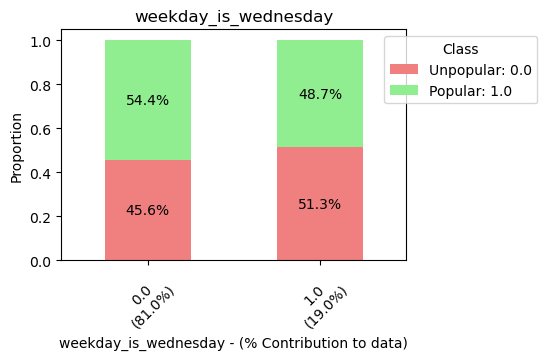

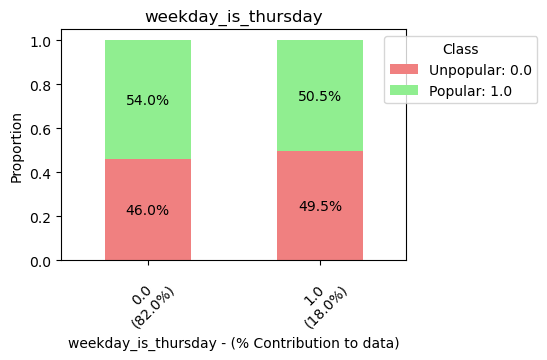

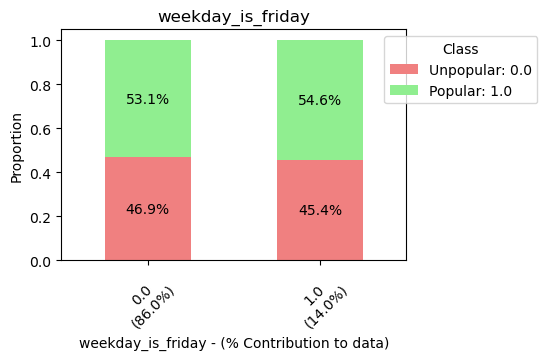

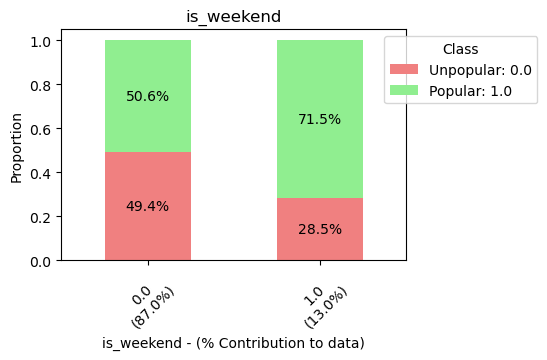

In [65]:
discrete_data_plot(data,
                   [elem for elem in day if elem not in ['weekday_is_saturday','weekday_is_sunday']],
                   6, 3)

**The 'is_weekend' feature emerges as a valuable indicator, indicating that news articles published during weekends exhibit a higher probability of achieving popularity. This insight underscores the significance of publication timing, suggesting a notable association between weekend publication and increased audience engagement or article virality.**

In [66]:
# checking for association between categorical variables
chi_squared_hypothesis_test(data, 
                            [elem for elem in day if elem not in ['weekday_is_saturday','weekday_is_sunday']], 
                            'shares_c')

In [67]:
# making sure that there is no multi-colinearity due to all values being 1 
data[[elem for elem in day if elem not in ['weekday_is_saturday','weekday_is_sunday']]].sum(axis=1).value_counts()

1.0    39643
dtype: int64

**In the context of our analysis, when examining the remaining features associated with the publication day, we've observed that their cumulative sum equals 1. This signifies a case of multicollinearity, where these features are linearly dependent. To address this issue, we need to mitigate multicollinearity by eliminating one feature from the remaining set of features related to the publication day. This action helps ensure the independence of variables, thereby enhancing the stability and interpretability of our model. We've decided to drop the 'weekday_is_friday' feature from our analysis due to its minimal variance and relatively insignificant impact on the distribution across classes.**

In [68]:
cols_to_drop.append('weekday_is_friday')

## 6. NLP

## 6.1 NLP - LDA

In [69]:
#Looking at the basic statistics 
data[nlp_lda].describe(percentiles=[0.1,0.25,0.5,0.75,0.9]).transpose()

count      mean       std       min       10%       25%       50%  \
LDA_00  39643.0  0.184604  0.262976  0.018182  0.020774  0.025051  0.033387   
LDA_01  39643.0  0.141259  0.219709  0.018182  0.020265  0.025012  0.033345   
LDA_02  39643.0  0.216326  0.282147  0.018182  0.022223  0.028571  0.040004   
LDA_03  39643.0  0.223775  0.295192  0.018182  0.022222  0.028571  0.040001   
LDA_04  39643.0  0.234035  0.289185  0.018182  0.022244  0.028574  0.040727   

             75%       90%       max  
LDA_00  0.240968  0.687788  0.926994  
LDA_01  0.150838  0.501617  0.925947  
LDA_02  0.334223  0.743966  0.919999  
LDA_03  0.375785  0.796183  0.926534  
LDA_04  0.399988  0.762198  0.927191

**Upon reviewing the statistics for the LDA features, although they appear continuous, further examination revealed substantial skewness and notable outliers within the distribution. To address this, a strategic decision was made to engage in feature engineering. Our approach involved transforming these features into a discrete format, assigning each record to an LDA topic with the maximum probability. This process aims to enhance the feature's discriminatory power, anticipating more meaningful insights.**

In [70]:
# assigning topic with maximum probability
data_treated['LDA'] = data[nlp_lda].idxmax(axis=1)

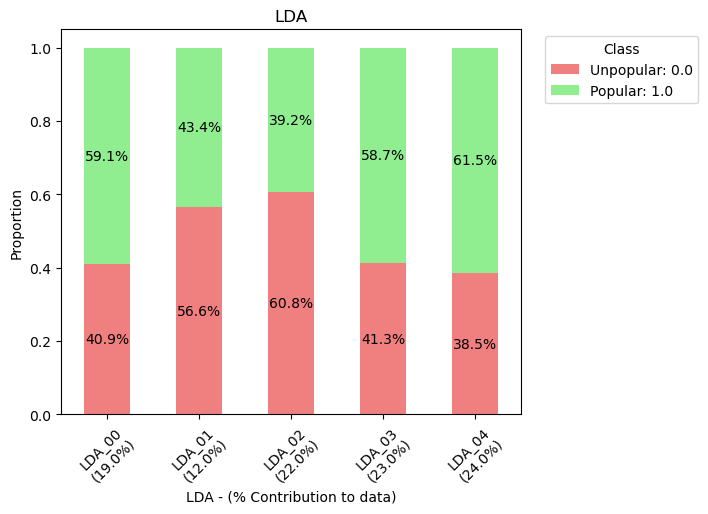

In [71]:
discrete_data_plot(pd.concat([data_treated['LDA'], data['shares_c']], axis=1),['LDA'], 8, 5)

In [72]:
chi_squared_hypothesis_test(pd.concat([data_treated['LDA'], data['shares_c']], axis=1),['LDA'], 'shares_c')

**The bar chart above vividly illustrates the impact of feature engineering on our LDA components. Notably, LDA_00, LDA_03, and LDA_04 exhibit an approximate 60% prevalence of 'Popular' articles, whereas LDA_01 and LDA_02 demonstrate a lower frequency, hovering around 40%. This shift reflects the potency of our feature engineering efforts, showcasing an evident distinction in the distribution of 'Popular' articles across the different LDA components.**

In [73]:
# adding LDA columns to drop list

cols_to_drop.append('LDA_00')
cols_to_drop.append('LDA_01')
cols_to_drop.append('LDA_02')
cols_to_drop.append('LDA_03')
cols_to_drop.append('LDA_04')

## 6.2 NLP - Subjectivity & Polarity

In [74]:
#Looking at the basic statistics 
data[nlp_sbpl].describe(percentiles=[0.1,0.25,0.5,0.75,0.9]).transpose()

count      mean       std      min       10%  \
global_subjectivity           39643.0  0.443381  0.116665  0.00000  0.331924   
global_sentiment_polarity     39643.0  0.119312  0.096930 -0.39375  0.000000   
title_subjectivity            39643.0  0.282360  0.324248  0.00000  0.000000   
title_sentiment_polarity      39643.0  0.071427  0.265453 -1.00000 -0.133333   
abs_title_subjectivity        39643.0  0.341851  0.188785  0.00000  0.045455   
abs_title_sentiment_polarity  39643.0  0.156068  0.226296  0.00000  0.000000   

                                   25%       50%       75%       90%       max  
global_subjectivity           0.396173  0.453458  0.508333  0.561667  1.000000  
global_sentiment_polarity     0.057762  0.119119  0.177835  0.236244  0.727841  
title_subjectivity            0.000000  0.150000  0.500000  0.800000  1.000000  
title_sentiment_polarity      0.000000  0.000000  0.150000  0.450000  1.000000  
abs_title_subjectivity        0.166667  0.500000  0.500000  0.500000  0.500000  
abs_title_sentiment_polarity  0.000000  0.000000  0.250000  0.500000  1.000000

### Continous features

**Checking distribution and outliers**

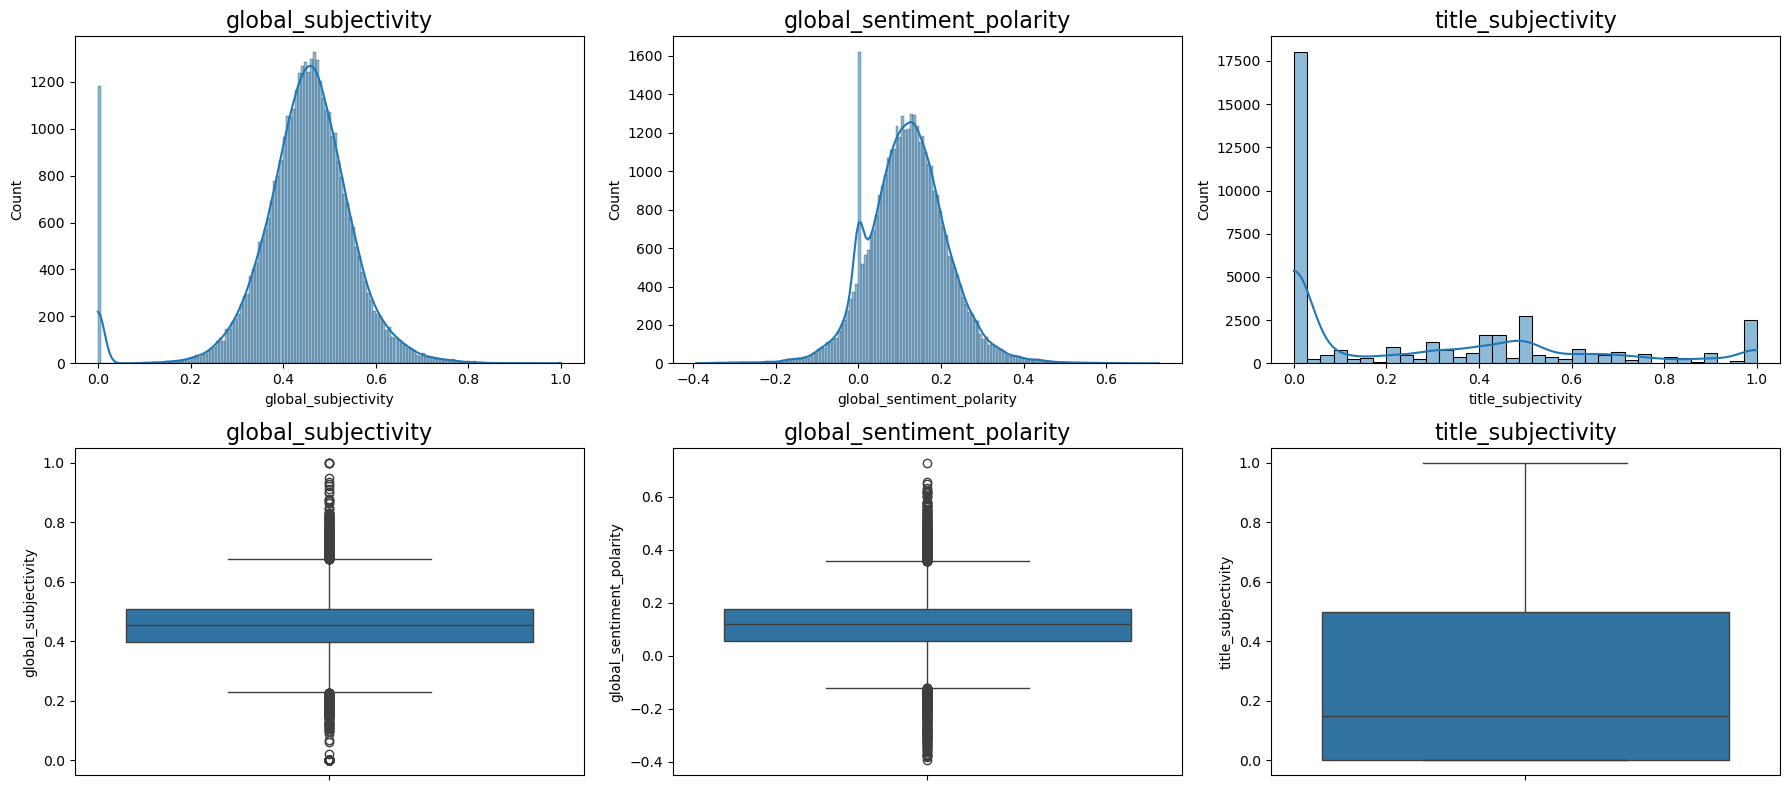

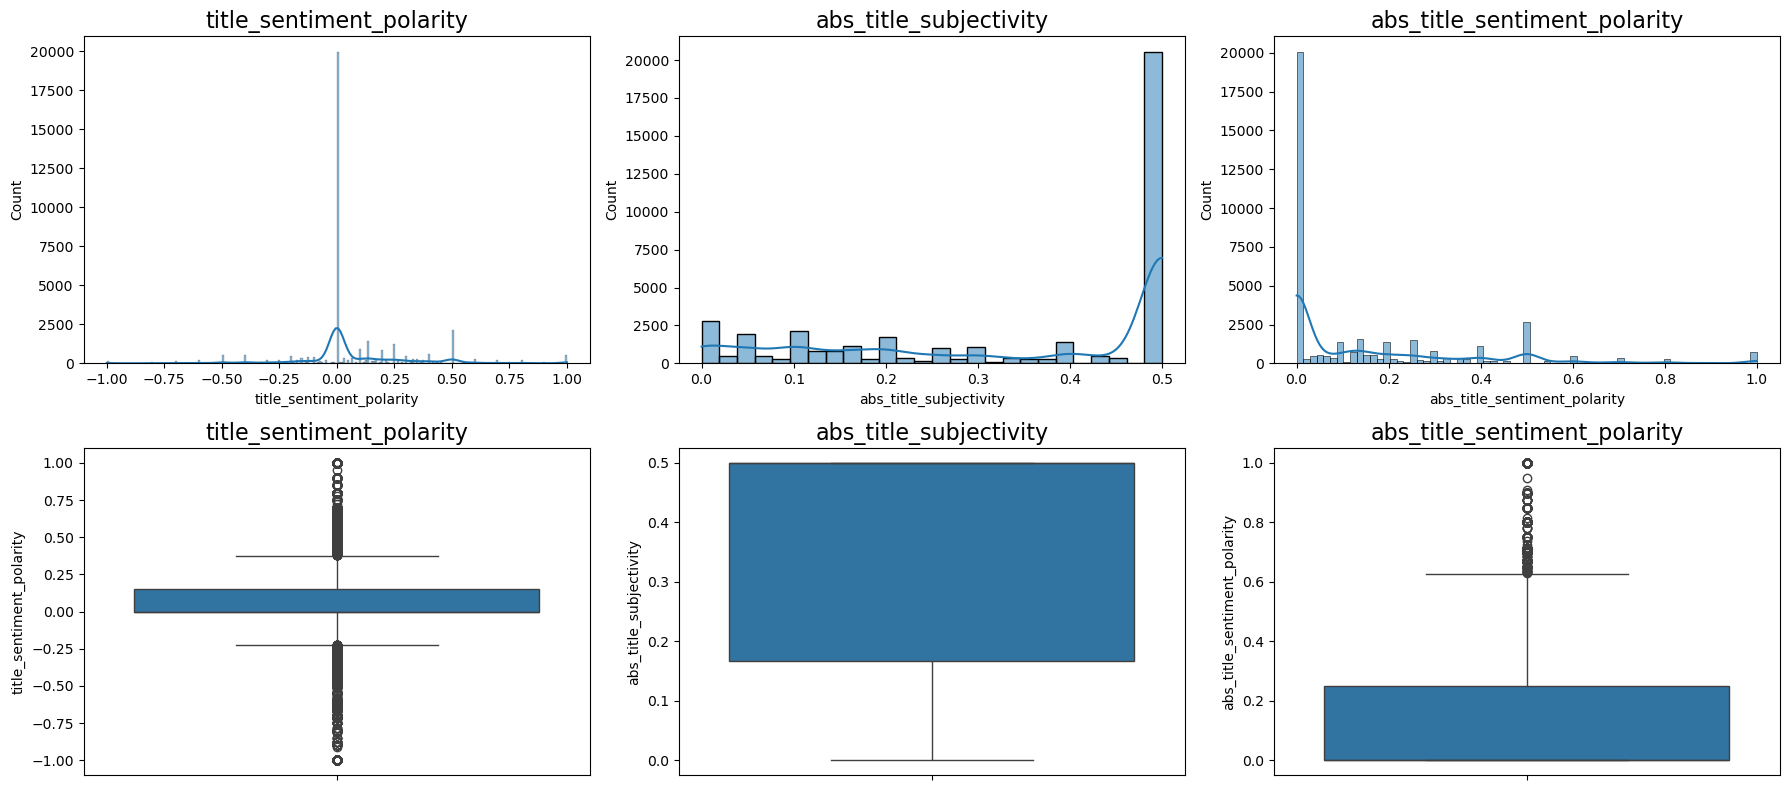

In [75]:
plot_histogram_boxplot(data[nlp_sbpl])

**Distribution of continuous variables for each class**

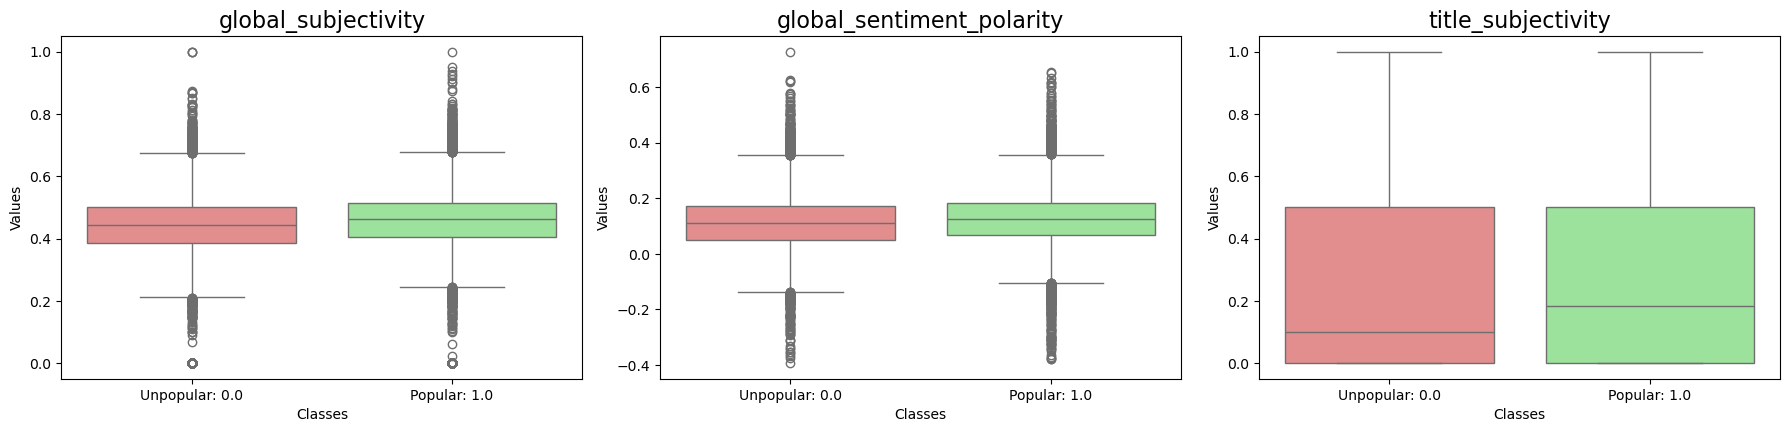

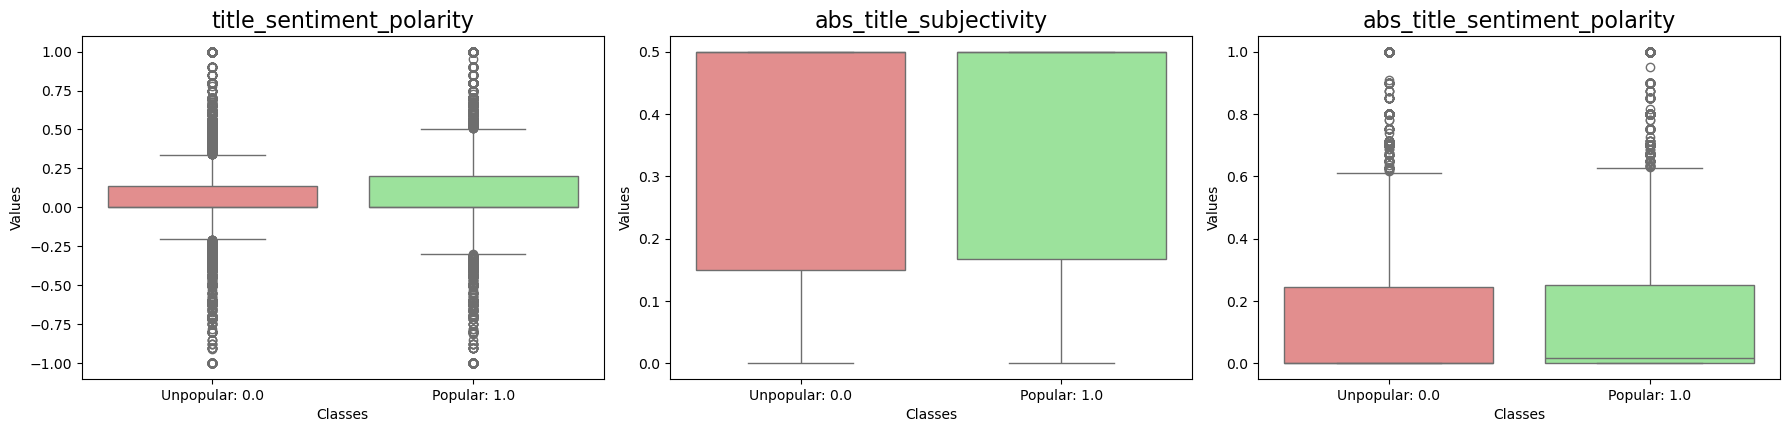

In [76]:
boxplot_by_class(data[nlp_sbpl+['shares_c']])

### After Outlier treatment

In [77]:
data_treated = treat_outliers_knn(data, nlp_sbpl, data_treated)

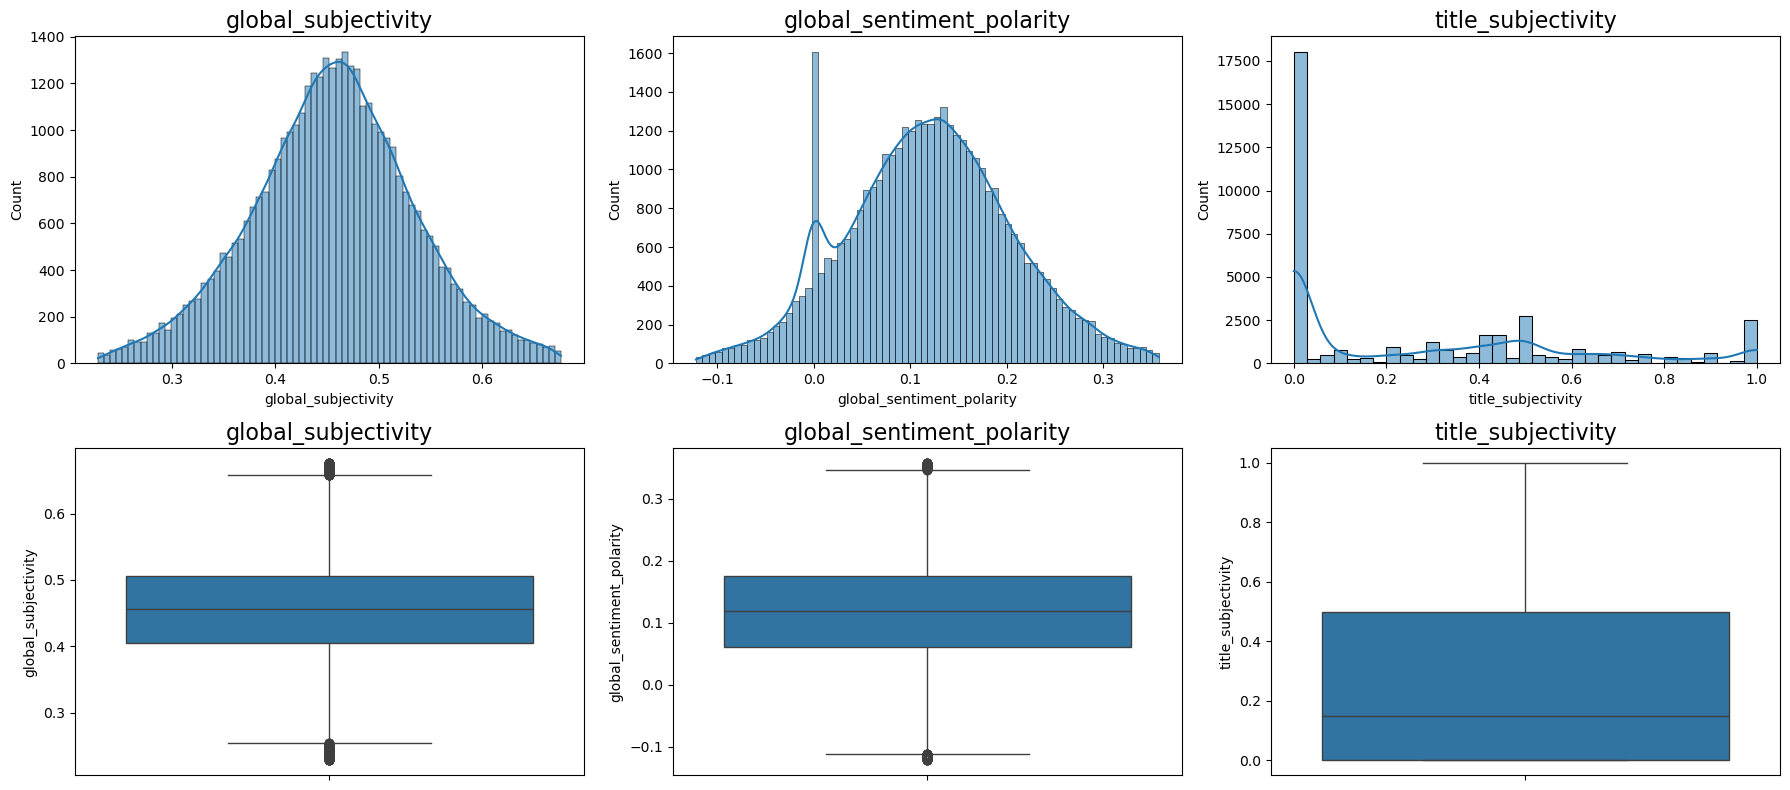

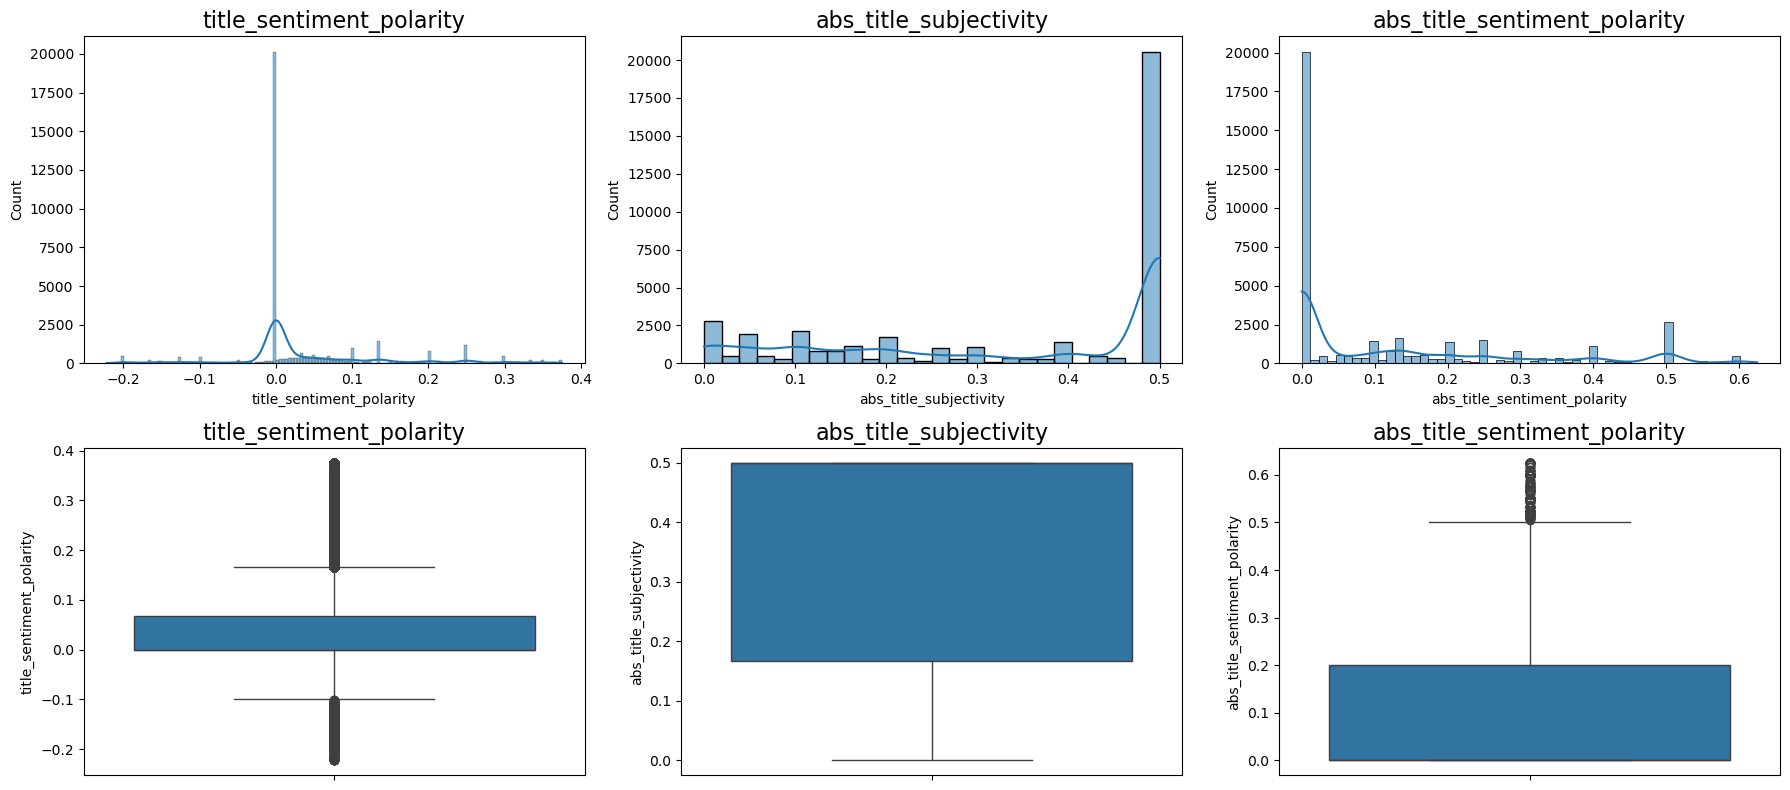

In [78]:
plot_histogram_boxplot(data_treated[nlp_sbpl])

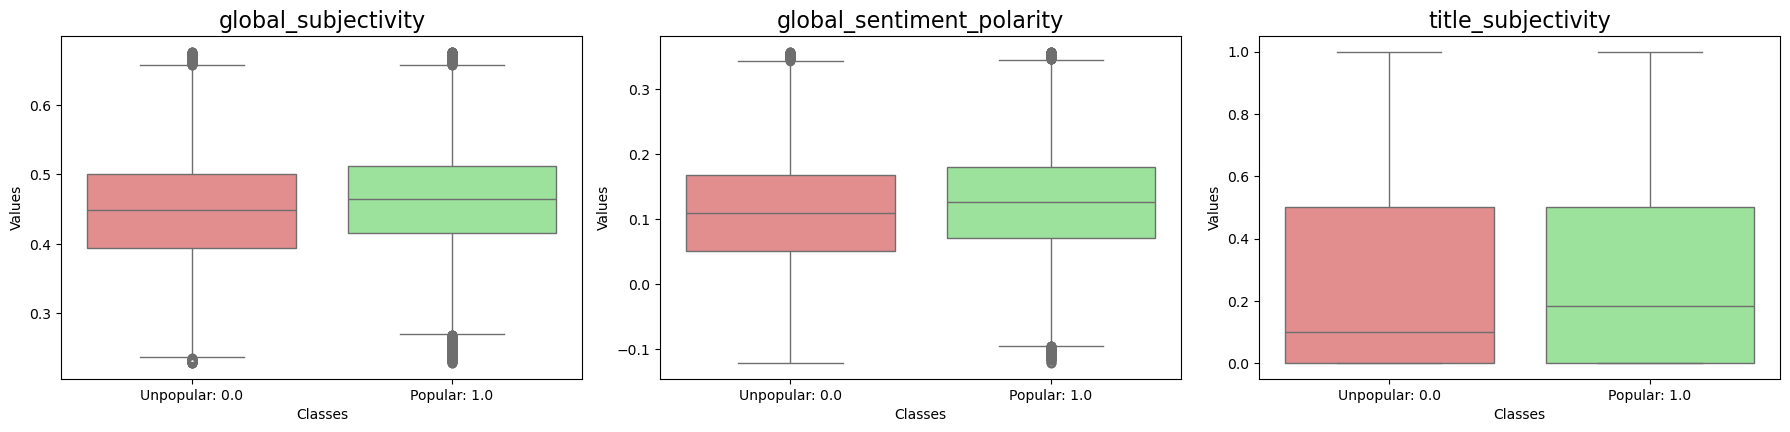

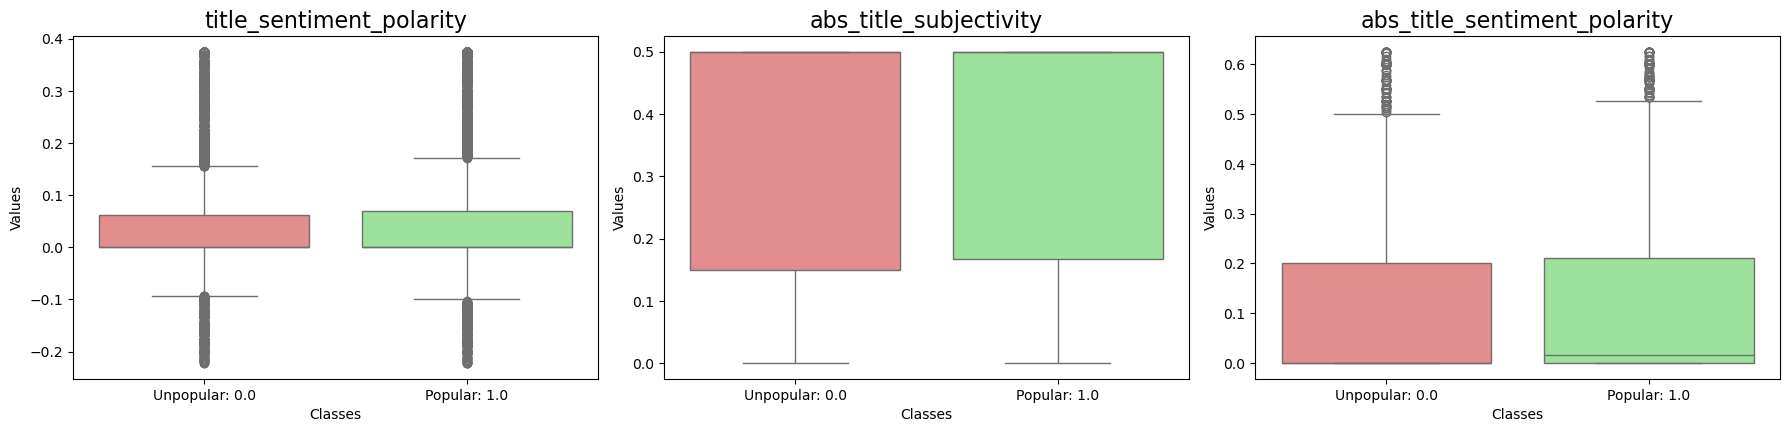

In [79]:
boxplot_by_class(pd.concat([data_treated[nlp_sbpl], data['shares_c']], axis=1))

**Checking for correlation and multicolinearity.**

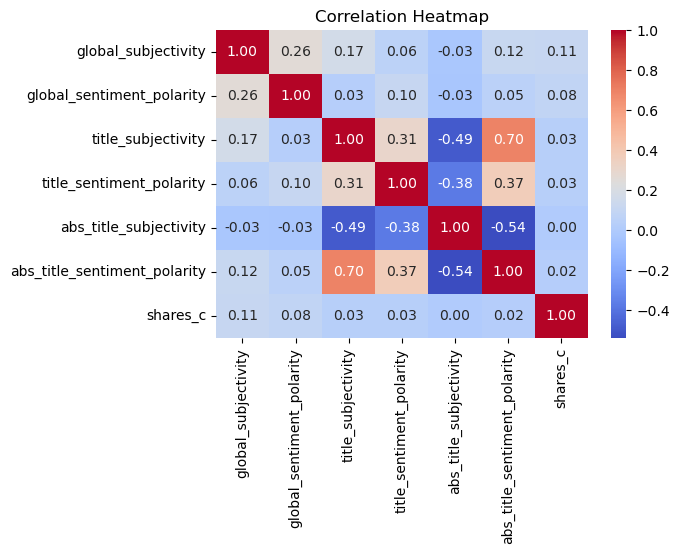

In [80]:
plot_corr_heatmap(pd.concat([data_treated[nlp_sbpl], data[['shares_c']]], axis=1))

**As we are aware that 'abs_title_subjectivity' and 'abs_title_sentiment_polarity' indicates the absolute value of 'title_subjectivity' and 'title_sentiment_polarity' respectively, it is intuitive that they would be correlated and which can also validate using the heatmap above. Now, the deciding factor is should we keep the absolute values or the normal vlaues, we decided to drop the absolute values as we can see that they have almost zero correlation with taarget 'shares_c' also while looking at box plot we can see that these features doesn't possess any significance.**

In [81]:
# adding columns to drop list

cols_to_drop.append('abs_title_subjectivity')
cols_to_drop.append('abs_title_sentiment_polarity')

## 6.3 NLP - Positive & Negative

In [82]:
#Looking at the basic statistics 
data[nlp_posneg].describe(percentiles=[0.1,0.25,0.5,0.75,0.9]).transpose()

count      mean       std  min       10%  \
global_rate_positive_words  39643.0  0.039626  0.017428  0.0  0.018940   
global_rate_negative_words  39643.0  0.016613  0.010828  0.0  0.004535   
rate_positive_words         39643.0  0.682167  0.190178  0.0  0.480000   
rate_negative_words         39643.0  0.287941  0.156151  0.0  0.095238   
avg_positive_polarity       39643.0  0.353834  0.104528  0.0  0.250000   
min_positive_polarity       39643.0  0.095448  0.071314  0.0  0.033333   
max_positive_polarity       39643.0  0.756747  0.247760  0.0  0.500000   
avg_negative_polarity       39643.0 -0.259531  0.127721 -1.0 -0.408333   
min_negative_polarity       39643.0 -0.521957  0.290281 -1.0 -1.000000   
max_negative_polarity       39643.0 -0.107503  0.095373 -1.0 -0.187500   

                                 25%       50%       75%       90%       max  
global_rate_positive_words  0.028388  0.039024  0.050279  0.061333  0.155488  
global_rate_negative_words  0.009615  0.015337  0.021739  0.029502  0.184932  
rate_positive_words         0.600000  0.710526  0.800000  0.878788  1.000000  
rate_negative_words         0.185185  0.280000  0.384615  0.500000  1.000000  
avg_positive_polarity       0.306249  0.358760  0.411428  0.464732  1.000000  
min_positive_polarity       0.050000  0.100000  0.100000  0.160000  1.000000  
max_positive_polarity       0.600000  0.800000  1.000000  1.000000  1.000000  
avg_negative_polarity      -0.328384 -0.253333 -0.186905 -0.123852  0.000000  
min_negative_polarity      -0.700000 -0.500000 -0.300000 -0.150000  0.000000  
max_negative_polarity      -0.125000 -0.100000 -0.050000 -0.050000  0.000000

### Continous features

**Checking distribution and outliers**

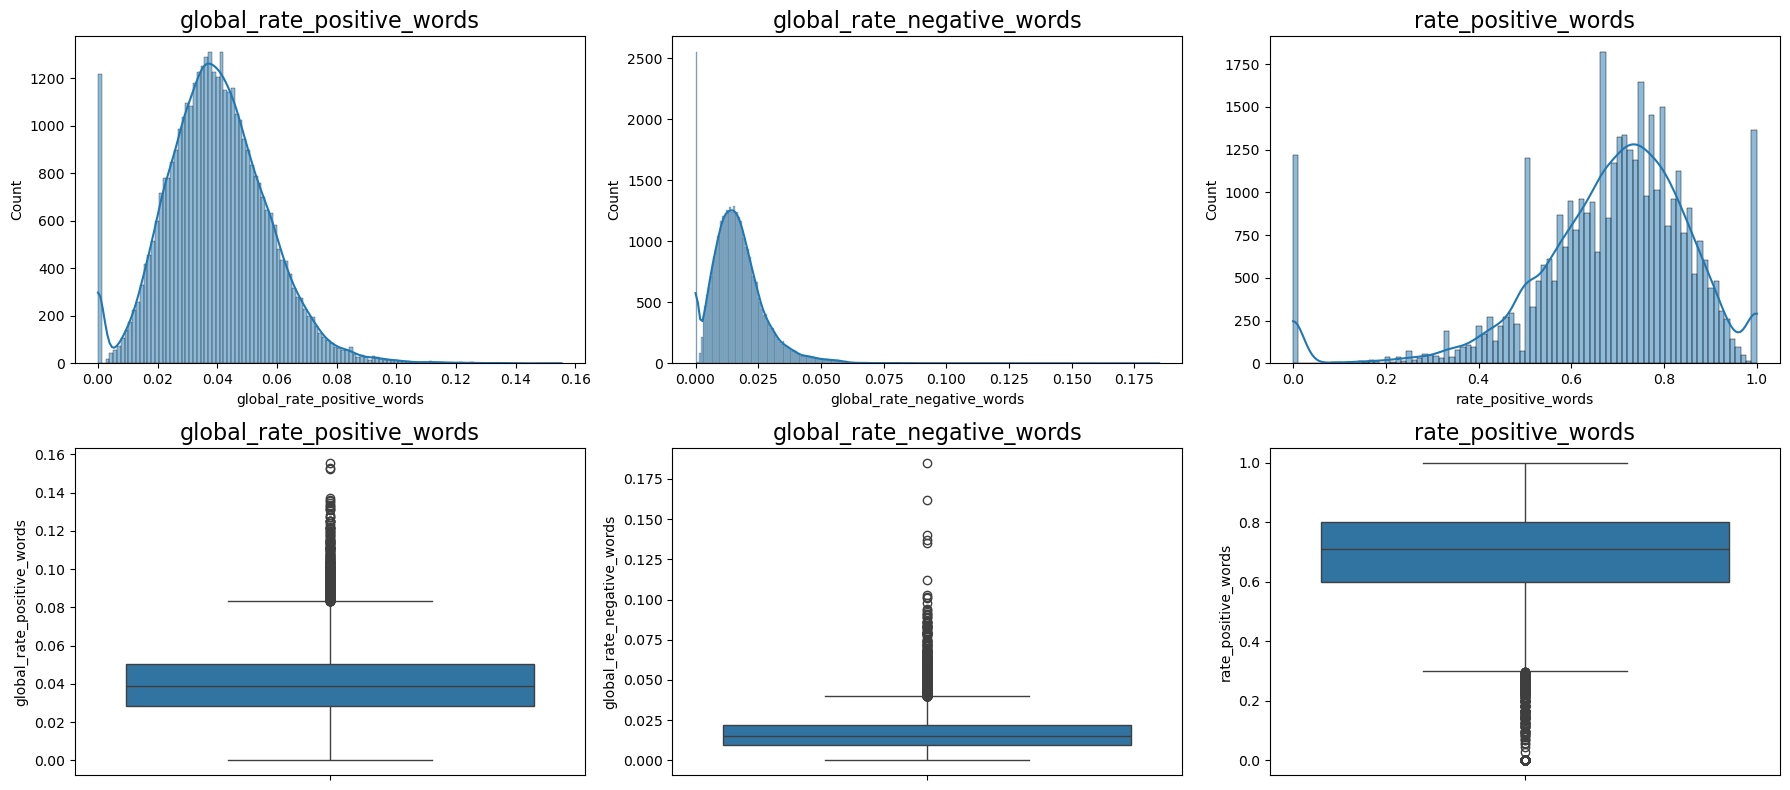

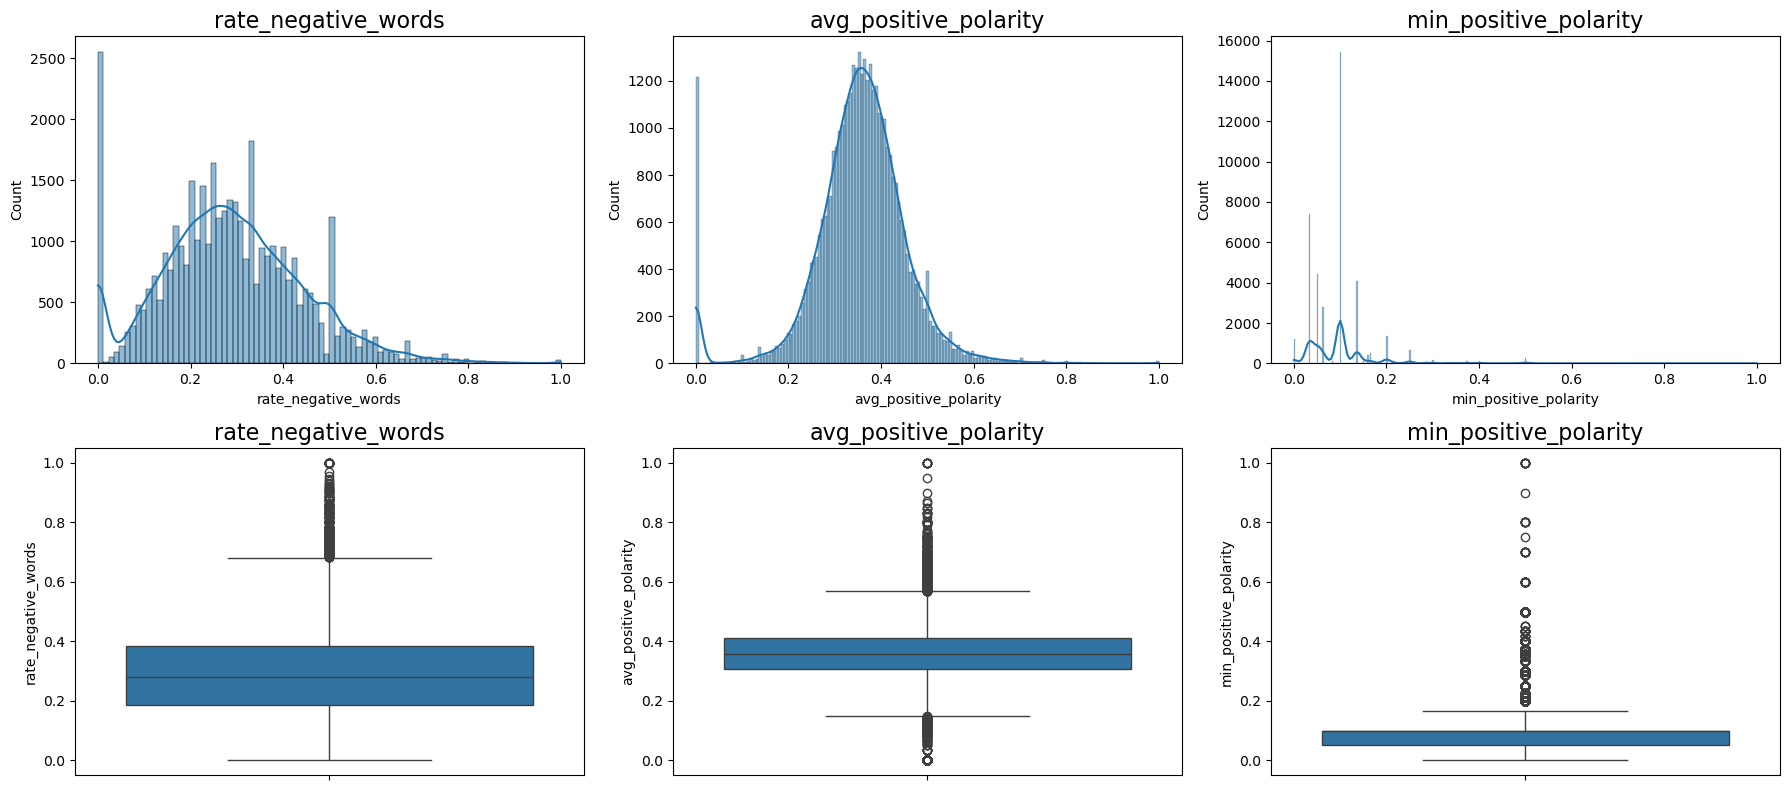

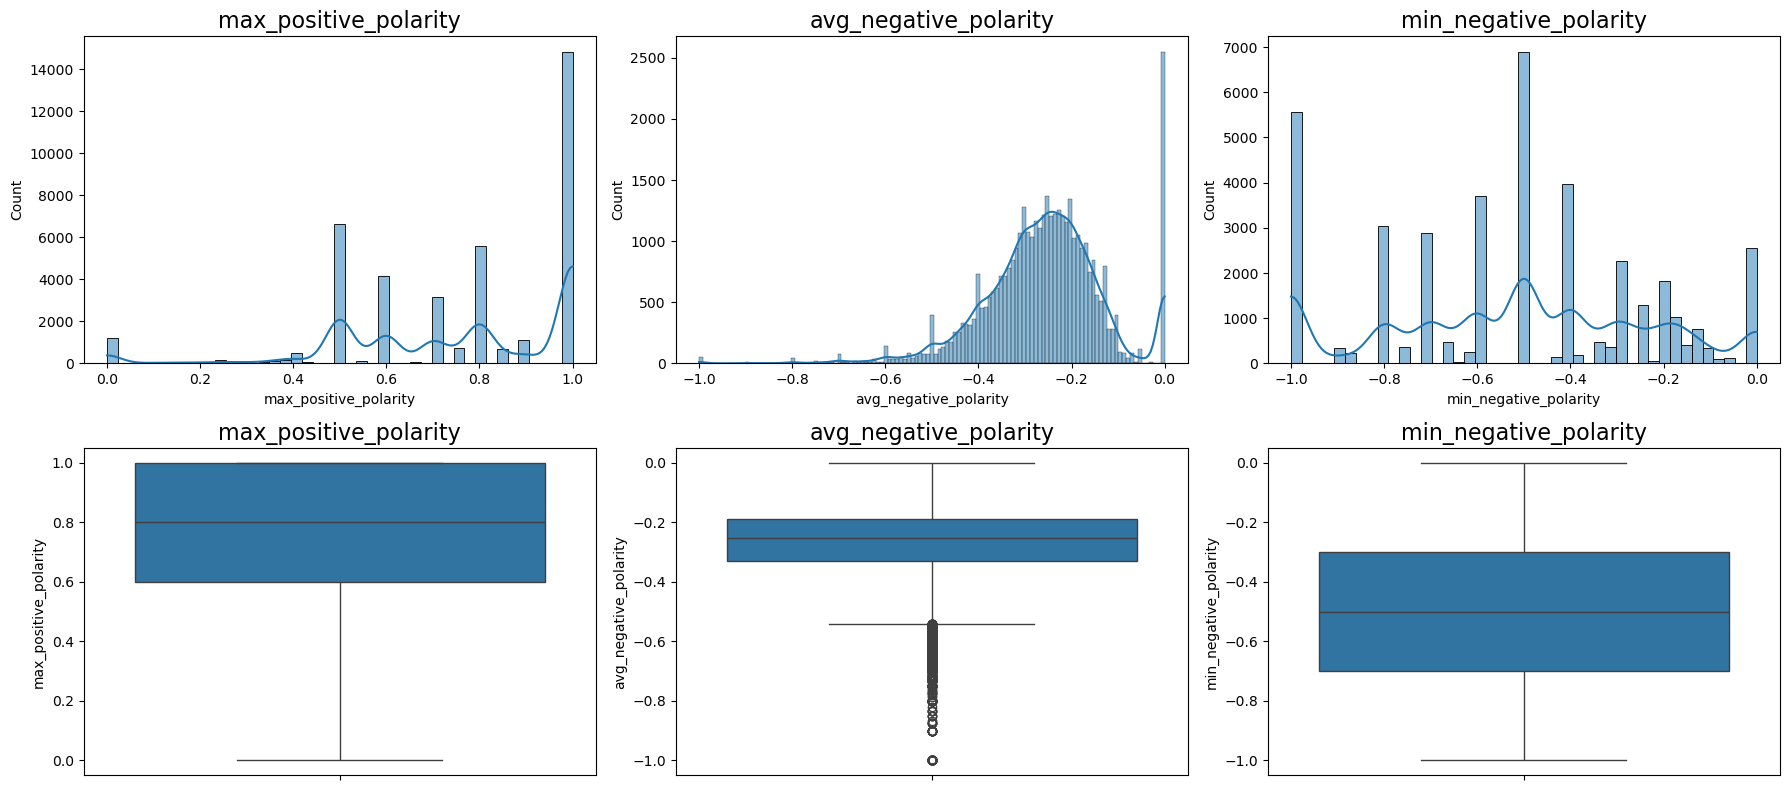

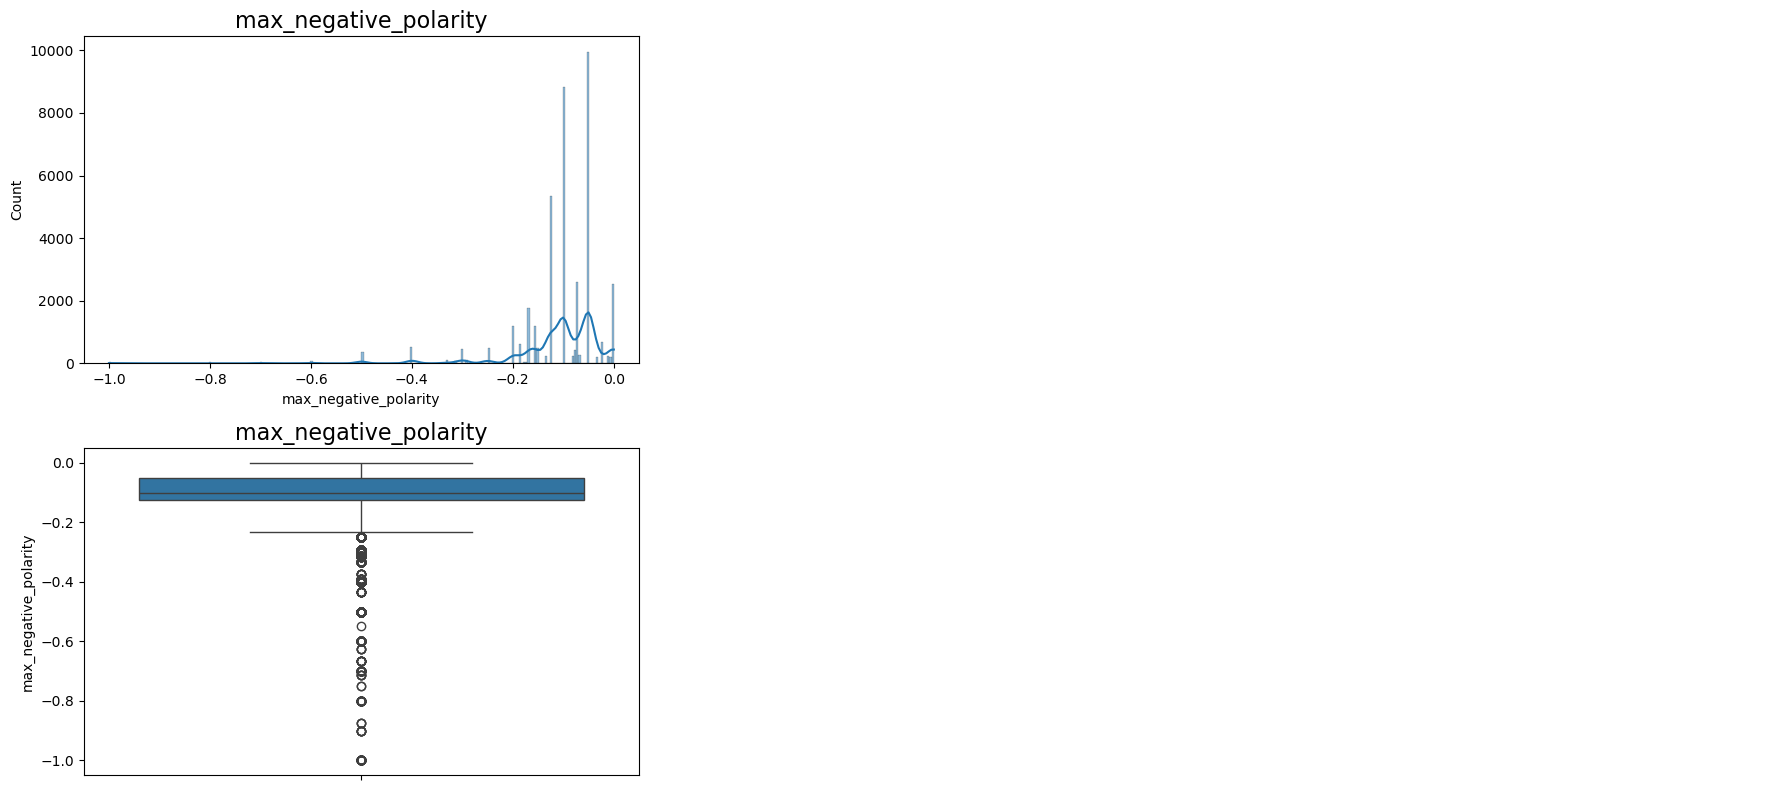

In [83]:
plot_histogram_boxplot(data[nlp_posneg])

**Distribution of continuous variables for each class**

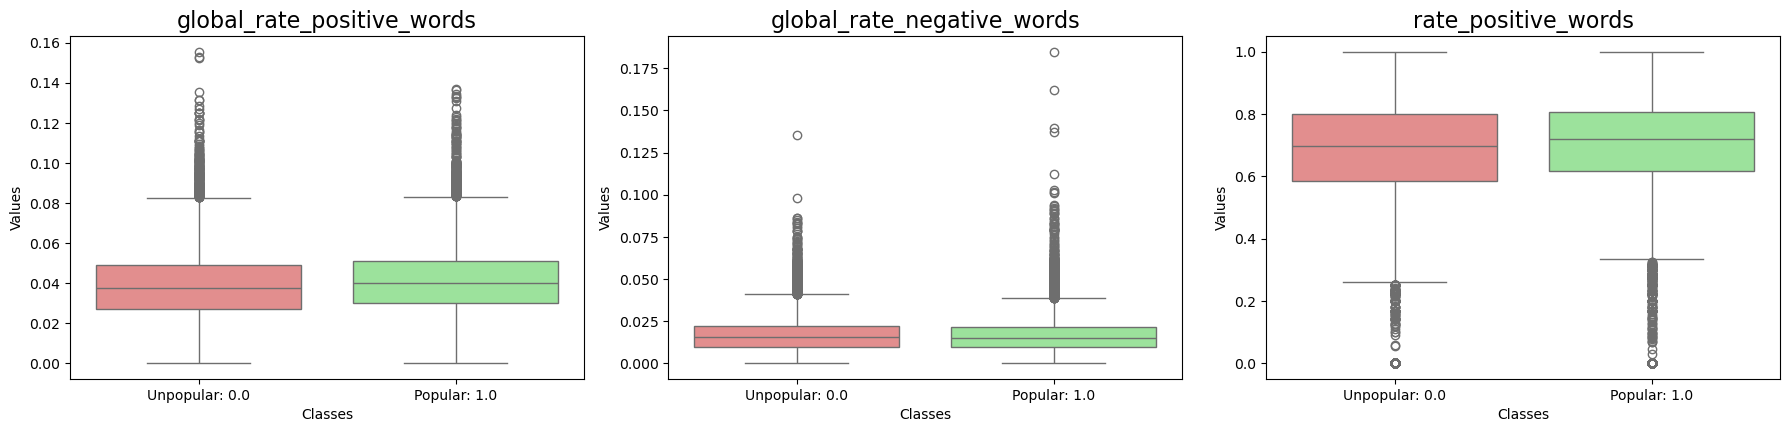

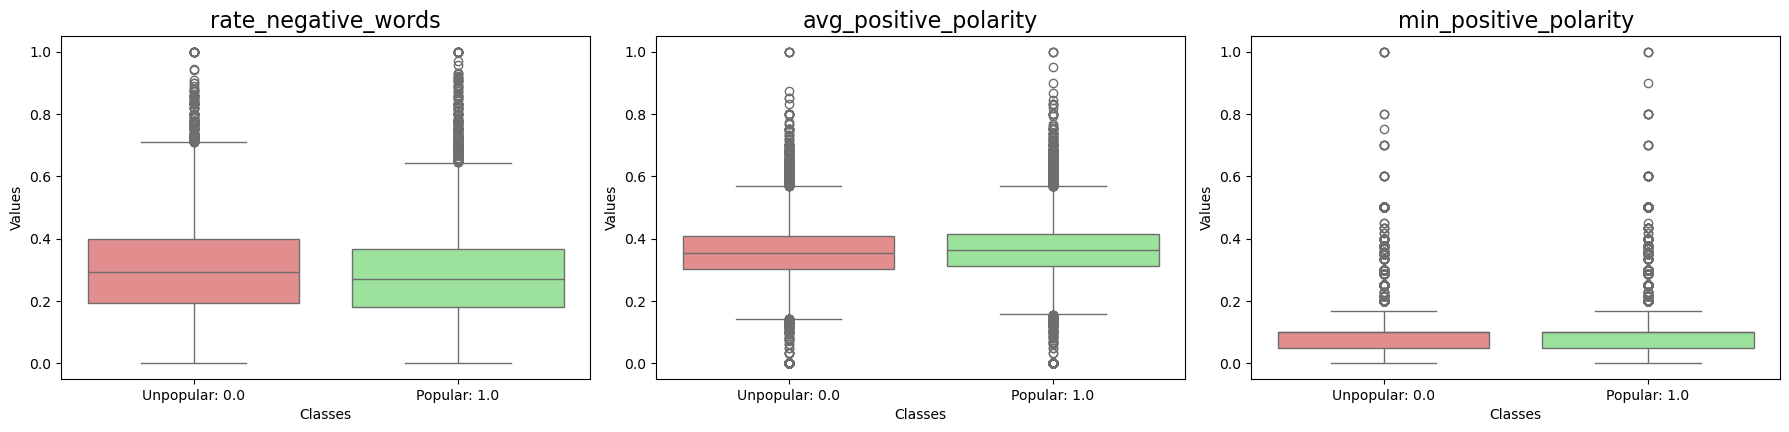

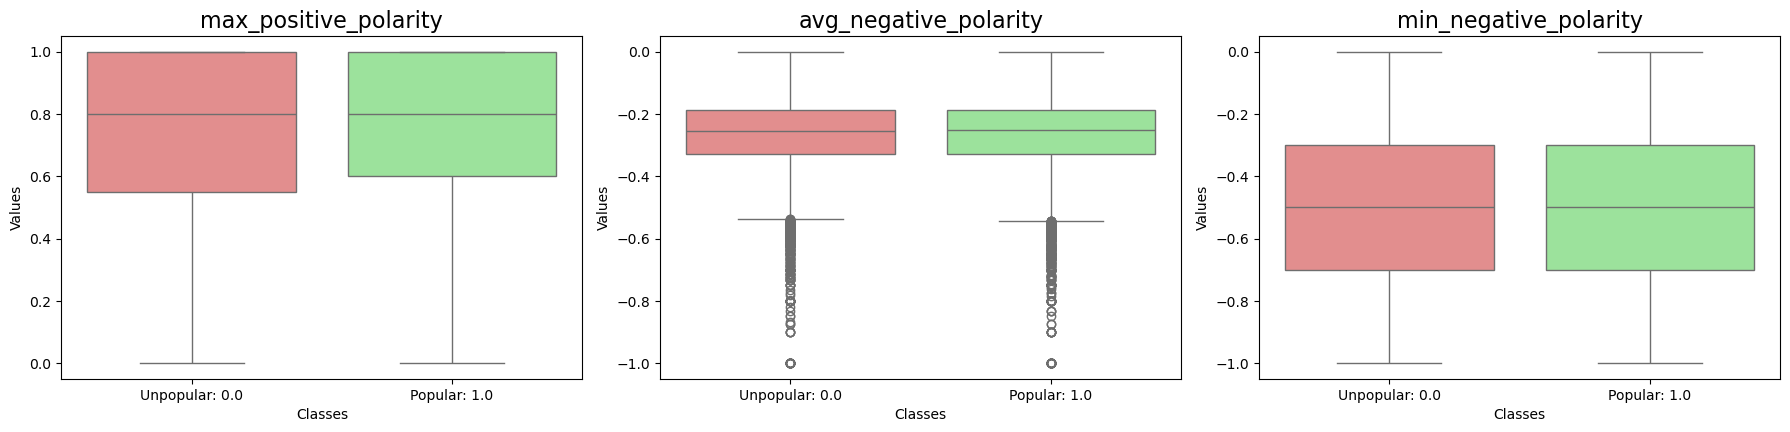

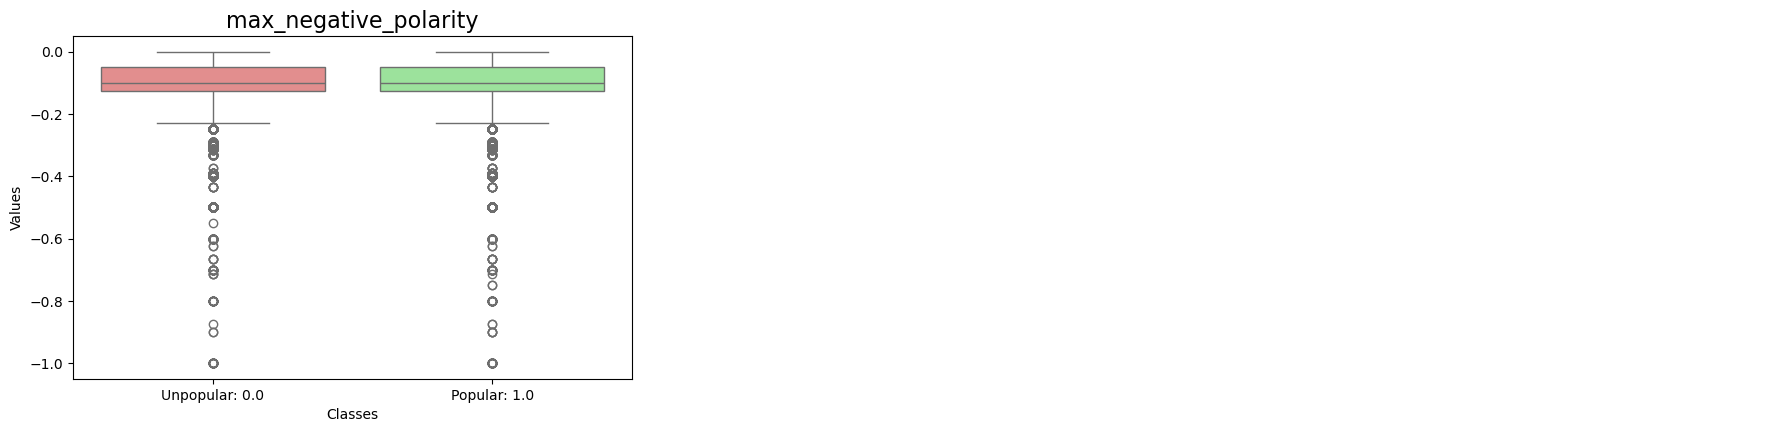

In [84]:
boxplot_by_class(data[nlp_posneg+['shares_c']])

### After Outlier treatment

In [85]:
data_treated = treat_outliers_knn(data, nlp_posneg, data_treated)

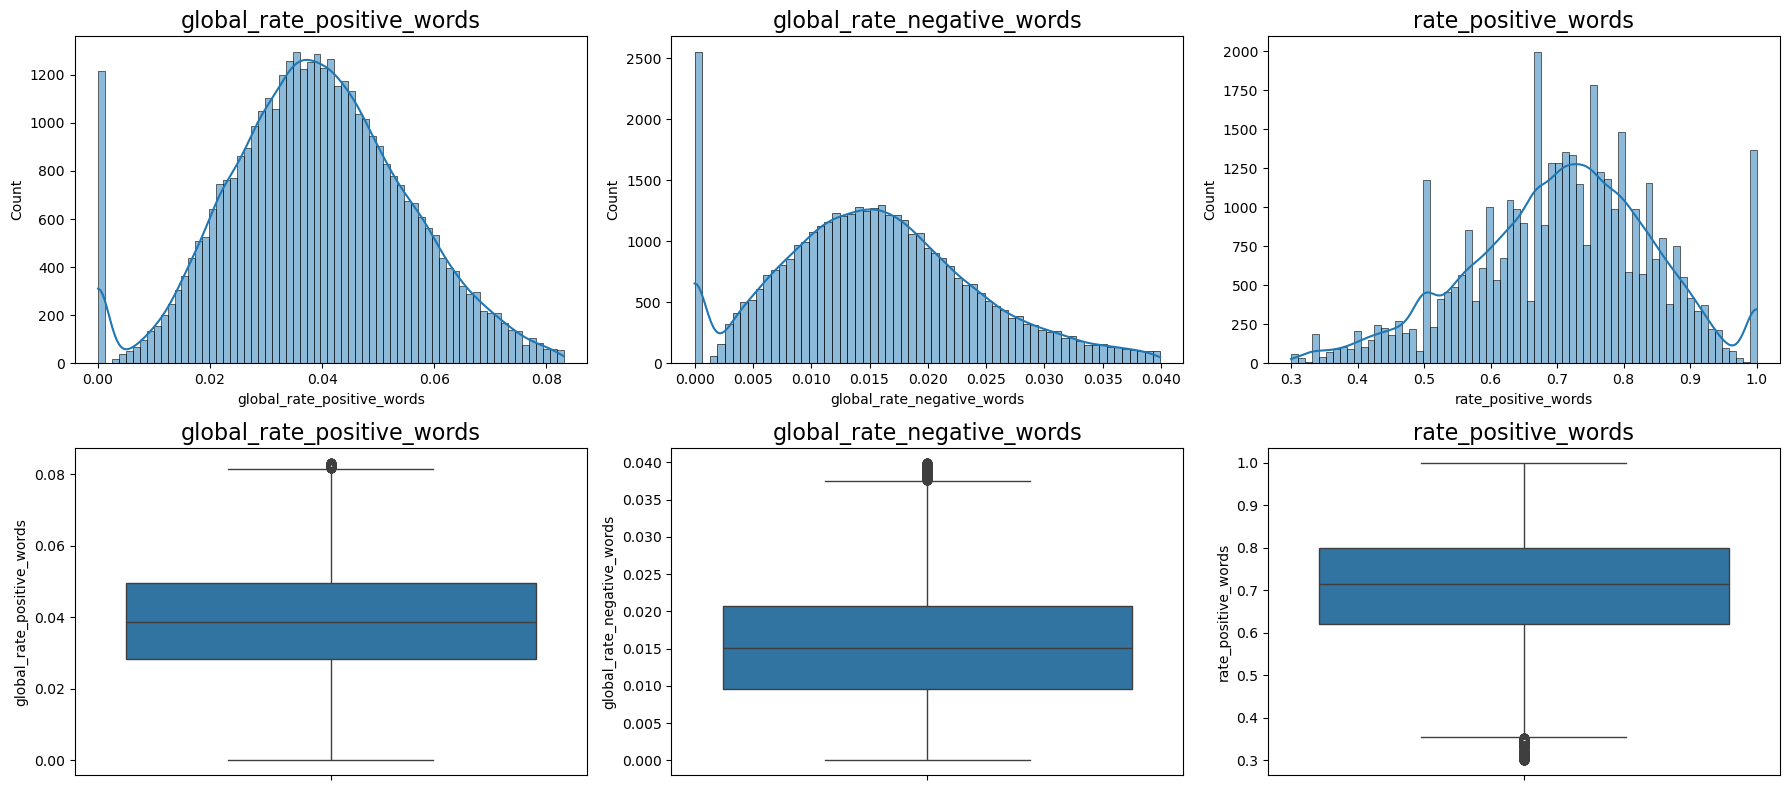

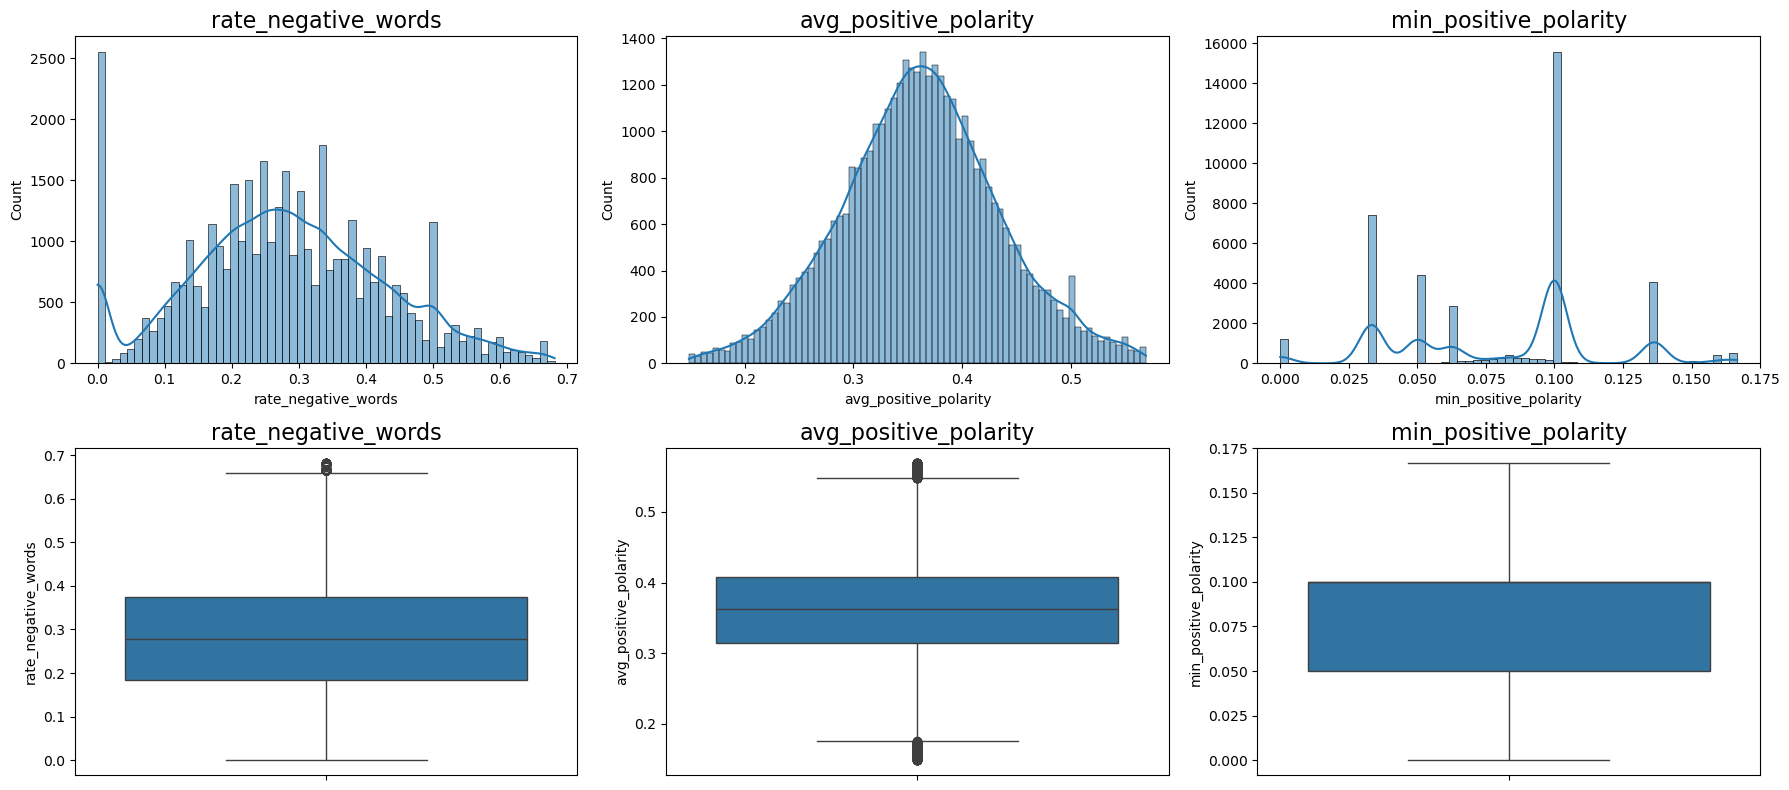

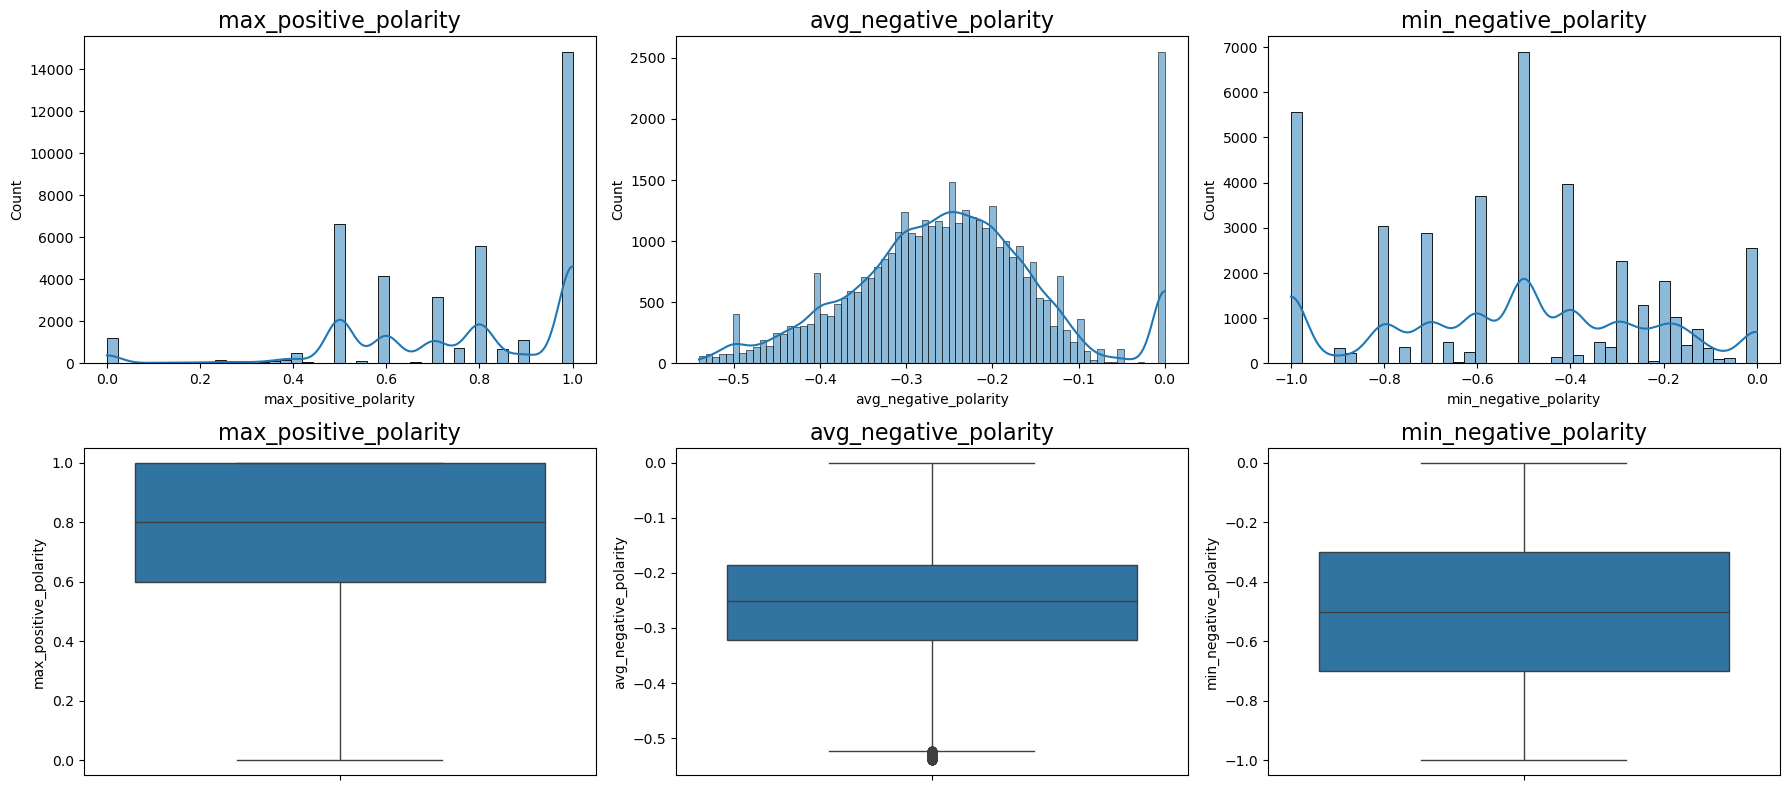

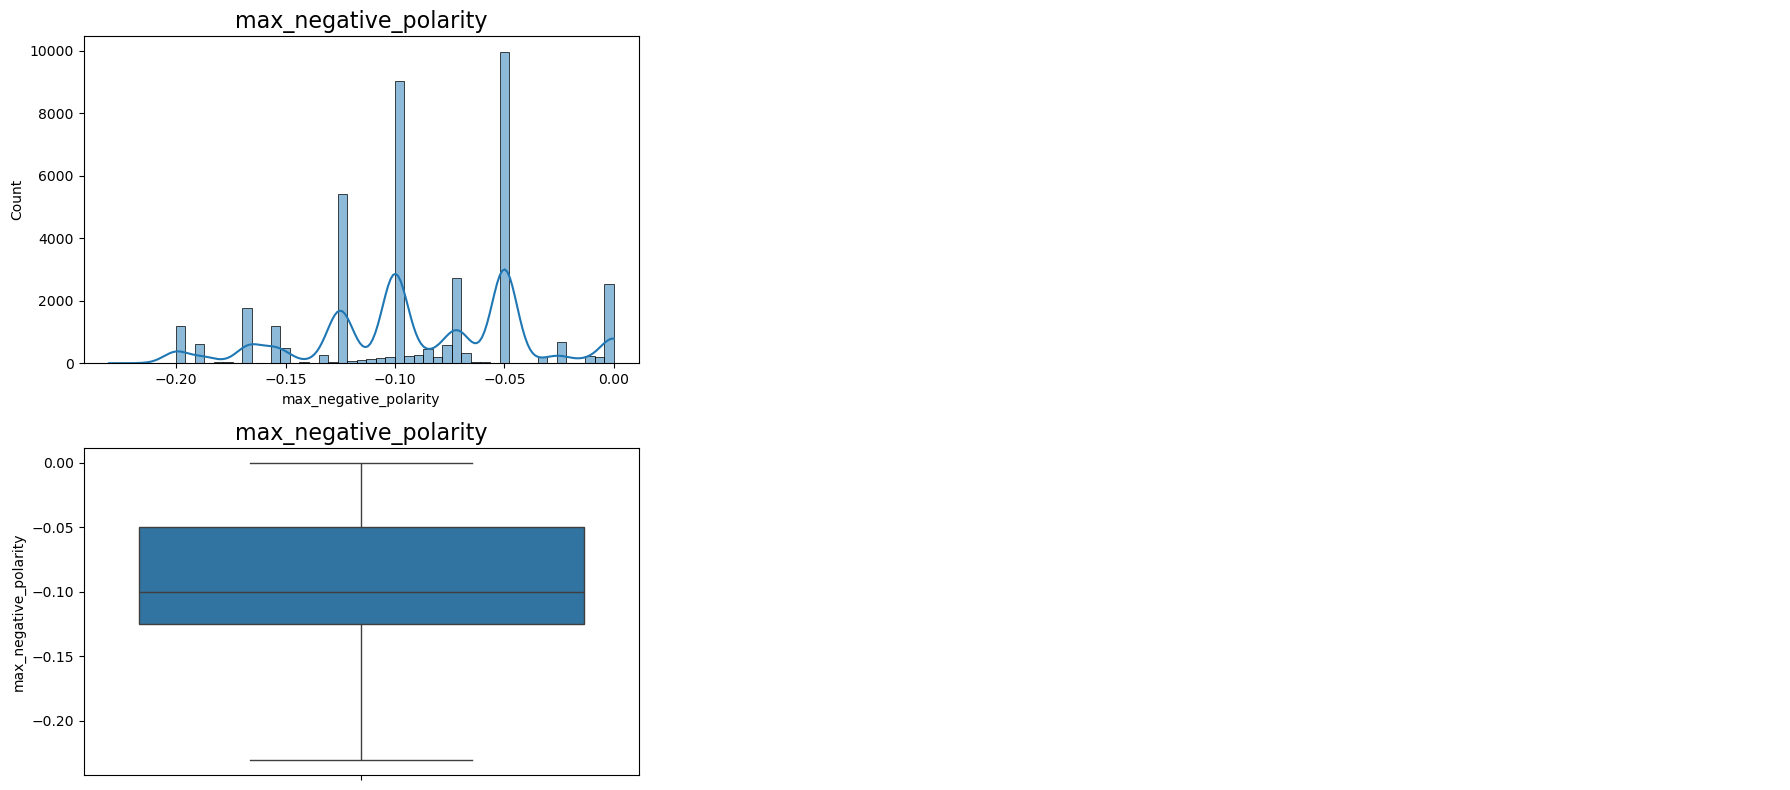

In [86]:
plot_histogram_boxplot(data_treated[nlp_posneg])

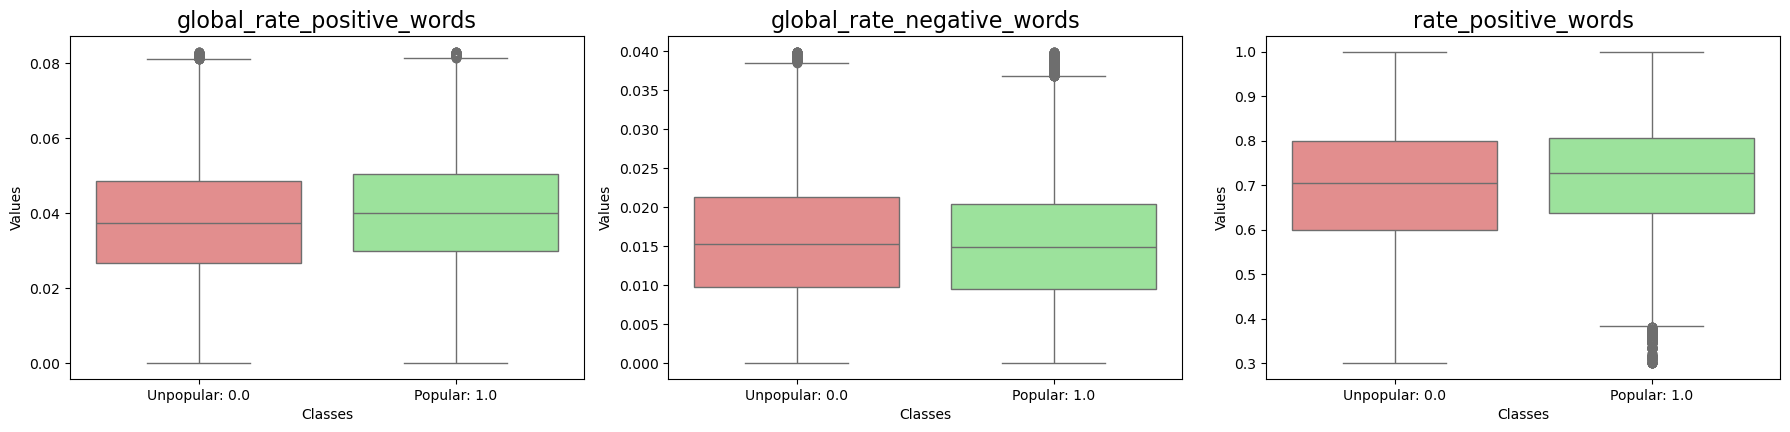

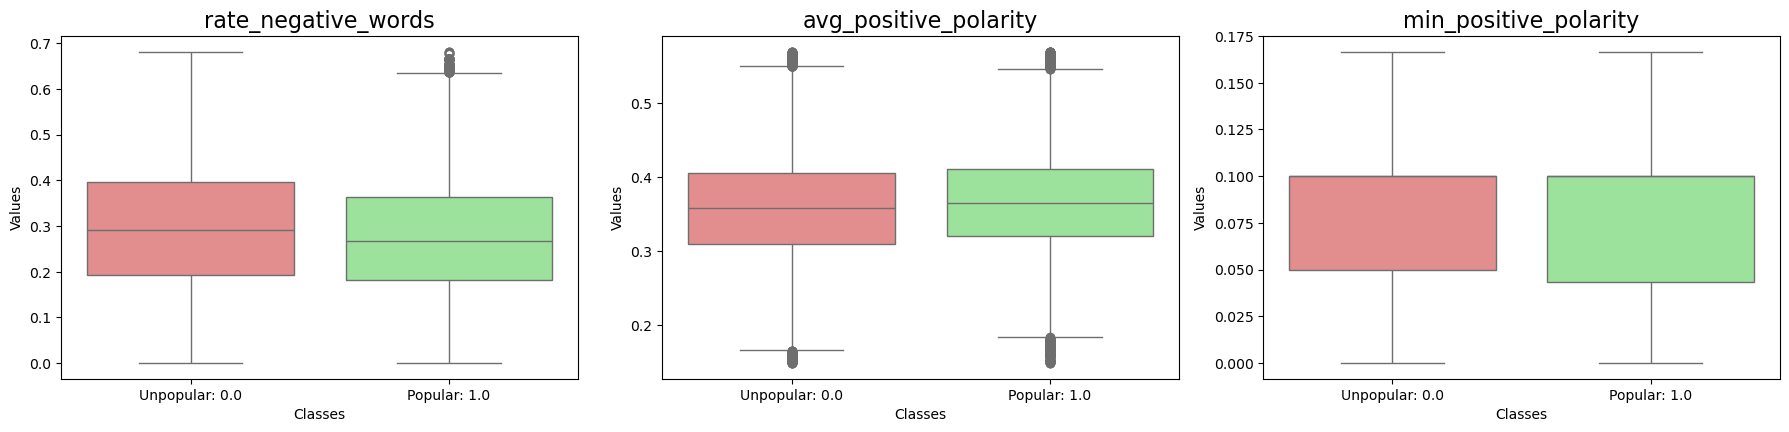

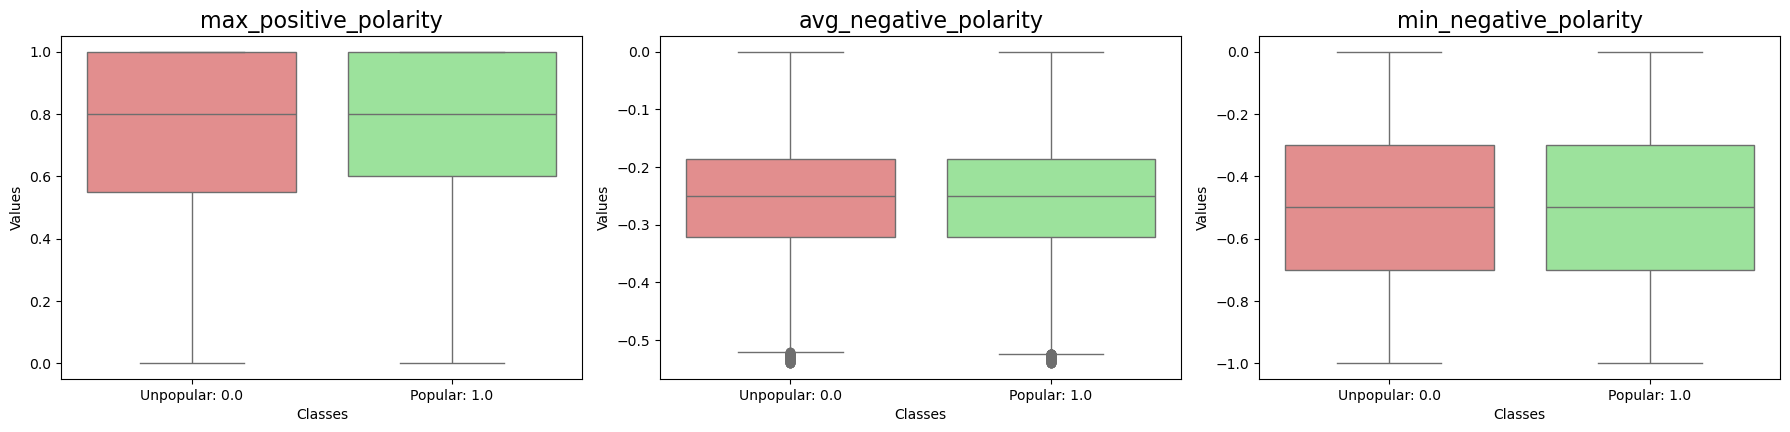

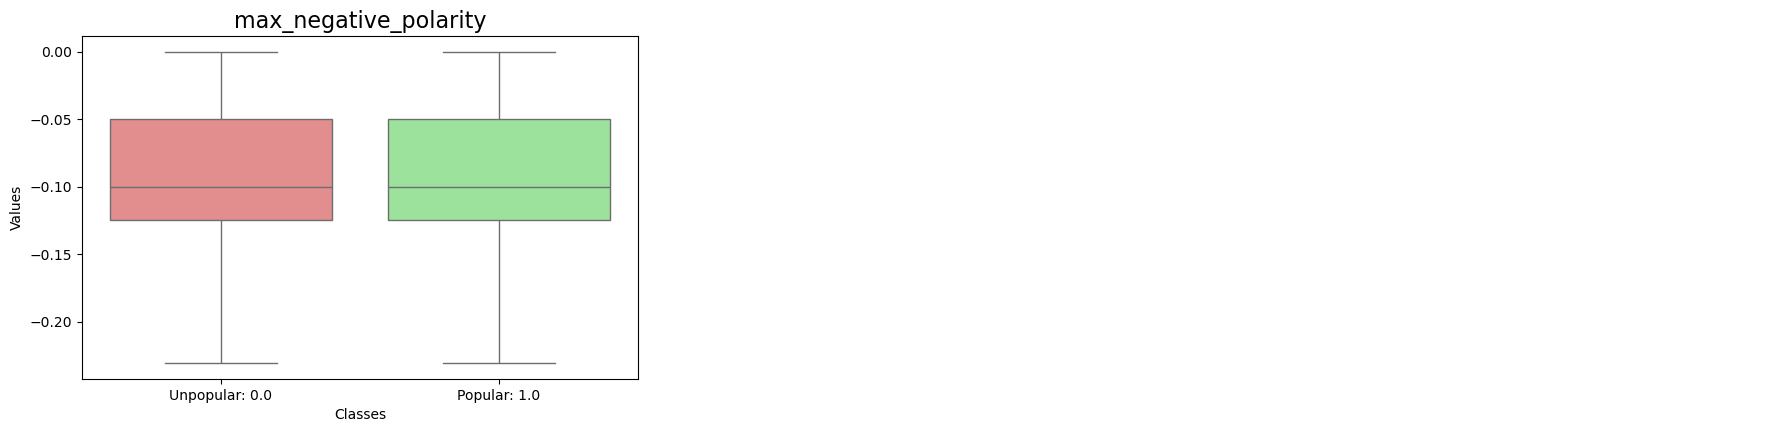

In [87]:
boxplot_by_class(pd.concat([data_treated[nlp_posneg], data['shares_c']], axis=1))

**Checking for correlation and multicolinearity.**

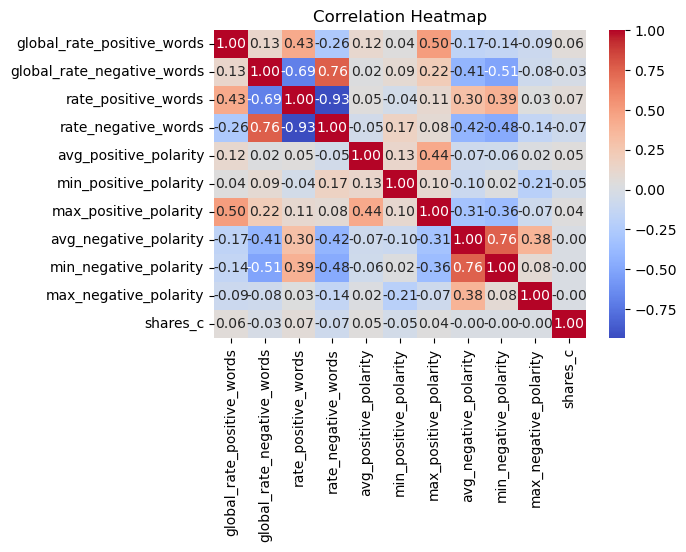

In [88]:
plot_corr_heatmap(pd.concat([data_treated[nlp_posneg], data[['shares_c']]], axis=1))

**After reviewing the correlation heatmap and box plots, it became evident that 'global_rate_negative_words', 'rate_positive_words', and 'min_negative_polarity' exhibited correlation with other features and contributed minimally to our predictive analysis. Consequently, we've made the decision to remove these three features from the dataset**

In [89]:
# adding columns to drop list

cols_to_drop.append('global_rate_negative_words')
cols_to_drop.append('rate_positive_words')
cols_to_drop.append('min_negative_polarity')

### Final list of columns to be dropped

In [90]:
cols_to_drop

['n_unique_tokens',
 'self_reference_avg_sharess',
 'kw_min_min',
 'kw_max_max',
 'kw_avg_max',
 'kw_max_avg',
 'kw_min_avg',
 'kw_max_min',
 'data_channel_is_bus',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'weekday_is_friday',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'abs_title_subjectivity',
 'abs_title_sentiment_polarity',
 'global_rate_negative_words',
 'rate_positive_words',
 'min_negative_polarity']

In [91]:
len(cols_to_drop)

22

## Combining final set of features after EDA

**Merging data into single dataframe with the updated set of values.**

In [92]:
# Create a new dataframe with the same columns as 'data'
new_data = pd.DataFrame(columns=data.columns)

for col in data.columns:
    # If the column exists in 'data_treated', replace the values
    if col in data_treated.columns:
        new_data[col] = data_treated[col]
    else:
        # If the column doesn't exist in 'data_treated', keep the original values
        new_data[col] = data[col]
        
# Find columns in 'data_treated' that are not in 'data'
new_columns = [col for col in data_treated.columns if col not in data.columns]

# Add new columns from 'data_treated' to the new dataframe
for col in new_columns:
    new_data.insert(len(new_data.columns) - 2, col, data_treated[col])

In [93]:
new_data

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0                12.0             219.0         0.663594               1.0   
1                 9.0             255.0         0.604743               1.0   
2                 9.0             211.0         0.575130               1.0   
3                 9.0             531.0         0.503788               1.0   
4                13.0            1072.0         0.415646               1.0   
...               ...               ...              ...               ...   
39638            11.0             346.0         0.529052               1.0   
39639            12.0             328.0         0.696296               1.0   
39640            10.0             442.0         0.516355               1.0   
39641             6.0             682.0         0.539493               1.0   
39642            10.0             157.0         0.701987               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs        num_imgs  \
0                      0.815385        4.0             2.0     Less_than_5   
1                      0.791946        3.0             1.0     Less_than_5   
2                      0.663866        3.0             1.0     Less_than_5   
3                      0.665635        9.0             0.0     Less_than_5   
4                      0.540890       19.0             3.1  Greater_than_5   
...                         ...        ...             ...             ...   
39638                  0.684783        9.0             7.0     Less_than_5   
39639                  0.885057        9.0             7.0     Less_than_5   
39640                  0.644128       24.0             1.0  Greater_than_5   
39641                  0.692661       10.0             1.0     Less_than_5   
39642                  0.846154        1.0             1.0     Less_than_5   

       num_videos  average_token_length  ... avg_negative_polarity  \
0       No_Videos              4.680365  ...             -0.350000   
1       No_Videos              4.913725  ...             -0.118750   
2       No_Videos              4.393365  ...             -0.466667   
3       No_Videos              4.404896  ...             -0.369697   
4       No_Videos              4.682836  ...             -0.220192   
...           ...                   ...  ...                   ...   
39638  Has_Videos              4.523121  ...             -0.260000   
39639  Has_Videos              4.405488  ...             -0.211111   
39640  Has_Videos              5.076923  ...             -0.356439   
39641   No_Videos              4.975073  ...             -0.205246   
39642  Has_Videos              4.471338  ...             -0.200000   

       min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                     -0.600              -0.200000            0.500000   
1                     -0.125              -0.100000            0.000000   
2                     -0.800              -0.133333            0.000000   
3                     -0.600              -0.166667            0.000000   
4                     -0.500              -0.050000            0.454545   
...                      ...                    ...                 ...   
39638                 -0.500              -0.125000            0.100000   
39639                 -0.400              -0.100000            0.300000   
39640                 -0.800              -0.166667            0.454545   
39641                 -0.500              -0.012500            0.000000   
39642                 -0.200              -0.200000            0.333333   

       title_sentiment_polarity  abs_title_subjectivity  \
0                     -0.187500                0.000000   
1                      0.000000                0.500000   
2                      0.000000                0.500000   
3                      0.000000                0.500000   
4                      0.136364                0.045455   
...                         ...      

**Dropping columns as per the EDA**

In [94]:
columns_to_keep = [col for col in new_data.columns if col not in cols_to_drop]
data_final = new_data[columns_to_keep].copy()

In [95]:
data_final

n_tokens_title  n_tokens_content  n_non_stop_words  \
0                12.0             219.0               1.0   
1                 9.0             255.0               1.0   
2                 9.0             211.0               1.0   
3                 9.0             531.0               1.0   
4                13.0            1072.0               1.0   
...               ...               ...               ...   
39638            11.0             346.0               1.0   
39639            12.0             328.0               1.0   
39640            10.0             442.0               1.0   
39641             6.0             682.0               1.0   
39642            10.0             157.0               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs        num_imgs  \
0                      0.815385        4.0             2.0     Less_than_5   
1                      0.791946        3.0             1.0     Less_than_5   
2                      0.663866        3.0             1.0     Less_than_5   
3                      0.665635        9.0             0.0     Less_than_5   
4                      0.540890       19.0             3.1  Greater_than_5   
...                         ...        ...             ...             ...   
39638                  0.684783        9.0             7.0     Less_than_5   
39639                  0.885057        9.0             7.0     Less_than_5   
39640                  0.644128       24.0             1.0  Greater_than_5   
39641                  0.692661       10.0             1.0     Less_than_5   
39642                  0.846154        1.0             1.0     Less_than_5   

       num_videos  average_token_length    num_keywords  ...  \
0       No_Videos              4.680365          5_to_6  ...   
1       No_Videos              4.913725     Less_than_5  ...   
2       No_Videos              4.393365          5_to_6  ...   
3       No_Videos              4.404896  Greater_than_6  ...   
4       No_Videos              4.682836  Greater_than_6  ...   
...           ...                   ...             ...  ...   
39638  Has_Videos              4.523121  Greater_than_6  ...   
39639  Has_Videos              4.405488  Greater_than_6  ...   
39640  Has_Videos              5.076923  Greater_than_6  ...   
39641   No_Videos              4.975073          5_to_6  ...   
39642  Has_Videos              4.471338     Less_than_5  ...   

       avg_positive_polarity  min_positive_polarity  max_positive_polarity  \
0                   0.378636               0.100000                   0.70   
1                   0.286915               0.033333                   0.70   
2                   0.495833               0.100000                   1.00   
3                   0.385965               0.136364                   0.80   
4                   0.411127               0.033333                   1.00   
...                      ...                    ...                    ...   
39638               0.333791               0.100000                   0.75   
39639               0.374825               0.136364                   0.70   
39640               0.307273               0.136364                   0.50   
39641               0.236851               0.062500                   0.50   
39642               0.247338               0.100000                   0.50   

       avg_negative_polarity  max_negative_polarity  title_subjectivity  \
0                  -0.350000              -0.200000            0.500000   
1                  -0.118750              -0.100000            0.000000   
2                  -0.466667              -0.133333            0.000000   
3                  -0.369697              -0.166667            0.000000   
4                  -0.220192              -0.050000            0.454545   
...                      ...                    ...                 ...   
39638              -0.260000              -0.125000            0.100000   
39639              -0.211111   

In [96]:
data_final.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_non_stop_words',
       'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'num_videos', 'average_token_length', 'num_keywords',
       'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_avg_min', 'kw_min_max', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'is_weekend', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'LDA', 'shares', 'shares_c'],
      dtype='object')

### segregating columns based on the datatype

In [97]:
continous_cols = ['n_tokens_title', 'n_tokens_content',
'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs',
'average_token_length', 'kw_avg_min', 'kw_min_max', 'kw_avg_avg', 
'self_reference_min_shares', 'self_reference_max_shares', 
'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 
'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity', 
'max_positive_polarity', 'avg_negative_polarity', 
'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity']

In [98]:
categorical_cols = ['num_imgs', 'num_videos', 'num_keywords', 'LDA']

In [99]:
bollean_cols = ['n_non_stop_words', 
'data_channel_is_lifestyle', 'data_channel_is_entertainment', 
'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world',
'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
'weekday_is_thursday', 'is_weekend']

In [100]:
target_col = ['shares_c']

**Correlation heatmap for final set of categorical features.**

In [101]:
def plot_corr_heatmap1(dataframe):
    # Select subset of dataframe with specified columns
    subset = dataframe
    
    # Calculate correlation matrix
    corr_matrix = subset.corr()
    
    # Set up the matplotlib figure
    plt.figure(figsize=(18, 12))

    # Plot heatmap
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})

    # Set plot title
    plt.title('Correlation Heatmap (Continous features)')

    # Show plot
    plt.show()

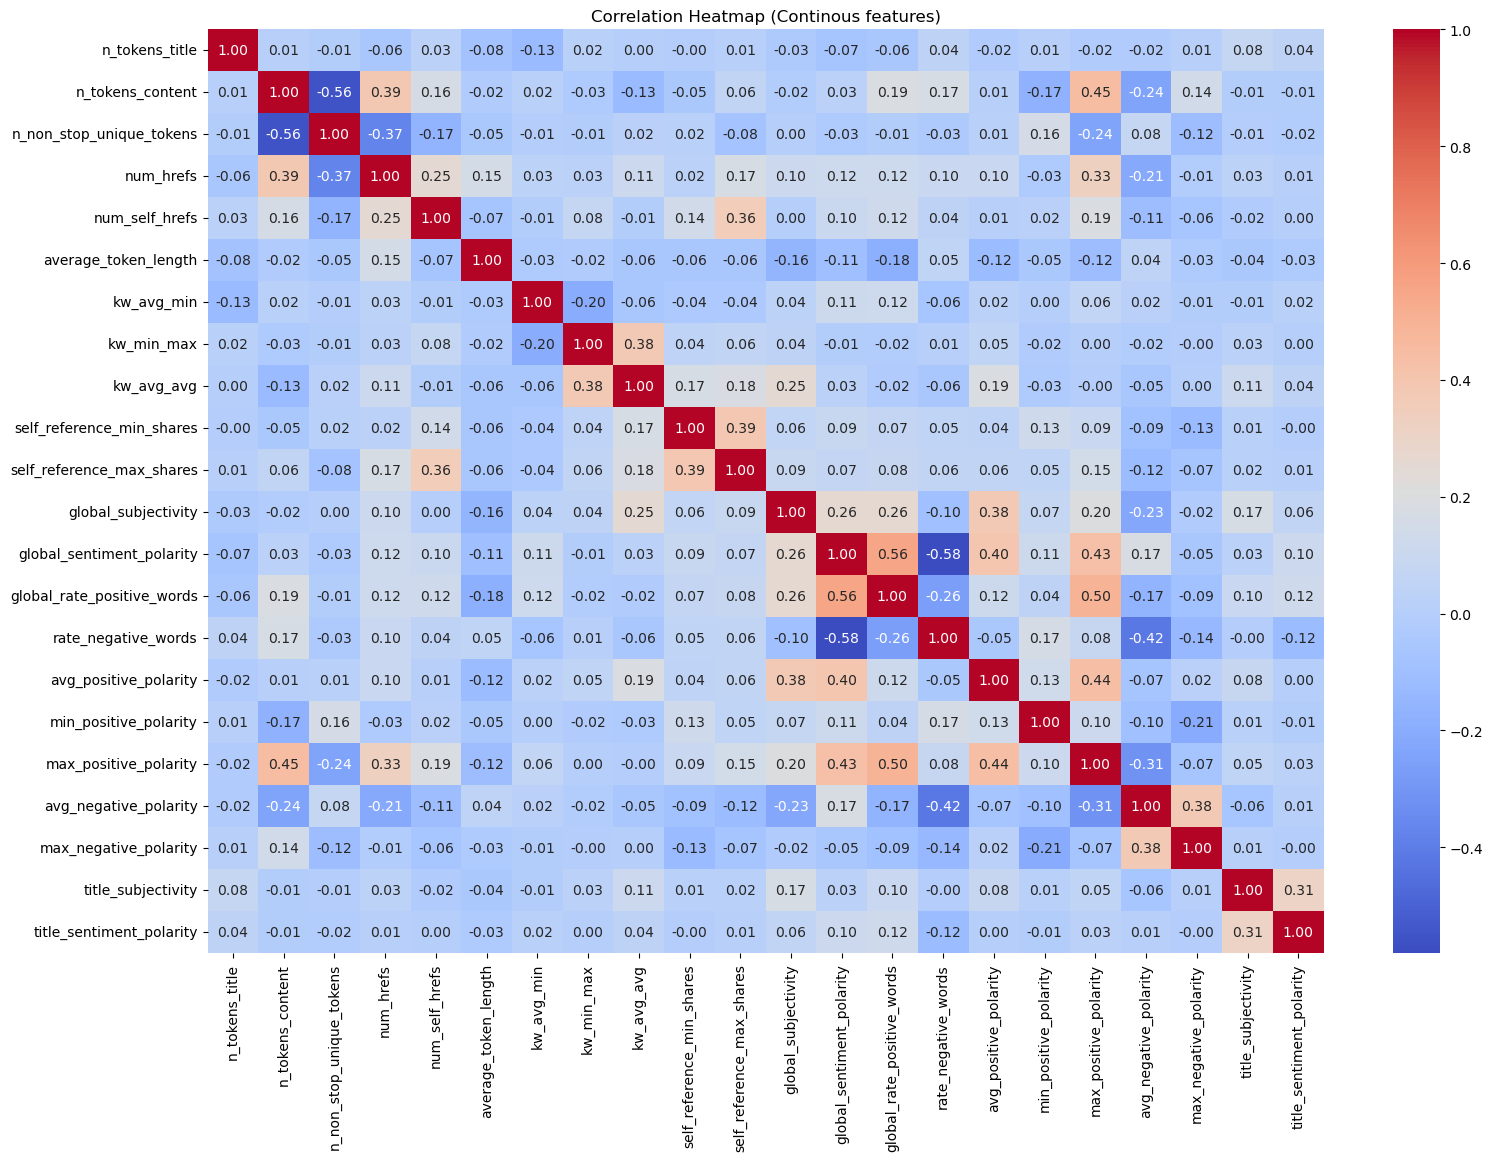

In [102]:
plot_corr_heatmap1(data_final[continous_cols])

**Upon reviewing the correlation heatmap for the finalized set of continuous features, a noteworthy observation is the absence of any noticeable multicollinearity among these selected features. This outcome is a direct reflection of the comprehensive nature of our Exploratory Data Analysis (EDA) phase. During the EDA, meticulous scrutiny was applied to ensure the inclusion of only the most relevant features, thereby eliminating redundant or highly correlated ones. The absence of multicollinearity in this correlation heatmap strongly indicates the efficacy of our feature selection process, affirming its robustness and the precision of our decision-making during the exploratory phase.**

In [103]:
data_final[continous_cols+categorical_cols+bollean_cols+target_col].to_csv("data_after_EDA.csv",index=False)

In [104]:
len(data_final[continous_cols+categorical_cols+bollean_cols+target_col].columns)

38

## 2. Model selection, exploration & evaluation

We have used the following modelling techniques :
1. Logistic Regression:

Logistic regression is a statistical method used for binary classification tasks. It models the relationship between one or more independent variables and a binary outcome using the logistic function to estimate probabilities. 
    
    (a) It provides interpretable coefficients indicating the impact of variables on the outcome's probability
    (b) It requires fewer computational resources compared to more complex algorithms, making it suitable for large datasets
    (c) It can be regularized to prevent overfitting and improve generalization

2. Naive Bayes:

Naive Bayes is a classification technique based on Bayes' theorem with an assumption of independence among predictors. Despite its simplistic assumptions, it often performs well in practice and is popular in text classification tasks like spam filtering or sentiment analysis.
    
    (a) Assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. This "naive" assumption simplifies the calculation of probabilities.
    (b) Computationally efficient and easy to implement, especially with large datasets.



### 2.1 Logistic regression

When the assumptions of logistic regression analysis are not met, problems such as biased coefficient estimates or very large standard errors for the logistic regression coefficients may lead to invalid statistical inferences.

Assumption 1 - Appropriate outcome type (Must be categorical) - Our target column - share_c is categorical hence, first assumption is taken care of

Assumption 2 - Linearity of independent variables and log odds - **We have to check this assumption**

Assumption 3 - No strongly influential outliers - As we have treated the columns with outlier treatement, this assumption is taken care for

Assumption 4 - Absence of multicollinearity - **We will check this assumption**

Assumption 5 - Sufficiently large sample size - This assumption is also taken care of as our dataset is sufficiently large

One of the critical assumptions of logistic regression is that the relationship between the logit (aka log-odds) of the outcome and each continuous independent variable is linear. In order to check this assumption, we will use Generalized Linear Model (GLM) with the logit function wherein , the p-values associated with each coefficient estimate indicate whether the estimated effect of a predictor variable on the response variable is statistically significant. Low p-values (typically below a chosen significance threshold, e.g., 0.05) suggest evidence that the predictor has a significant impact on the response, assuming other model assumptions hold

In [105]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import math
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
from statsmodels.stats.outliers_influence import variance_inflation_factor
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

In [106]:
continous_cols = ['n_tokens_title', 'n_tokens_content',
'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs',
'average_token_length', 'kw_avg_min', 'kw_min_max', 'kw_avg_avg', 
'self_reference_min_shares', 'self_reference_max_shares', 
'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 
'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity', 
'max_positive_polarity', 'avg_negative_polarity', 
'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity']

In [107]:
data = pd.read_csv("data_after_EDA.csv")
categorical_cols = ['num_imgs', 'num_videos', 'num_keywords', 'LDA']
encoded_data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
encoded_data = encoded_data.astype(float)
data_X = encoded_data.drop(columns=['shares_c'])
data_y = encoded_data['shares_c']

In [108]:
continuous_var = continous_cols

# Add logit transform interaction terms (natural log) for continuous variables e.g.. Age * Log(Age)

# Keep columns related to continuous variables
#cols_to_keep = continuous_var + df_titanic.columns.tolist()[-len(continuous_var):]
X_lt = pd.DataFrame()

for var in continuous_var:
    X_lt[f'{var}:Log_{var}'] = data_X[var].apply(lambda x: x * np.log(x))
    
# Redefining variables to include interaction terms
X_lt = data_X[continous_cols]

# Add constant term
X_lt_constant = sm.add_constant(X_lt, prepend=False)
  
# Building model and fit the data (using statsmodel's Logit)
logit_results = GLM(data_y, X_lt_constant, family=families.Binomial()).fit()

# Display summary results
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               shares_c   No. Observations:                39643
Model:                            GLM   Df Residuals:                    39620
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25737.
Date:                Fri, 08 Dec 2023   Deviance:                       51474.
Time:                        18:23:07   Pearson chi2:                 3.98e+04
No. Iterations:                     5   Pseudo R-squ. (CS):            0.07997
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
n_tokens_title      

Based on the above table, we see that -  'kw_min_max', 'max_positive_polarity', 'title_subjectivity' columns are insignificant as the p-value is greater than 0.05. This means that there is non-linearity in the these features, and the assumption has been violated for these columns. Hence, we should drop these columns for building logistic regression model

In [109]:
data_X[continous_cols]

n_tokens_title  n_tokens_content  n_non_stop_unique_tokens  num_hrefs  \
0                12.0             219.0                  0.815385        4.0   
1                 9.0             255.0                  0.791946        3.0   
2                 9.0             211.0                  0.663866        3.0   
3                 9.0             531.0                  0.665635        9.0   
4                13.0            1072.0                  0.540890       19.0   
...               ...               ...                       ...        ...   
39638            11.0             346.0                  0.684783        9.0   
39639            12.0             328.0                  0.885057        9.0   
39640            10.0             442.0                  0.644128       24.0   
39641             6.0             682.0                  0.692661       10.0   
39642            10.0             157.0                  0.846154        1.0   

       num_self_hrefs  average_token_length  kw_avg_min  kw_min_max  \
0                 2.0              4.680365       0.000         0.0   
1                 1.0              4.913725       0.000         0.0   
2                 1.0              4.393365       0.000         0.0   
3                 0.0              4.404896       0.000         0.0   
4                 3.1              4.682836       0.000         0.0   
...               ...                   ...         ...         ...   
39638             7.0              4.523121     173.125      3231.8   
39639             7.0              4.405488     184.000      6500.0   
39640             1.0              5.076923     168.250      6200.0   
39641             1.0              4.975073      -1.000         0.0   
39642             1.0              4.471338      23.500      6370.0   

        kw_avg_avg  self_reference_min_shares  ...  global_sentiment_polarity  \
0       820.944678                      496.0  ...                   0.092562   
1       820.944678                        0.0  ...                   0.148948   
2       809.211821                      918.0  ...                   0.323333   
3       820.944678                        0.0  ...                   0.100705   
4      1228.468513                      545.0  ...                   0.281003   
...            ...                        ...  ...                        ...   
39638  3031.115764                     1818.4  ...                   0.141964   
39639  3411.660830                     2100.0  ...                   0.194249   
39640  4206.439195                     1400.0  ...                   0.024609   
39641  1777.895883                      452.0  ...                  -0.008066   
39642  3296.909481                     2100.0  ...                   0.104892   

       global_rate_positive_words  rate_negative_words  avg_positive_polarity  \
0                        0.045662             0.230769               0.378636   
1                        0.043137             0.266667               0.286915   
2                        0.056872             0.142857               0.495833   
3                        0.041431             0.333333               0.385965   
4                        0.074627             0.139785               0.411127   
...                           ...                  ...                    ...   
39638                    0.037572             0.277778               0.333791   
39639                    0.039634             0.187500               0.374825   
39640                    0.033937             0.423077               0.307273   
39641                    0.020528             0.533333               0.236851   
39642                    0.063694             0.166667               0.247338   

       min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
0                   0.100000                   0.70              -0.350000   
1                   0.033333                   0.70              -0.118750   
2            

#### Assumption - 4

Multicollinearity corresponds to a situation where the data contain highly correlated independent variables. This is a problem because it reduces the precision of the estimated coefficients, which weakens the statistical power of the logistic regression model.

We will check this assumption by **Correlation heatmap**

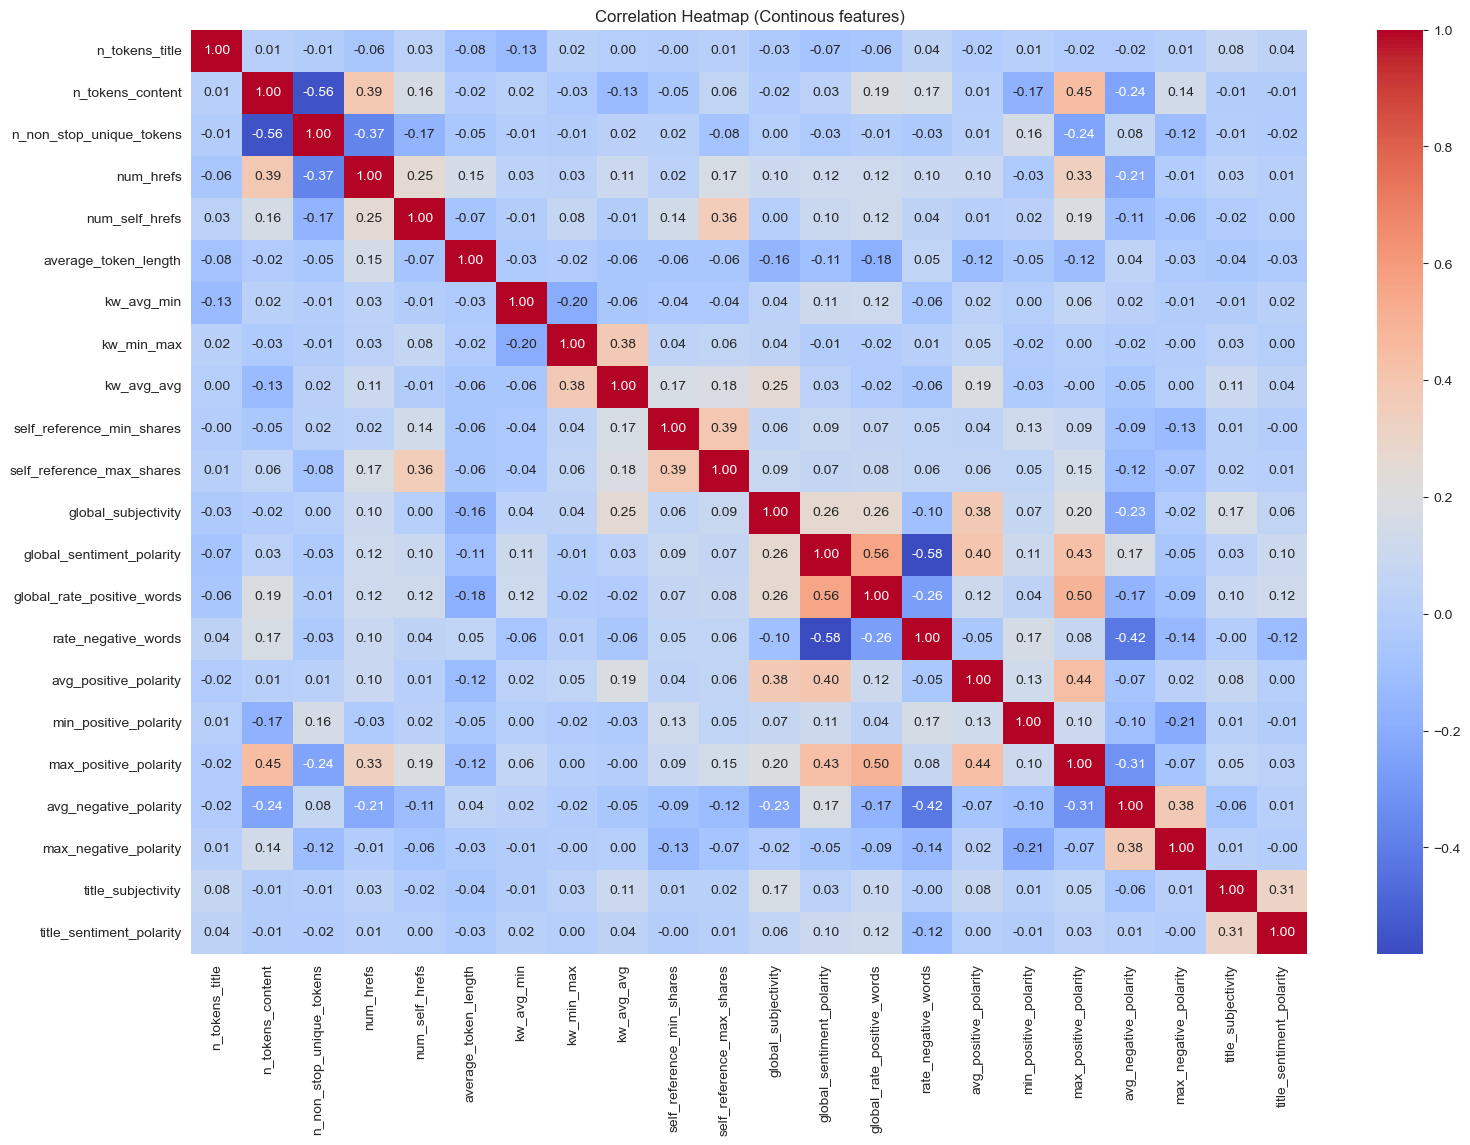

In [110]:
plot_corr_heatmap1(data_X[continous_cols])

Based on the above heatmap, we observe that the indendent variables are not linearly related to each other. Hence, we have verfied the assumption

### Building baseline Logistic regression model with - Original data without EDA

In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
from dataclasses import dataclass
from typing import List, Optional
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
import scipy
import scipy.linalg

@dataclass
class LogisticRegression_baseline:
    lambda_reg: float
    learning_rate: float
    max_iterations: int
    epsilon: float = 0.0005
    idx_to_remove: List[int] = None
    pca: bool = False

    def __post_init__(self):
        self.train_X, self.test_X, self.train_y, self.test_y = self.read_data()

    
    def read_data(self):
       
        data = pd.read_csv("OnlineNewsPopularity.csv")
        data.columns = data_raw.columns.str.strip()
        data = data.drop(columns=['url','timedelta'])
        #col_drop = ['kw_min_max', 'max_positive_polarity', 'title_subjectivity']
        data_logistic = data.copy()
        #data_logistic.drop(columns = col_drop, inplace = True)
        
        #categorical_cols = ['num_imgs', 'num_videos', 'num_keywords', 'LDA']
        #encoded_data = pd.get_dummies(data_logistic, columns=categorical_cols, drop_first=True, dtype=int)
        #encoded_data = encoded_data.astype(float)
        median_shares = data_logistic['shares'].median()
        data_logistic['shares_c'] = np.where(data_logistic['shares'] < median_shares, 0.0, 1.0)
        X = data_logistic.drop(columns=['shares_c', 'shares'])
        y = data_logistic['shares_c']
        
        
        train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
        # Scale the features (optional, but often beneficial for logistic regression)
        scaler = StandardScaler()
        train_X = scaler.fit_transform(train_X)
        test_X = scaler.transform(test_X)
        return train_X, test_X, train_y, test_y
       

    def addX0(self, X):
        return np.column_stack([np.ones([X.shape[0], 1]), X])

    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X.dot(self.theta)))

    def cost_function(self, X, y):
        sig = self.sigmoid(X)
        cost = (1 / X.shape[0]) * (y * np.log(sig) + (1 - y) * np.log(1 - sig))
        return -cost.sum()

    def cost_derivative(self, X, y):
        sig = self.sigmoid(X)
        grad = (sig - y).dot(X)
        # Add L2 regularization to the gradient
        grad += (1 / X.shape[0]) * self.lambda_reg * self.theta
        return grad

    #if not pca:
    def gradient_descent(self, X, y):
        errors = []
        prev_error = float('inf')
        for i in tqdm(range(self.max_iterations), colour='red'):
            self.theta -= self.learning_rate * (self.cost_derivative(X, y))
            error = self.cost_function(X, y)
            errors.append(error)
            if abs(prev_error - error) < self.epsilon:
                #print(abs(prev_error - error))
                print("Model stopped learning")
                break
            prev_error = error
        if not self.pca:
            self.plot_cost(errors)

    def run_model(self):
        if self.pca:
            self.run_model_with_PCA()
        else:
            start_time = time.time()
            self.train_X = self.addX0(self.train_X)
            self.test_X = self.addX0(self.test_X)
            self.theta = np.ones(self.train_X.shape[1], dtype=np.float64) * 0

            if self.idx_to_remove:
                print(f"Removing data point numbers: {[idx + 1 for idx in self.idx_to_remove]}")
                self.remove_index(self.idx_to_remove)

            self.gradient_descent(self.train_X, self.train_y)

            print('The model params are {}'.format(self.theta))

            # performance stats for training set
            self.display_stats(self.train_X, self.train_y, set_type="Training Set")

            # performance stats for test set
            self.display_stats(self.test_X, self.test_y, set_type="Test Set")

            end_time = time.time()  # Record the end time
            execution_time = end_time - start_time
            print("\n")
            print("**Execution time: {:.4f} seconds**\n".format(execution_time))

    def display_stats(self, X, y, set_type=""):
        predictions = np.round(self.sigmoid(X))
        accuracy = np.mean(predictions == y)
        precision = np.sum(predictions * y) / np.sum(predictions)
        recall = np.sum(predictions * y) / np.sum(y)
        f1_score = 2 * (precision * recall) / (precision + recall)

        print(f"\n{set_type} Statistics:")
        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1-Score: {f1_score}")

        
    def plot_cost(self, cost_sequence):
        s = np.array(cost_sequence)
        t = np.arange(s.size)

        fig, ax = plt.subplots()
        ax.plot(t, s)

        ax.set(xlabel='Iterations', ylabel='Cost', title='Cost Trend')
        ax.grid()
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, shadow=True)
        plt.show()
        
    
    def custom_pca_fit_transform(self, X, n_components):
        # Center the data
        mean = np.mean(X, axis=0)
        centered_data = X - mean

        # Calculate covariance matrix
        covariance_matrix = np.cov(centered_data, rowvar=False)

        # Calculate eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        # Sort eigenvalues and eigenvectors in descending order
        idx = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[:, idx]

        # Select the top n_components eigenvectors
        components = eigenvectors[:, :n_components]

        # Transform the data
        transformed_data = np.dot(centered_data, components)
        return transformed_data, components

    def custom_pca_transform(self, X, components):
        # Center the data
        mean = np.mean(X, axis=0)
        centered_data = X - mean

        # Transform the data using the calculated components
        transformed_data = np.dot(centered_data, components)
        return transformed_data



    def run_model_with_PCA(self):
        accuracies = []
        n_components_list = range(4, self.train_X.shape[1], 4)  # Range of n_components

        for n_components in n_components_list:
            train_X_pca, pca_components = self.custom_pca_fit_transform(self.train_X, n_components)
            test_X_pca = self.custom_pca_transform(self.test_X, pca_components)

            self.theta = np.ones(pca_components.shape[1], dtype=np.float64) * 0

            if self.idx_to_remove:
                self.remove_index(self.idx_to_remove)

            self.gradient_descent(train_X_pca, self.train_y)

            predictions = np.round(self.sigmoid(test_X_pca))
            accuracy = np.mean(predictions == self.test_y)
            accuracies.append(accuracy)

        # Plot n_components vs. accuracy
        plt.plot(n_components_list, accuracies, marker='o')
        plt.xlabel('n_components')
        plt.ylabel('Accuracy')
        plt.title('PCA Components vs. Accuracy')
        plt.grid()
        plt.show()
        

 62%|███████████████████████████████████████████████▍                             | 3077/5000 [00:08<00:05, 366.52it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Model stopped learning


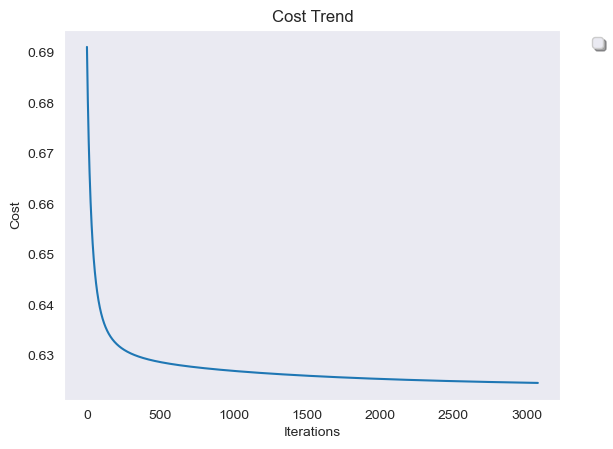

The model params are [ 1.68390625e-01 -1.50055103e-03  8.13859840e-02  5.42853342e-03
  2.09719074e-02 -4.73496442e-04  1.24142907e-01 -8.58169112e-02
  2.82212194e-02 -1.28183158e-02 -8.79431466e-02  1.05350404e-01
 -4.23068167e-02 -1.47009361e-01 -1.23807196e-01  1.79509044e-01
  1.66455457e-01 -3.74787087e-02  1.36141707e-01 -2.26454934e-02
  3.38005998e-03 -3.60791802e-02 -4.61574576e-02 -2.81385776e-02
 -1.70486397e-02 -3.43853622e-01  6.62909073e-01  6.78159697e-02
  2.23819509e-02  6.68787429e-02 -1.06351615e-02 -5.89073095e-02
 -5.31160926e-02 -3.39347257e-02  3.70942255e-02  1.28142092e-01
  6.68362155e-02  1.41643542e-01  2.06852933e-01 -6.53845937e-02
 -1.43520137e-01 -6.01000549e-02  6.27789454e-02  1.16731172e-01
 -6.25901410e-03 -8.15026113e-02  7.58248848e-02  3.81461301e-02
 -7.71622485e-02 -2.07986883e-02 -4.41325779e-02 -9.45575678e-04
 -1.10490475e-02  8.98415879e-03  1.15485055e-02  3.74754530e-02
  5.47228659e-02  5.53512026e-02  5.76351641e-03]

Training Set Stati

In [112]:
lr_b = LogisticRegression_baseline(learning_rate=0.000001, max_iterations=5000, epsilon=0.0000005, lambda_reg= 0.0, pca = False)
lr_b.run_model()

The baseline model shows an accuracy of about 65.3% for both training and test data

### Building Logistic regression model for regularization & PCA

In [113]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
from dataclasses import dataclass
from typing import List, Optional
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
import scipy
import scipy.linalg

@dataclass
class LogisticRegression:
    lambda_reg: float
    learning_rate: float
    max_iterations: int
    epsilon: float = 0.0005
    idx_to_remove: List[int] = None
    pca: bool = False

    def __post_init__(self):
        self.train_X, self.test_X, self.train_y, self.test_y = self.read_data()

    
    def read_data(self):
       
        data = pd.read_csv("data_after_EDA.csv")
        col_drop = ['kw_min_max', 'max_positive_polarity', 'title_subjectivity']
        data_logistic = data.copy()
        data_logistic.drop(columns = col_drop, inplace = True)
        
        categorical_cols = ['num_imgs', 'num_videos', 'num_keywords', 'LDA']
        encoded_data = pd.get_dummies(data_logistic, columns=categorical_cols, drop_first=True, dtype=int)
        encoded_data = encoded_data.astype(float)
        X = encoded_data.drop(columns=['shares_c'])
        y = encoded_data['shares_c']
        
        
        train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
        # Scale the features (optional, but often beneficial for logistic regression)
        scaler = StandardScaler()
        train_X = scaler.fit_transform(train_X)
        test_X = scaler.transform(test_X)
        return train_X, test_X, train_y, test_y
       

    def addX0(self, X):
        return np.column_stack([np.ones([X.shape[0], 1]), X])

    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X.dot(self.theta)))

    def cost_function(self, X, y):
        sig = self.sigmoid(X)
        cost = (1 / X.shape[0]) * (y * np.log(sig) + (1 - y) * np.log(1 - sig))
        return -cost.sum()

    def cost_derivative(self, X, y):
        sig = self.sigmoid(X)
        grad = (sig - y).dot(X)
        # Add L2 regularization to the gradient
        grad += (1 / X.shape[0]) * self.lambda_reg * self.theta
        return grad

    #if not pca:
    def gradient_descent(self, X, y):
        errors = []
        prev_error = float('inf')
        for i in tqdm(range(self.max_iterations), colour='red'):
            self.theta -= self.learning_rate * (self.cost_derivative(X, y))
            error = self.cost_function(X, y)
            errors.append(error)
            if abs(prev_error - error) < self.epsilon:
                #print(abs(prev_error - error))
                print("Model stopped learning")
                break
            prev_error = error
        if not self.pca:
            self.plot_cost(errors)

    def run_model(self):
        if self.pca:
            self.run_model_with_PCA()
        else:
            start_time = time.time()
            self.train_X = self.addX0(self.train_X)
            self.test_X = self.addX0(self.test_X)
            self.theta = np.ones(self.train_X.shape[1], dtype=np.float64) * 0

            if self.idx_to_remove:
                print(f"Removing data point numbers: {[idx + 1 for idx in self.idx_to_remove]}")
                self.remove_index(self.idx_to_remove)

            self.gradient_descent(self.train_X, self.train_y)

            print('The model params are {}'.format(self.theta))

            # performance stats for training set
            self.display_stats(self.train_X, self.train_y, set_type="Training Set")

            # performance stats for test set
            self.display_stats(self.test_X, self.test_y, set_type="Test Set")

            end_time = time.time()  # Record the end time
            execution_time = end_time - start_time
            print("\n")
            print("**Execution time: {:.4f} seconds**\n".format(execution_time))

    def display_stats(self, X, y, set_type=""):
        predictions = np.round(self.sigmoid(X))
        accuracy = np.mean(predictions == y)
        precision = np.sum(predictions * y) / np.sum(predictions)
        recall = np.sum(predictions * y) / np.sum(y)
        f1_score = 2 * (precision * recall) / (precision + recall)

        print(f"\n{set_type} Statistics:")
        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1-Score: {f1_score}")

        
    def plot_cost(self, cost_sequence):
        s = np.array(cost_sequence)
        t = np.arange(s.size)

        fig, ax = plt.subplots()
        ax.plot(t, s)

        ax.set(xlabel='Iterations', ylabel='Cost', title='Cost Trend')
        ax.grid()
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, shadow=True)
        plt.show()
        
    
    def custom_pca_fit_transform(self, X, n_components):
        # Center the data
        mean = np.mean(X, axis=0)
        centered_data = X - mean

        # Calculate covariance matrix
        covariance_matrix = np.cov(centered_data, rowvar=False)

        # Calculate eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        # Sort eigenvalues and eigenvectors in descending order
        idx = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[:, idx]

        # Select the top n_components eigenvectors
        components = eigenvectors[:, :n_components]

        # Transform the data
        transformed_data = np.dot(centered_data, components)
        return transformed_data, components

    def custom_pca_transform(self, X, components):
        # Center the data
        mean = np.mean(X, axis=0)
        centered_data = X - mean

        # Transform the data using the calculated components
        transformed_data = np.dot(centered_data, components)
        return transformed_data



    def run_model_with_PCA(self):
        accuracies = []
        n_components_list = range(4, self.train_X.shape[1], 4)  # Range of n_components

        for n_components in n_components_list:
            train_X_pca, pca_components = self.custom_pca_fit_transform(self.train_X, n_components)
            test_X_pca = self.custom_pca_transform(self.test_X, pca_components)

            self.theta = np.ones(pca_components.shape[1], dtype=np.float64) * 0

            if self.idx_to_remove:
                self.remove_index(self.idx_to_remove)

            self.gradient_descent(train_X_pca, self.train_y)

            predictions = np.round(self.sigmoid(test_X_pca))
            accuracy = np.mean(predictions == self.test_y)
            accuracies.append(accuracy)

        # Plot n_components vs. accuracy
        plt.plot(n_components_list, accuracies, marker='o')
        plt.xlabel('n_components')
        plt.ylabel('Accuracy')
        plt.title('PCA Components vs. Accuracy')
        plt.grid()
        plt.show()
        

The above function defines a logistic regression class that includes methods for data preparation, model training, gradient descent optimization, and performance evaluation. Here's a summary of its functionalities:

**Data Preprocessing:** Reads a CSV file containing data, performs preprocessing tasks such as dropping specific columns, encoding categorical variables, and splitting the dataset into training and testing sets.

**Logistic Regression Model:** Implements methods for gradient descent, cost function, sigmoid function, and derivatives for optimizing the logistic regression model.
Handles optional features like removing specific data points, applying PCA (Principal Component Analysis) for dimensionality reduction, and visualizing the cost function trend during training.It also allows adding regularization parameter - **lamda_reg** which is used to reduce the complexity of the function by imposing penalty.

**Model Training and Evaluation:** Trains the logistic regression model using gradient descent optimization on the training data.
Evaluates the trained model's performance on both the training and test datasets, computing accuracy, precision, recall, and F1-score.
Measures execution time for model training and evaluation.

**PCA (Principal Component Analysis):** Provides methods to perform PCA for dimensionality reduction.
Utilizes PCA to transform data and runs logistic regression with varying numbers of components, plotting the relationship between the number of components and model accuracy.

#### Logistic regression - Baseline

In this baseline model, after several iterations of trying with different learning rate and epsilon, and no regularization and PCA, we are fitting model on learning_rate = 0.000001 and epsilon = 0.0000005

 16%|████████████▋                                                                 | 813/5000 [00:01<00:07, 523.90it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Model stopped learning


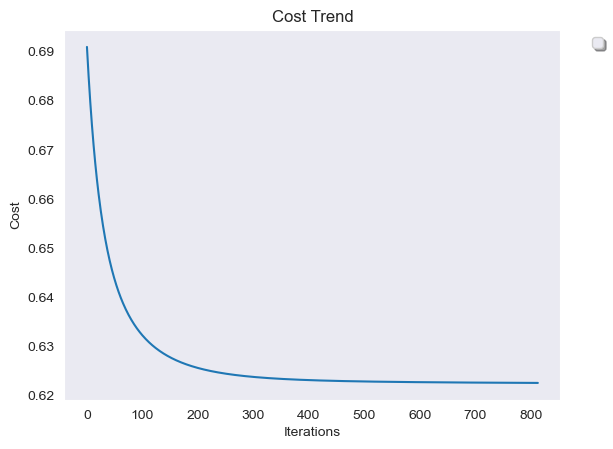

The model params are [ 0.16052989 -0.02322005  0.00722404 -0.07377988  0.08111426 -0.12828786
 -0.01634441  0.16741286  0.2982792   0.17618816  0.15247139  0.07129896
  0.01489932 -0.00101612 -0.02097674 -0.02497538 -0.08923103 -0.01227799
 -0.01054126  0.0309118  -0.03999939 -0.01751743 -0.17095842  0.1941337
  0.15781308 -0.09210326 -0.04475033 -0.09304231 -0.08938116 -0.06594031
  0.23856801 -0.04999194 -0.07167353  0.02401329 -0.04231893 -0.0793785
 -0.12675919 -0.08103746  0.00996311]

Training Set Statistics:
Accuracy: 0.6546950873431292
Precision: 0.6676399573249481
Recall: 0.7026356222668715
F1-Score: 0.6846909101379172

Test Set Statistics:
Accuracy: 0.6567032412662379
Precision: 0.6676294156854032
Recall: 0.7102339872370598
F1-Score: 0.6882730187814934


**Execution time: 1.6741 seconds**



In [114]:
lr = LogisticRegression(learning_rate=0.000001, max_iterations=5000, epsilon=0.0000005, lambda_reg=0.0, pca = False)
lr.run_model()

**Accuracy:**
Training Set: 65.47%
Test Set: 65.67%
Interpretation: The proportion of correctly classified instances out of the total instances. The model accurately predicts the outcome around 65-66% of the time on both the training and test sets.

**Precision:**
Training Set: 66.76%
Test Set: 66.76%
Interpretation: Among the instances predicted as positive (in this case, it might be a particular class or label), 66.76% were actually correct. It measures the model's accuracy in predicting the positive class.

**Recall:**
Training Set: 70.26%
Test Set: 71.02%
Interpretation: Of all the actual positive instances, the model correctly identified 70.26-71.02% of them. It measures the model's ability to identify all positive instances.

**F1-Score:**
Training Set: 68.47%
Test Set: 68.83%
Interpretation: The harmonic mean of precision and recall. It provides a balanced measure between precision and recall. An F1-Score of around 68-69% indicates a reasonable balance between precision and recall for the model.

Overall, these statistics suggest that the model performs moderately well, with decent accuracy, precision, recall, and F1-Score, indicating a good balance between correctly identifying positive instances and accurately classifying instances overall

In relation to the bias-variance tradeoff:

Moderate Bias and Moderate Variance: The model seems to have found a balance between simplicity (low bias) and complexity (low variance). It's able to capture patterns in the data without overfitting excessively to the training set.

Possible Improvements: While the model doesn't suffer from a high bias or high variance problem explicitly, further improvements could involve enhancing the model's complexity or introducing more relevant features to reduce the bias or variance slightly, respectively.

#### Logistic regression - with regularization

 16%|████████████▋                                                                 | 813/5000 [00:01<00:07, 552.34it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Model stopped learning


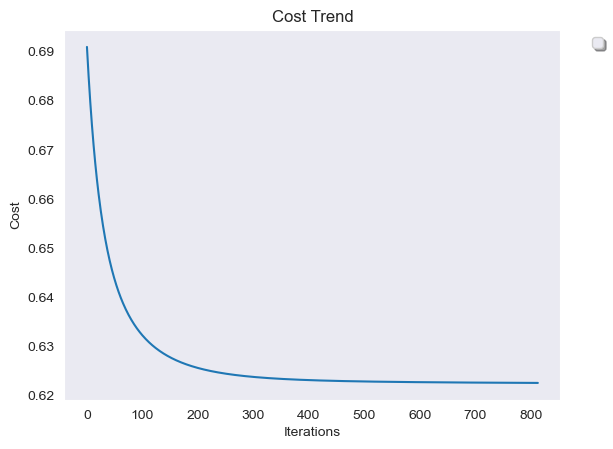

The model params are [ 0.16052989 -0.02322005  0.00722404 -0.07377988  0.08111426 -0.12828786
 -0.01634441  0.16741286  0.2982792   0.17618816  0.15247139  0.07129896
  0.01489932 -0.00101612 -0.02097674 -0.02497538 -0.08923103 -0.01227799
 -0.01054126  0.0309118  -0.03999939 -0.01751743 -0.17095842  0.1941337
  0.15781308 -0.09210326 -0.04475033 -0.09304231 -0.08938116 -0.06594031
  0.23856801 -0.04999194 -0.07167353  0.02401329 -0.04231893 -0.0793785
 -0.12675919 -0.08103746  0.00996311]

Training Set Statistics:
Accuracy: 0.6546950873431292
Precision: 0.6676399573249481
Recall: 0.7026356222668715
F1-Score: 0.6846909101379172

Test Set Statistics:
Accuracy: 0.6567032412662379
Precision: 0.6676294156854032
Recall: 0.7102339872370598
F1-Score: 0.6882730187814934


**Execution time: 1.5964 seconds**



In [115]:
lr = LogisticRegression(learning_rate=0.000001, max_iterations=5000, epsilon=0.0000005, lambda_reg=0.00005, pca = False)
lr.run_model()

With a regularization parameter of 0.00005 applied to the logistic regression model, the provided statistics indicate a similar model performance to the baseline logistic regression model without regularization. Let's interpret this in terms of the bias-variance tradeoff:

**Bias:**
The training and test set accuracies, precisions, recalls, and F1-scores are consistent between the two models. This suggests that the regularization parameter hasn't significantly affected the model's bias. The model continues to capture the underlying patterns in the data similarly to the baseline model.

**Variance:**
Like the baseline model, there's a small difference between the training and test set performances in the model with regularization. This consistency indicates that the regularization parameter of 0.00005 hasn't significantly altered the variance in the model. It doesn't appear to have led to notable overfitting or underfitting compared to the baseline model.


In terms of the bias-variance tradeoff:

**Similar Performance:** The regularization parameter seems to have maintained a similar balance between bias and variance in the model. It hasn't drastically affected the model's ability to generalize to unseen data.

**Stability in Generalization:** The statistics of this model with regularization remain comparable to the baseline model, suggesting that the regularization hasn't caused a significant increase or decrease in bias or variance. The model continues to generalize moderately well without substantial changes in performance.

### Logistic regression with PCA (checking accuracy)

  4%|███                                                                           | 197/5000 [00:00<00:07, 642.06it/s]


Model stopped learning


  6%|████▍                                                                         | 282/5000 [00:00<00:06, 713.28it/s]


Model stopped learning


  7%|█████▏                                                                        | 329/5000 [00:00<00:06, 671.73it/s]


Model stopped learning


  8%|██████▍                                                                       | 416/5000 [00:00<00:06, 662.68it/s]


Model stopped learning


  9%|██████▊                                                                       | 436/5000 [00:00<00:07, 619.25it/s]


Model stopped learning


 11%|████████▏                                                                     | 526/5000 [00:01<00:08, 504.42it/s]


Model stopped learning


 11%|████████▉                                                                     | 572/5000 [00:01<00:08, 525.95it/s]


Model stopped learning


 12%|█████████                                                                     | 577/5000 [00:01<00:08, 514.26it/s]


Model stopped learning


 12%|█████████▌                                                                    | 614/5000 [00:01<00:09, 466.77it/s]

Model stopped learning


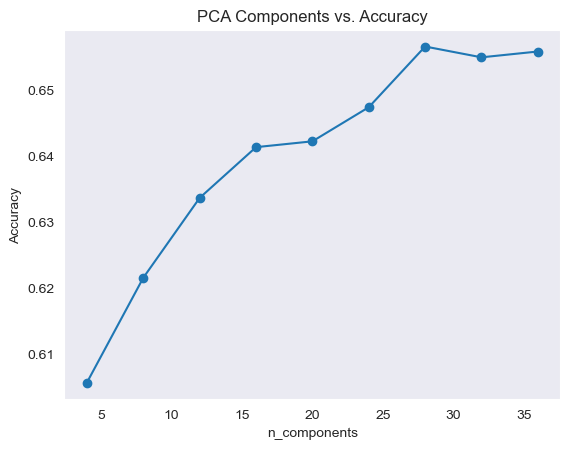

In [116]:
lr = LogisticRegression(learning_rate=0.000001, max_iterations=5000, epsilon=0.0000005, lambda_reg=0.0, pca = True)
lr.run_model()

As we see in this graph, the accuracy is linearly related to the number of principal components.  After reaching around 25-30 components, the increase in accuracy starts plateauing or becomes consistent. This indicates that adding more principal components beyond this threshold doesn't significantly improve the accuracy of the model.

### Logistic regression with PCA & n_components = 28

In [117]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
from dataclasses import dataclass
from typing import List, Optional
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
import scipy
import scipy.linalg

@dataclass
class LogisticRegressionPCA:
    lambda_reg: float
    learning_rate: float
    max_iterations: int
    epsilon: float = 0.0005
    idx_to_remove: List[int] = None
    pca: bool = False

    def __post_init__(self):
        self.train_X, self.test_X, self.train_y, self.test_y = self.read_data()

    
    def read_data(self):
       
        data = pd.read_csv("data_after_EDA.csv")
        col_drop = ['kw_min_max', 'max_positive_polarity', 'title_subjectivity']
        data_logistic = data.copy()
        data_logistic.drop(columns = col_drop, inplace = True)
        
        categorical_cols = ['num_imgs', 'num_videos', 'num_keywords', 'LDA']
        encoded_data = pd.get_dummies(data_logistic, columns=categorical_cols, drop_first=True, dtype=int)
        encoded_data = encoded_data.astype(float)
        X = encoded_data.drop(columns=['shares_c'])
        y = encoded_data['shares_c']
        
        
        train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
        # Scale the features (optional, but often beneficial for logistic regression)
        scaler = StandardScaler()
        train_X = scaler.fit_transform(train_X)
        test_X = scaler.transform(test_X)
        return train_X, test_X, train_y, test_y
       

    def addX0(self, X):
        return np.column_stack([np.ones([X.shape[0], 1]), X])

    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X.dot(self.theta)))

    def cost_function(self, X, y):
        sig = self.sigmoid(X)
        cost = (1 / X.shape[0]) * (y * np.log(sig) + (1 - y) * np.log(1 - sig))
        return -cost.sum()

    def cost_derivative(self, X, y):
        sig = self.sigmoid(X)
        grad = (sig - y).dot(X)
        # Add L2 regularization to the gradient
        grad += (1 / X.shape[0]) * self.lambda_reg * self.theta
        return grad

    #if not pca:
    def gradient_descent(self, X, y):
        errors = []
        prev_error = float('inf')
        for i in tqdm(range(self.max_iterations), colour='red'):
            self.theta -= self.learning_rate * (self.cost_derivative(X, y))
            error = self.cost_function(X, y)
            errors.append(error)
            if abs(prev_error - error) < self.epsilon:
                #print(abs(prev_error - error))
                print("Model stopped learning")
                break
            prev_error = error
        if not self.pca:
            self.plot_cost(errors)

    def run_model(self):
        if self.pca:
            self.run_model_with_PCA()
        else:
            start_time = time.time()
            self.train_X = self.addX0(self.train_X)
            self.test_X = self.addX0(self.test_X)
            self.theta = np.ones(self.train_X.shape[1], dtype=np.float64) * 0

            if self.idx_to_remove:
                print(f"Removing data point numbers: {[idx + 1 for idx in self.idx_to_remove]}")
                self.remove_index(self.idx_to_remove)

            self.gradient_descent(self.train_X, self.train_y)

            print('The model params are {}'.format(self.theta))

            # performance stats for training set
            self.display_stats(self.train_X, self.train_y, set_type="Training Set")

            # performance stats for test set
            self.display_stats(self.test_X, self.test_y, set_type="Test Set")

            end_time = time.time()  # Record the end time
            execution_time = end_time - start_time
            print("\n")
            print("**Execution time: {:.4f} seconds**\n".format(execution_time))

    def display_stats(self, X, y, set_type=""):
        predictions = np.round(self.sigmoid(X))
        accuracy = np.mean(predictions == y)
        precision = np.sum(predictions * y) / np.sum(predictions)
        recall = np.sum(predictions * y) / np.sum(y)
        f1_score = 2 * (precision * recall) / (precision + recall)

        print(f"\n{set_type} Statistics:")
        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1-Score: {f1_score}")

        
    def plot_cost(self, cost_sequence):
        s = np.array(cost_sequence)
        t = np.arange(s.size)

        fig, ax = plt.subplots()
        ax.plot(t, s)

        ax.set(xlabel='Iterations', ylabel='Cost', title='Cost Trend')
        ax.grid()
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, shadow=True)
        plt.show()
        
    
    def custom_pca_fit_transform(self, X, n_components):
        # Center the data
        mean = np.mean(X, axis=0)
        centered_data = X - mean

        # Calculate covariance matrix
        covariance_matrix = np.cov(centered_data, rowvar=False)

        # Calculate eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        # Sort eigenvalues and eigenvectors in descending order
        idx = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[:, idx]

        # Select the top n_components eigenvectors
        components = eigenvectors[:, :n_components]

        # Transform the data
        transformed_data = np.dot(centered_data, components)
        return transformed_data, components

    def custom_pca_transform(self, X, components):
        # Center the data
        mean = np.mean(X, axis=0)
        centered_data = X - mean

        # Transform the data using the calculated components
        transformed_data = np.dot(centered_data, components)
        return transformed_data



    def run_model_with_PCA(self):
        start_time = time.time()
        accuracies = []
        n_components = 28  # Range of n_components

        train_X_pca, pca_components = self.custom_pca_fit_transform(self.train_X, n_components)
        test_X_pca = self.custom_pca_transform(self.test_X, pca_components)

        self.theta = np.ones(pca_components.shape[1], dtype=np.float64) * 0

        if self.idx_to_remove:
            self.remove_index(self.idx_to_remove)

        self.gradient_descent(train_X_pca, self.train_y)

        predictions = np.round(self.sigmoid(test_X_pca))
        accuracy = np.mean(predictions == self.test_y)
        precision = np.sum(predictions * self.test_y) / np.sum(predictions)
        recall = np.sum(predictions * self.test_y) / np.sum(self.test_y)
        f1_score = 2 * (precision * recall) / (precision + recall)
        
        
        self.display_stats(train_X_pca, self.train_y, set_type="Training Set")

            # performance stats for test set
        self.display_stats(test_X_pca, self.test_y, set_type="Test Set")
        
        end_time = time.time()  # Record the end time
        execution_time = end_time - start_time
        print("\n")
        
        print("**Execution time: {:.4f} seconds**\n".format(execution_time))
        
#         print(f"Statistics:")
#         print(f"Accuracy: {accuracy}")
#         print(f"Precision: {precision}")
#         print(f"Recall: {recall}")
#         print(f"F1-Score: {f1_score}")



        

In [118]:
lr = LogisticRegressionPCA(learning_rate=0.000001, max_iterations=5000, epsilon=0.0000005, lambda_reg=0.0, pca = True)
lr.run_model()

 11%|████████▉                                                                     | 572/5000 [00:01<00:08, 541.16it/s]

Model stopped learning

Training Set Statistics:
Accuracy: 0.6518887557545563
Precision: 0.687611635621332
Recall: 0.6369814442737265
F1-Score: 0.6613289158844101

Test Set Statistics:
Accuracy: 0.6565771219573717
Precision: 0.6902119071644803
Recall: 0.6466556369652564
F1-Score: 0.6677242220866383


**Execution time: 1.0848 seconds**



When Principal Component Analysis (PCA) is applied before logistic regression, it typically involves reducing the dimensionality of the data by projecting it onto a lower-dimensional space. Let's interpret the performance metrics of the logistic regression model after PCA:

**Accuracy:**
Training Set: 65.19%
Test Set: 65.66%
Interpretation: The accuracy of the model post-PCA is consistent with the previous models, indicating that the reduction in dimensionality didn't significantly impact the overall correctness of the model's predictions.

**Precision:**
Training Set: 68.76%
Test Set: 69.02%
Interpretation: Precision has improved slightly compared to the non-PCA models. It indicates that among the instances predicted as positive, a higher percentage are actually correct.

**Recall:**
Training Set: 63.70%
Test Set: 64.67%
Interpretation: Recall has slightly decreased compared to the non-PCA models. It suggests that the model correctly identifies a slightly lower percentage of actual positive instances.

**F1-Score:**
Training Set: 66.13%
Test Set: 66.77%
Interpretation: The F1-Score, which balances precision and recall, remains moderately high. It shows a reasonable tradeoff between the ability to correctly identify positive instances and overall accuracy.

In relation to bias and variance:

**Bias:** The bias seems to be similar to the non-PCA models, as accuracy remains at a comparable level.
**Variance:** The small difference between training and test set performances suggests the model's generalization to new data isn't significantly affected by PCA.

In summary, PCA applied before logistic regression has led to a slight tradeoff between precision and recall while maintaining a similar overall accuracy. The model seems to have a similar bias-variance tradeoff as seen in the non-PCA models, indicating that the reduction in dimensionality hasn't significantly affected the model's ability to generalize to unseen data.

In [119]:
lr = LogisticRegressionPCA(learning_rate=0.000001, max_iterations=5000, epsilon=0.0000005, lambda_reg=0.00005, pca = True)
lr.run_model()

 11%|████████▉                                                                     | 572/5000 [00:01<00:08, 549.96it/s]

Model stopped learning

Training Set Statistics:
Accuracy: 0.6518887557545563
Precision: 0.687611635621332
Recall: 0.6369814442737265
F1-Score: 0.6613289158844101

Test Set Statistics:
Accuracy: 0.6565771219573717
Precision: 0.6902119071644803
Recall: 0.6466556369652564
F1-Score: 0.6677242220866383


**Execution time: 1.0663 seconds**



In summary, applying PCA with 28 components alongside regularization doesn't significantly change the model's performance compared to models with regularization alone. The model maintains a similar bias-variance tradeoff and generalization to unseen data while slightly improving precision and sacrificing a bit of recall.

### 2. Naive Bayes

One fundamental assumption in Naive Bayes is the independence of columns. When features are truly independent, the model can perform well and make accurate predictions. However, in real-world scenarios, absolute independence might not exist among all features. Despite this, Naive Bayes often performs remarkably well even when this assumption is not perfectly met. Therefore, understanding the extent of feature interdependence through tools like correlation heatmaps becomes essential. 

As demonstrated by the correlation heatmap before, there's no evidence of high multi-collinearity as we have already taken care for during the exploratory data analysis. Therefore, we will proceed with constructing the Naive Bayes model using this dataset

In [120]:
data = pd.read_csv("data_after_EDA.csv")

In [121]:
categorical_cols = ['num_imgs', 'num_videos', 'num_keywords', 'LDA']

encoded_data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)


X = encoded_data.drop(columns=['shares_c'])
y = encoded_data['shares_c']

# Split data into continuous and binary features
continous_cols = ['n_tokens_title', 'n_tokens_content',
'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs',
'average_token_length', 'kw_avg_min', 'kw_min_max', 'kw_avg_avg', 
'self_reference_min_shares', 'self_reference_max_shares', 
'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 
'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity', 
'max_positive_polarity', 'avg_negative_polarity', 
'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity']

X_continuous = X[continous_cols].copy()
X_binary = X[[col for col in X.columns if col not in continous_cols]].copy()

# Split into train and test sets
X_cont_train, X_cont_test, X_bin_train, X_bin_test, y_train, y_test = train_test_split(
    X_continuous, X_binary, y, test_size=0.2, random_state=42
)

In [122]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

class CustomNaiveBayes:
    def __init__(self):
        self.class_probabilities = {}
        self.feature_probabilities_cont = {}
        self.feature_probabilities_bin = {}
        self.classes = None
    
    def fit(self, X_continuous, X_binary, y):
        self.classes = np.unique(y)
        
        # Calculate class probabilities
        for cls in self.classes:
            self.class_probabilities[cls] = np.mean(y == cls)
        
        # Calculate feature probabilities for continuous features
        for cls in self.classes:
            X_cls = X_continuous[y == cls]
            self.feature_probabilities_cont[cls] = {
                col: {
                    'mean': np.mean(X_cls[col]),
                    'std': np.std(X_cls[col]) + 1e-9  # Adding a small value to avoid division by zero
                }
                for col in X_continuous.columns
            }
        
        # Calculate feature probabilities for binary features
        for cls in self.classes:
            X_cls = X_binary[y == cls]
            self.feature_probabilities_bin[cls] = {
                col: np.mean(X_cls[col])
                for col in X_binary.columns
            }
    
    def _calculate_continuous_probability(self, x, mean, std):
        exponent = np.exp(-(np.power(x - mean, 2) / (2 * np.power(std, 2))))
        return (1 / (np.sqrt(2 * np.pi) * std)) * exponent
    
    def predict_proba(self, X_continuous, X_binary):
        predictions = []
        for i in range(X_continuous.shape[0]):
            probs = {}
            for cls in self.classes:
                cont_prob = 1.0
                # Calculate probability for continuous features
                for col in X_continuous.columns:
                    cont_prob *= self._calculate_continuous_probability(
                        X_continuous.iloc[i][col],
                        self.feature_probabilities_cont[cls][col]['mean'],
                        self.feature_probabilities_cont[cls][col]['std']
                    )
                # Calculate probability for binary features
                bin_prob = np.prod([self.feature_probabilities_bin[cls][col] for col in X_binary.columns if X_binary.iloc[i][col] == 1])
                probs[cls] = cont_prob * bin_prob * self.class_probabilities[cls]
            predictions.append(probs)
        return np.array(predictions)
    
    def predict(self, X_continuous, X_binary):
       
        probabilities = self.predict_proba(X_continuous, X_binary)
        predicted_classes = []
        for probs in probabilities:
            predicted_classes.append(max(probs, key=probs.get))
        return np.array(predicted_classes)


# Assuming you have your data loaded and preprocessed



In the above code, we have implemented a custom Naive Bayes classifier that works with both continuous and binary features. Here's a breakdown of what each part of the code is doing:

**Initialization:**

The class CustomNaiveBayes initializes with dictionaries to store class probabilities, probabilities of features for continuous and binary data, and the unique classes.

**Training (fit method):**
fit method takes in continuous (X_continuous) and binary (X_binary) feature sets along with target labels (y) to train the Naive Bayes model.
Class probabilities are calculated by computing the frequency of each class in the target variable.

* For continuous features:
For each class, it calculates mean and standard deviation for each feature across instances of that class in X_continuous.
These values are stored in feature_probabilities_cont to be used in predicting probabilities.
* For binary features:
It calculates the probability of occurrence of each feature for each class.
These probabilities are stored in feature_probabilities_bin for future predictions.

**Prediction (predict_proba and predict methods):**
predict_proba method - calculates the probability of each class for each instance in the test set.
For each test instance: It computes the probability using both continuous and binary features.

* For continuous features, it uses a Gaussian probability density function to calculate the likelihood for each class.
* For binary features, it multiplies the probabilities of occurrence of binary features for each class.
predict method uses the probabilities calculated by predict_proba and selects the class with the highest probability as the predicted class for each test instance.

This code creates a custom Naive Bayes classifier that can handle both continuous and binary features, making predictions based on probabilities calculated from the training data.

In [123]:
# Create an instance of CustomNaiveBayes
custom_nb = CustomNaiveBayes()

start_time = time.time() 
# Fit the data
custom_nb.fit(X_cont_train, X_bin_train, y_train)

# Predict probabilities separately
custom_probs = custom_nb.predict_proba(X_cont_train, X_bin_train)

custom_probs_new = custom_nb.predict(X_cont_train, X_bin_train)

# Predict the class based on the final probability
predicted_class_custom = custom_nb.predict(X_cont_test, X_bin_test)


end_time = time.time()  # Record the end time

# Calculate execution time
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.4f} seconds")

print("\n")
# Calculate accuracy
accuracy_custom_train = accuracy_score(y_train, custom_probs_new)
print(f"Accuracy for train set: {accuracy_custom_train}")

# Generate a classification report
print(classification_report(y_train, custom_probs_new))

accuracy_custom = accuracy_score(y_test, predicted_class_custom)
print(f"Accuracy for test set: {accuracy_custom}")

# Generate a classification report
print(classification_report(y_test, predicted_class_custom))


Execution time: 322.3118 seconds


Accuracy for train set: 0.634546257173488
              precision    recall  f1-score   support

         0.0       0.60      0.65      0.62     14732
         1.0       0.67      0.63      0.65     16982

    accuracy                           0.63     31714
   macro avg       0.63      0.64      0.63     31714
weighted avg       0.64      0.63      0.64     31714

Accuracy for test set: 0.6328666918905285
              precision    recall  f1-score   support

         0.0       0.60      0.65      0.63      3758
         1.0       0.66      0.61      0.64      4171

    accuracy                           0.63      7929
   macro avg       0.63      0.63      0.63      7929
weighted avg       0.64      0.63      0.63      7929



**Training Set Evaluation:**

* Accuracy for Train Set (0.6345): The model correctly predicted around 63.45% of the instances in the training set.
* Precision, Recall, F1-Score: For both classes (0 and 1), precision (how many selected instances are relevant), recall (how many relevant instances were selected), and F1-score (the balance between precision and recall) are around 60-67%.
* Interpretation: The model shows moderate performance on the training data. It captures around 63-65% of class 0 and 61-63% of class 1 instances correctly.

**Test Set Evaluation:**

* Accuracy for Test Set (0.6329): The model correctly predicted around 63.29% of the instances in the test set.
* Precision, Recall, F1-Score: Similar to the training set, precision, recall, and F1-score for both classes are around 60-66%.
* Interpretation: The model demonstrates consistent performance on unseen data, showing a similar accuracy rate to the training set.

**Bias-Variance Tradeoff Consideration:**

* Bias: The model's performance on both the training and test sets is relatively similar, indicating that it's not overly simplistic (high bias) or complex to the extent of overfitting (high variance).
* Variance: The consistency of performance metrics between the training and test sets suggests that the model has balanced variance. It's not overly sensitive to the training data (low bias) nor is it overfitting excessively to capture noise in the data (low variance).

In terms of the bias-variance tradeoff, these statistics suggest that the Naive Bayes model strikes a reasonable balance between bias and variance. It's capturing patterns in the data without showing significant signs of overfitting or underfitting. However, there might be scope for improvement in terms of precision and recall for both classes to achieve a higher overall performance.

### Neural Network model building is performed in another file (attached) as colab offered easier to install and computational fast.